In [13015]:
# Import Libraries
from msc_code.scripts.notebook_setup import *

# Define directories
REPORT_RAW_DATA_DIR = os.path.join(RAW_DATA_DIR, 'final_report')
REPORT_PROC_DATA_DIR = os.path.join(PROC_DATA_DIR, 'final_report')
REPORT_DIR = os.path.join(OUTPUT_DIR, 'reports', 'final_report')
REPORT_FIGURES_DIR = os.path.join(REPORT_DIR, 'figures')
SECTIONS_DIR = os.path.join(REPORT_DIR, 'sections')
DATA_DIR = os.path.join(REPORT_DIR, 'data')
TABLES_DIR = os.path.join(REPORT_DIR, 'tables')

directories = [REPORT_RAW_DATA_DIR,
               REPORT_PROC_DATA_DIR,
               REPORT_DIR,
               REPORT_FIGURES_DIR,
               SECTIONS_DIR,
               DATA_DIR,
               TABLES_DIR]

# Check directories exist, if not, create them.
for directory in directories:
    if not os.path.isdir(directory):
        os.makedirs(directory, exist_ok=True)
        with open(path, 'w') as f:
            pass
        print(f"Created: {directory}")
    else:
        print(f"Already exists: {directory}")

Already exists: /Users/jackgedge/Projects/msc_dissertation/iifo_motivation/input/raw_data/final_report
Already exists: /Users/jackgedge/Projects/msc_dissertation/iifo_motivation/input/processed_data/final_report
Already exists: /Users/jackgedge/Projects/msc_dissertation/iifo_motivation/output/reports/final_report
Already exists: /Users/jackgedge/Projects/msc_dissertation/iifo_motivation/output/reports/final_report/figures
Already exists: /Users/jackgedge/Projects/msc_dissertation/iifo_motivation/output/reports/final_report/sections
Already exists: /Users/jackgedge/Projects/msc_dissertation/iifo_motivation/output/reports/final_report/data
Already exists: /Users/jackgedge/Projects/msc_dissertation/iifo_motivation/output/reports/final_report/tables


## Data Gathering

### Database Searches

In [13016]:
# define data dictionary to store search results in
data = {}

# import dataframes into data dictionarY
data["pubmed"] = pd.read_csv("/".join([REPORT_RAW_DATA_DIR, "database_search_pubmed.csv"]))          # PubMed
data["embase"] = pd.read_csv("/".join([REPORT_RAW_DATA_DIR, "database_search_embase.csv"]))          # Embase
data["cochrane"] = pd.read_csv("/".join([REPORT_RAW_DATA_DIR, "database_search_cochrane.csv"]))      # Cochrane
data["wos"] = pd.read_excel("/".join([REPORT_RAW_DATA_DIR, "database_search_wos.xls"]))              # WOS
data["scopus"] = pd.read_csv("/".join([REPORT_RAW_DATA_DIR, "database_search_scopus.csv"]))          # SCOPUS        
data["psycinfo"] = pd.read_csv("/".join([REPORT_RAW_DATA_DIR, "database_search_psycinfo.csv"]))      # PyscINFO

# define desired column headers for later extraction to final dataframe
desired_columns = [
    "Publication Year",
    "First Author",
    "Authors",
    "Publication Title",
    "Title",
    "Abstract",
    "DOI",
    "Database"
]

# PubMed
# rename pubmed dataframe columns to fit desired column headers 
data["pubmed"].rename(columns={     # rename columns
    "Abstract Note": "Abstract",    # rename 'Abstract Note' as 'Abstract'
    "Key": "PMID",                  # rename 'Key' as 'PMID'
    "Author": "Authors"             # rename 'Author' as 'Authors'
}, inplace=True)                    # keep changes in place on original dataframe

# create first author column formatted as Surname, F.
data["pubmed"]["First Author"] = (
    data["pubmed"]["Authors"]
    .fillna("")                     # Replace NaN with an empty string
    .str.split(";")                 # Split multiple authors by ';'
    .str[0]                         # Take the first author
    .str.strip()                    # Remove leading/trailing spaces
    .apply(lambda name: f"{name.split()[0]} {name.split()[1][0]}." if len(name.split()) > 1 else name)
)   # format final First Author string as Surname, F.


# Embase
# Rename embase dataframe columns to fit desired column headers
data["embase"].rename(columns={             # rename columns
    "Medline PMID": "PMID",                 # 'Medline PMID' as 'PMID'
    "Source title": "Publication Title",    # 'Source title' as 'Publication Title'
    "Author Names": "Authors"               # 'Author Names' as 'Authors'
}, inplace=True)    

# create first author column formatted as Surname, F.
data["embase"]["First Author"] = (
    data["embase"]["Authors"]
    .fillna("")  # Replace NaN with an empty string
    .str.split(";")  # Split multiple authors by ';'
    .str[0]  # Take the first author
    .str.strip()  # Remove leading/trailing spaces
    .apply(
        lambda name: f"{name.split()[0]}, {name.split()[1][0]}." 
        if len(name.split()) > 1 else name
    )   # format final First Author string as Surname, F.
    .str.rstrip(",")  # Remove trailing commas if present
)


# Web of Science
# Rename Web of Science columns to fit desired column headers
data["wos"].rename(columns={                # rename columns
    "Pubmed Id": "PMID",                    # 'Pubmed Id' as 'PMID'
    "Article Title": "Title",               # 'Article Title' as 'Title'
    "Source Title": "Publication Title"     # 'Source Title' as 'Publication Title'
}, inplace=True)                            # Save changes in place on original dataframe

# create first author column formatted as Surname, F.
data["wos"]["First Author"] = (
    data["wos"]["Authors"]
    .fillna("")  # Replace NaN with an empty string
    .str.split(";")  # Split multiple authors by ';'
    .str[0]  # Take the first author
    .str.strip()  # Remove leading/trailing spaces
    .apply(
        lambda name: f"{name.split()[0]} {name.split()[1][0]}." 
        if len(name.split()) > 1 else name
    )   # format final First Author string as Surname, F.
    .str.rstrip(",")  # Remove trailing commas if present
)


# rename Scopus columns to fit desired column headers
data["scopus"].rename(columns={
    "Year": "Publication Year",
    "PubMed ID": "PMID",
    "Source title": "Publication Title"
}, inplace=True)

# create first author column formatted as Surname, F.
data["scopus"]["First Author"] = (
    data["scopus"]["Authors"]
    .fillna("")  # Replace NaN with an empty string
    .str.split(";")  # Split multiple authors by ';'
    .str[0]  # Take the first author
    .str.strip()  # Remove leading/trailing spaces
    .apply(
        lambda name: f"{name.split()[0]}, {name.split()[1][0]}." 
        if len(name.split()) > 1 else name
    )
    .str.rstrip(",")  # Remove trailing commas if present
)


# Rename PsycINFO column headers to fit desired column headers.
data['psycinfo'].rename(columns={           # rename columns
    "Abstract Note": "Abstract",            # 'Abstract Note' as 'Abstract'
    "Author": "Authors"                     # 'Author' as 'Authors'
}, inplace=True)                            # save changes in place on original dataframe.

# Create first author column formatted as Surname, F.
data["psycinfo"]["First Author"] = (      
    data["psycinfo"]["Authors"]
    .fillna("")  # Replace NaN with an empty string
    .str.split(";")  # Split multiple authors by ';'
    .str[0]  # Take the first author
    .str.strip()  # Remove leading/trailing spaces
    .apply(
        lambda name: f"{name.split()[0]} {name.split()[1][0]}." 
        if len(name.split()) > 1 else name
    )   # format final First Author string as Surname, F.
    .str.rstrip(",")  # Remove trailing commas if present
)


# Rename cochrane columns to fit desired column headers
data["cochrane"].rename(columns={           # Rename columns
    "Year": "Publication Year",             # 'Year' as 'Publication Year'
    "Source": "Publication Title",          # 'Source' as 'Publication Title'
    "Author(s)": "Authors"                  # 'Author(s) as 'Authors'
}, inplace=True)                            # in place on original dataframe

# create first author column formatted as Surname, F.
data["cochrane"]["First Author"] = (
    data["cochrane"]["Authors"]
    .fillna("")  # Replace NaN with an empty string
    .str.split(";")  # Split multiple authors by ';'
    .str[0]  # Take the first author
    .str.strip()  # Remove leading/trailing spaces
    .apply(
        lambda name: f"{name.split()[0]} {name.split()[1][0]}." 
        if len(name.split()) > 1 else name
    )   # format final First Author string as Surname, F.
    .str.rstrip(",")  # Remove trailing commas if present
)


# Add database column to each dataframe
for key, df in data.items():
    if key == "pubmed":
        df['Database'] = "PubMed"
    elif key == "embase":
        df['Database'] = "Embase"
    elif key == "cochrane":
        df['Database'] = "Cochrane"
    elif key == "wos":
        df['Database'] = "Web of Science"
    elif key == "scopus":
        df['Database'] = "SCOPUS"
    elif key == "psycinfo":
        df['Database'] = "PsycINFO"
    else:
        df['Database'] = "Unknown"


extracted_data = [] # create list in which to store extracted data.
for database, df in data.items():       # iterate through each database and corresponding dataframe in data dictionary
    extracted_df = df[desired_columns]  # select predefined desired columns from selected dataframe and extract to new dataframe.
    extracted_data.append(extracted_df) # append the extracted dataframe to a the list of extracted data.

# Combine/concatinate all extracted DataFrames in extracted_data list into a single DataFrame called final_df (dataframe)
final_df = pd.concat(extracted_data, ignore_index=True)

# Ensure that no rows/papers are lost by countingfinal

# calculate the number of papers before dataframes were
preextraction_paper_count = 0               # define variable pre-extraction paper count and set to 0.
for database, df in data.items():           # iterate through each database and corresponding dataframe in data dictionary
    preextraction_paper_count += len(df)    # add the length of selected dataframe to the pre-extraction count

# Calculate number of papers after concantination of desired columns from database dataframes.
postextraction_paper_count = len(final_df)  # postextraction_paper_count = length of the final dataframe.


# Reformat some journal information to aid removal of duplicates

# fix capitalisation in Publication Title column
final_df['Publication Title'] = final_df['Publication Title'].str.title()

# sort by publication year, then first author
final_df = final_df.sort_values(by=["Publication Year", "First Author"]).reset_index(drop=True)

# titlise first author column
final_df["First Author"] = final_df["First Author"].str.title()

# strip full stops from end of journal titles
final_df["Title"] = (
    final_df["Title"]
        .str.strip(".")
        .str.replace(r"[()\[\]{}]", "", regex=True)
        .str.capitalize()
)

# remove word the from beginning of journal titles
final_df["Publication Title"] = final_df["Publication Title"].str.replace(r"^The\s+", "", regex=True)

# reformat DOI to lower case
final_df["DOI"] = final_df["DOI"].str.lower()

pre_duplicate_removal_count = len(final_df)

# Export complete initial database search results, before duplicate removal
export_path = os.path.join(REPORT_PROC_DATA_DIR, 'database_search_results_initial.csv')
final_df.to_csv(export_path)

# Count initial database counts for PRISMA diagram
initial_database_counts = final_df['Database'].value_counts().reset_index()
initial_database_counts.columns = ['Database', 'Count']

# Database counts
database_counts = pd.DataFrame({
    'Database': list(data.keys()),                  # Database label
    'Count': [len(df) for df in data.values()]      # Count is the length of each dataframe 
})

# reorder by count descending
database_counts = database_counts.sort_values(by='Count', ascending=False)

# Fix capitalisation of Database names
database_counts.loc[0, 'Database'] = 'PubMed'
database_counts.loc[1, 'Database'] = 'Embase'
database_counts.loc[2, 'Database'] = 'Cochrane'
database_counts.loc[3, 'Database'] = 'WoS'
database_counts.loc[4, 'Database'] = 'SCOPUS'
database_counts.loc[5, 'Database'] = 'PsycINFO'

# display
export_path = os.path.join(REPORT_PROC_DATA_DIR, 'database_search_counts_initial.csv')
database_counts.to_csv(export_path, index=False)


# Define comparison_columns to compare when assessing for duplicates.
comparison_columns=["Publication Year", "First Author", "Publication Title", "Title", "DOI"] # define comparison columns to compare duplicates against.

# find duplicates by comparison columns
dupes_by_comparison = final_df[final_df.duplicated(subset=comparison_columns, keep="first")]

# remove them from final_df
final_df = final_df.drop_duplicates(subset=comparison_columns, keep="first")

# find duplicates by DOI (after previous step)
dupes_by_doi = final_df[final_df.duplicated(subset="DOI", keep="first")]

# remove them from final_df
final_df = final_df.drop_duplicates(subset="DOI", keep="first")

# combine both sets of duplicates into a new df
database_search_results_duplicates = pd.concat([dupes_by_comparison, dupes_by_doi], ignore_index=True)

# Count number of results left after duplicates removed
post_duplicate_removal_count = len(final_df)

# Calculate number of duplicates removed
database_duplicates_removed_count = len(database_search_results_duplicates)

print(f"Duplicates removed: {database_duplicates_removed_count}") # Print result

# Create dataframe of number of duplicates removed to export to CSV for use with PRISMA flow chart.
duplicates_removed_df = pd.DataFrame([{
    "Reason": "Duplicate records removed\n",
    "Count": database_duplicates_removed_count
}])

# Export to CSV
database_search_results_duplicates.to_csv("/".join([REPORT_PROC_DATA_DIR, "database_search_results_duplicates.csv"]), index=False)
final_df.to_csv('/'.join([REPORT_PROC_DATA_DIR, "database_search_results_no_duplicates.csv"]))

final_database_counts = final_df['Database'].value_counts().reset_index(name='Count')

# Add three blank columns titled "Exclude", "Reason Num" and "Reason" to final_df for export as csv
final_df["Exclude"] = None      # Add blank "Exclude" column
final_df["Reason ID"] = None    # Add blank "Reason ID" column
final_df["Reason"] = None       # Add blank "Reason" column

# Export to csv for title abstract screening
final_df.to_csv("/".join([REPORT_PROC_DATA_DIR, "database_search_title_abstract_screen_start.csv"]), index=False)

Duplicates removed: 313


In [13017]:
# create dictionary to store search query and results in for ease of reference later.
# results_dict = {}

# Query One
# query_one =  '("foreign obj*" OR "foreign bod*")' 
# Run search
# results_one = search_google_scholar(query_one, SERP_API_KEY)
# Add results to dictionary
# results_dict = append_google_scholar_results_to_dictionary(query_one, results_one, results_dict)

# Query Two
# query_two = """
#            ("foreign obj*" OR "foreign bod*")
#            AND
#            ("intent*" OR "deliberate*" OR "purpose*" OR "self-injur*" OR "selfharm*" OR "self-harm*")
#            """
# Run search
# results_two = search_google_scholar(query_two, SERP_API_KEY)
# Add results to dictionary
# results_dict = append_google_scholar_results_to_dictionary(query_two, results_two, results_dict)

# Query Three
# query_three = """
#             ("foreign obj*" OR "foreign bod*")
#             AND
#             ("intent*" OR "deliberate*" OR "purpose*" OR "self-injur*" OR "selfharm*" OR "self-harm*")
#             AND
#             ("ingest*" OR "swallow*")
#             """
# Run search
# results_three = search_google_scholar(query_three, SERP_API_KEY)
# Add results to dictionary
# results_dict = append_google_scholar_results_to_dictionary(query_three, results_three, results_dict)

# Query Four
# Define google scholar query
# query_four = """
#            ("foreign obj*" OR "foreign bod*")
#            AND
#            ("intent*" OR "deliberate*" OR "purpose*" OR "self-injur*" OR "selfharm*" OR "self-harm*")
#            AND
#            ("ingest*" OR "swallow*"))
#            AND
#            ("surg*" OR "endoscop*" OR "EGD" OR "OGD" OR "Esophagogastroduodenoscopy" OR "Oesophagogastroduodenoscopy" OR "manag*")"
#            """
# Run search
# results_four = search_google_scholar(query_four, SERP_API_KEY)
# Add results to dictionary
# results_dict = append_google_scholar_results_to_dictionary(query_four, results_four, results_dict)

In [13018]:
# Show number of results for each query and store in dataframe
# results_summary = create_search_query_summary(results_dict)

# export queries and associated results count to review with supervisor.
# export_search_result_summary_to_csv(results_summary, os.path.join(*[REPORT_RAW_DATA_DIR]))

# Export each search result dataframe to CSV
# export_search_results_to_csvs(results_dict, RAW_PROC_DATA_DIR)

In [13019]:
# import google_df from previously exported csv
google_df = pd.read_csv("/".join([REPORT_RAW_DATA_DIR, "google_scholar_results_2.csv"]))

google_df['First Author'] = google_df['First Author'].str.title() # clean first author names
google_df['Publication Title'] = google_df['Publication Title'].str.title() 
google_df['Title'] = google_df['Title'].str.title()
google_df['URL'] = google_df['URL'].str.lower()

google_start_count = len(google_df)

In [13020]:
# Remove duplicates
start_count = len(google_df)
google_df = google_df.drop_duplicates(subset=google_df.columns, keep='first')
end_count = len(google_df)

google_duplicates_removed_count = end_count - start_count

print(f"{google_duplicates_removed_count} duplicates were removed at this stage.")

# Export for title abstract screen
google_df.to_csv(os.path.join(REPORT_PROC_DATA_DIR, "google_scholar_title_abstract_screen_start.csv"))

0 duplicates were removed at this stage.


In [13021]:
# Import google scholar and database search data
import_path = os.path.join(REPORT_RAW_DATA_DIR, 'google_scholar_title_abstract_screen_end.csv')
google_df = pd.read_csv(import_path)

import_path = os.path.join(REPORT_RAW_DATA_DIR, 'database_search_title_abstract_screen_end.csv')
database_df = pd.read_csv(import_path)

google_duplicate_count = len(google_df[google_df['Duplicate'] == True])
google_duplicate_count

3

In [13022]:
# Merge all Google Scholar and Database search results
all_df = pd.merge(
    database_df, google_df,
    how='outer',
    on=["Publication Year", "First Author", "Authors", "Publication Title",
        "Title", "Abstract", "Database", "Exclude", "Reason ID", "DOI"])

# Specify Desired Column Order
desired_column_order = ["Publication Year", "First Author", "Authors", 
                        "Publication Title", "Summary", "Database", "DOI", 
                        "URL", "Title", "Abstract", "Abstract2", "Exclude", 
                        "Reason ID"]

# Apply to dataframe
all_df = all_df[desired_column_order]

# Fix capitalisation on of fields
desired_cols = ['Title', 'First Author', 'Authors', 'Abstract']
for col in desired_cols:
    all_df[col].str.title()

# Sort by Publication Year ascending.
all_df = all_df.sort_values(by="Publication Year", ascending=True).reset_index(drop=True)

# Count number of records screened for prisma diagram
records_screened_count = len(all_df) - 3

In [13023]:
all_df['Database'].value_counts()

Database
PubMed            258
Google Scholar    135
Web of Science     65
Cochrane           14
SCOPUS             12
Embase              9
PsycINFO            2
Name: count, dtype: int64

In [13024]:
# Generate Unique Study_ID
all_df.index.name = 'Study_ID'

# Export all JGE title and abstract reviewed articles
export_path = os.path.join(REPORT_PROC_DATA_DIR, 'ta_review_start_jge.csv')
all_df.to_csv(export_path)

# Create clean dataframe to export for other author review
clean_df = all_df.copy()

# Remove reasons for exlusion and previously marked exclusions for clean export and second author review.
clean_df['Exclude'] = None
clean_df['Reason ID'] = None

# Export to CSV
export_path = os.path.join(REPORT_PROC_DATA_DIR, 'ta_review_clean.csv')
clean_df.to_csv(export_path)

# Create sample of 10% of papers for second author (MS) review
clean_sample_df = create_results_sample(clean_df, 0.1, 42) # '42' argument specificies random number to great sample from

ta_ms_sample_size = len(clean_sample_df)

# export clean data to raw data directory as ms_title_abstract review start.csv
# clean_sample_df.to_csv("/".join([PROC_DATA_DIR, "title_abstract_review", "ta_review_ms_start.csv"]))

Given sample size: 495
Calculating desired sample size... 10% of 495 = 50
Creating Sample Dataframe


In [13025]:
# Import second author (MS) Title Abstract Review Data
import_path = os.path.join(REPORT_RAW_DATA_DIR, 'ta_review_end_ms.csv')
ms_reviewed_df = pd.read_csv(import_path)

# Import title and abstract review results from JGE.
import_path = os.path.join(REPORT_RAW_DATA_DIR, 'ta_review_end_jge.csv')
jge_reviewed_df = pd.read_csv(import_path)

# Rename columns before merge with second author (MS) review data.
jge_reviewed_df = jge_reviewed_df.rename(columns={
    'Exclude': 'Exclude_JGE',
    'Reason ID': 'Reason ID_JGE'
})

# Drop columns in ms_reviewed_df that are redundant in jge_reviewed_df (except for columns to add)
ms_reviewed_df = ms_reviewed_df[['Study_ID', 'Exclude', 'Reason ID']]

# Rename columns in the reviewed dataset
ms_reviewed_df.rename(columns={
    'Exclude': 'Exclude_MS', 
    'Reason ID': 'Reason ID_MS'
    }, 
    inplace=True
)

# Merge the datasets rightwards, so only papers review by MS and JGE are together.
jge_ms_reviewed_df = pd.merge(jge_reviewed_df, ms_reviewed_df, on='Study_ID', how='right')

In [13026]:
# Calculate agreement
jge_ms_agree = jge_ms_reviewed_df[jge_ms_reviewed_df['Exclude_JGE'] == jge_ms_reviewed_df['Exclude_MS']]
print(f"JGE and MS agree on {len(jge_ms_agree)}/{len(jge_ms_reviewed_df)} results reviewed by MS.")

# Calculate disagreement
jge_ms_disagree = jge_ms_reviewed_df[jge_ms_reviewed_df['Exclude_JGE'] != jge_ms_reviewed_df['Exclude_MS']]
print(f"JGE and MS disagree on {len(jge_ms_disagree)}/{len(jge_ms_reviewed_df)} results reviewed by MS.")

# Export to CSV
jge_ms_agree.to_csv("/".join([REPORT_PROC_DATA_DIR, 'ta_review_agree_jge_ms.csv']), index=False)
jge_ms_disagree.to_csv("/".join([REPORT_PROC_DATA_DIR, 'ta_review_disagree_jge_ms.csv']), index=False)

# Import Cohen's Kappa from scikit-learn
from sklearn.metrics import cohen_kappa_score

y1 = jge_ms_reviewed_df['Exclude_JGE']
y2 = jge_ms_reviewed_df['Exclude_MS']

kappa_ta_jge_ms = cohen_kappa_score(y1, y2)

kappa_ta_jge_ms = kappa_ta_jge_ms.round(2)

kappa_interpretation = {
    (0.81, 1.00): "Almost perfect agreement",
    (0.61, 0.80): "Substantial agreement",
    (0.41, 0.60): "Moderate agreement",
    (0.21, 0.40): "Fair agreement",
    (0.00, 0.20): "Slight agreement",
    (-1.00, -0.01): "Less than chance agreement"
}

# Function to interpret kappa value
def interpret_kappa(kappa_value, interpretation_dict):
    for (low, high), label in interpretation_dict.items():
        if low <= kappa_value <= high:
            return label
    return "undefined agreement"

# Get label
agreement_label = interpret_kappa(kappa_ta_jge_ms, kappa_interpretation)

JGE and MS agree on 34/50 results reviewed by MS.
JGE and MS disagree on 16/50 results reviewed by MS.


In [13027]:
# Export disagrements for third author review
import_path = os.path.join(REPORT_RAW_DATA_DIR, 'ta_review_end_gc.csv')
gc_reviewed_df = pd.read_csv(import_path)

gc_reviewed_df = gc_reviewed_df[["Study_ID", "Exclude_GC", "Reason ID_GC", "Review_GC", "Comments_GC"]]

In [13028]:
# Merge all JGE reviewed articles and all MS review articles
reviewed_df = pd.merge(
    jge_reviewed_df,
    ms_reviewed_df,
    on='Study_ID',
    how='left'
)

# Merge GC reviewed articles with these
reviewed_df = pd.merge(
    reviewed_df,
    gc_reviewed_df,
    on='Study_ID',
    how='left'
)

In [13029]:
# Merge the datasets rightwards, so only papers review by GC and JGE are together.
jge_gc_reviewed_df = pd.merge(jge_reviewed_df, gc_reviewed_df, on='Study_ID', how='right')

# Calculate agreement
jge_gc_agree = jge_gc_reviewed_df[jge_gc_reviewed_df['Exclude_JGE'] == jge_gc_reviewed_df['Exclude_GC']]
print(f"JGE and GC agree on {len(jge_gc_agree)}/{len(jge_gc_reviewed_df)} results reviewed by GC.")

# Calculate disagreement
jge_gc_disagree = jge_gc_reviewed_df[jge_gc_reviewed_df['Exclude_JGE'] != jge_gc_reviewed_df['Exclude_GC']]
print(f"JGE and GC disagree on {len(jge_gc_disagree)}/{len(jge_gc_reviewed_df)} results reviewed by GC.")

# Export to CSV
jge_gc_agree.to_csv("/".join([REPORT_PROC_DATA_DIR, 'ta_review_agree_jge_gc.csv']), index=False)
jge_gc_disagree.to_csv("/".join([REPORT_PROC_DATA_DIR, 'ta_review_disagree_jge_gc.csv']), index=False)

# Calculate Cohen's Kappa between JGE and GC
y1 = jge_gc_reviewed_df['Exclude_JGE']
y2 = jge_gc_reviewed_df['Exclude_GC']

kappa_ta_jge_gc = cohen_kappa_score(y1, y2)
kappa_ta_jge_gc

JGE and GC agree on 10/16 results reviewed by GC.
JGE and GC disagree on 6/16 results reviewed by GC.


np.float64(0.18644067796610164)

In [13030]:
# Merge the datasets rightwards, so only papers review by MS and JGE are together.
ms_gc_reviewed_df = pd.merge(ms_reviewed_df, gc_reviewed_df, on='Study_ID', how="right")

# Calculate agreement
ms_gc_agree = ms_gc_reviewed_df[ms_gc_reviewed_df['Exclude_MS'] == ms_gc_reviewed_df['Exclude_GC']]
print(f"MS and GC agree on {len(ms_gc_agree)}/{len(ms_gc_reviewed_df)} results reviewed by GC.")

# Calculate disagreement
ms_gc_disagree = ms_gc_reviewed_df[ms_gc_reviewed_df['Exclude_MS'] != ms_gc_reviewed_df['Exclude_GC']]
print(f"MS and GC disagree on {len(ms_gc_disagree)}/{len(ms_gc_reviewed_df)} results reviewed by GC.")

# Export to CSV
ms_gc_agree.to_csv("/".join([REPORT_PROC_DATA_DIR, 'ta_review_agree_ms_gc.csv']), index=False)
ms_gc_disagree.to_csv("/".join([REPORT_PROC_DATA_DIR, 'ta_review_disagree_ms_gc.csv']), index=False)

# Calculate Cohen's Kappa between MS and GC
y1 = ms_gc_reviewed_df['Exclude_MS']
y2 = ms_gc_reviewed_df['Exclude_GC']

kappa_ta_ms_gc = cohen_kappa_score(y1, y2)

MS and GC agree on 6/16 results reviewed by GC.
MS and GC disagree on 10/16 results reviewed by GC.


In [13031]:
# Create Exclude_FINAL column in reviewed dataframe to store final decision
reviewed_df['Exclude_FINAL'] = None

# Ensure 'Exclude_FINAL' exists in the DataFrame
reviewed_df['Exclude_FINAL'] = np.nan

reviewed_df['Exclude_FINAL'] = reviewed_df.apply(
    lambda row: row['Exclude_JGE']
    if pd.isna(row['Exclude_MS'])  # If MS is NaN, take JGE's decision
    else (row['Exclude_JGE']
          if row['Exclude_JGE'] == row['Exclude_MS']  # If JGE and MS agree
          else row['Exclude_GC']),  # If JGE and MS disagree, take GC's decision
    axis=1
)

reviewed_df = reviewed_df.rename(columns={
    "Reason ID_MS": "Reason_ID_MS",
    "Reason ID_JGE": "Reason_ID_JGE",
    "Reason ID_GC": "Reason_ID_GC"
})

def resolve_reason_id(row):
    if not row['Exclude_FINAL']:
        return None  # No reason needed if not excluded

    # CASE 1: MS is missing, so JGE's exclusion decision was used
    if pd.isna(row['Exclude_MS']):
        return row['Reason_ID_JGE']
    
    # CASE 2: JGE and MS agree, so their shared exclusion decision was used
    if row['Exclude_JGE'] == row['Exclude_MS']:
        return row['Reason_ID_JGE']
    
    # CASE 3: JGE and MS disagree, so GC’s exclusion decision was used
    return row['Reason_ID_GC']

# Apply it
reviewed_df['Reason_ID_FINAL'] = reviewed_df.apply(resolve_reason_id, axis=1)

# Export to CSV
export_path = os.path.join(REPORT_PROC_DATA_DIR, 'ta_review_final.csv')
reviewed_df.to_csv(export_path, index=False)

In [13032]:
# Create dataframe containing only reviewer decisions, not paper information, just paper ID.
reviewer_decisions_df = reviewed_df[['Study_ID', 'Exclude_JGE', 'Reason_ID_JGE', 'Exclude_MS', 'Reason_ID_MS', 'Exclude_GC', 'Reason_ID_GC', 'Exclude_FINAL']]

# make index equal to paper id
reviewer_decisions_df.index = reviewer_decisions_df['Study_ID']

# Export decisions to CSV
export_path = os.path.join(REPORT_PROC_DATA_DIR, 'ta_review_decisions_final.csv')
reviewer_decisions_df.to_csv(export_path, index=False)

In [13033]:
# Create dataframes of included and excluded results
title_abstract_include_final_df = reviewed_df[reviewed_df['Exclude_FINAL'] == False] # Included
title_abstract_exclude_final_df = reviewed_df[reviewed_df['Exclude_FINAL'] == True] # Excluded

# Calculate number of inclusions and exclusions
title_abstract_inclusion_count = len(title_abstract_include_final_df) # Inclusions
title_abstract_exclusion_count = len(title_abstract_exclude_final_df) # Exclusions
print(f"{title_abstract_exclusion_count} results were excluded during title and abstract screening.")
print(f"{title_abstract_inclusion_count} results were included during title and abstract screening.")

# Export results to CSV
export_path = os.path.join(PROC_DATA_DIR, 'title_abstract_review', 'ta_review_include_final.csv')
title_abstract_include_final_df.to_csv(export_path, index=False)
export_path = os.path.join(PROC_DATA_DIR, 'title_abstract_review', 'ta_review_exclude_final.csv')
title_abstract_exclude_final_df.to_csv(export_path, index=False)

# Export to RIS format for import into Zotero reference manager for full text review
output_file = os.path.join(REPORT_PROC_DATA_DIR, 'ta_results.ris')

# Export dataframe to RIS
dataframe_to_ris(title_abstract_include_final_df, output_file)

# Create copy of reviewed_df 
ta_reviewed_df = reviewed_df.copy()

ta_reviewed_df['Exclude_FINAL'].value_counts()

176 results were excluded during title and abstract screening.
316 results were included during title and abstract screening.


Exclude_FINAL
False    316
True     176
Name: count, dtype: int64

In [13034]:
# Create title abstract exclusion count for PRISMA diagram
ta_exclusion_count = len(title_abstract_exclude_final_df)

# Count exclusion reasoning
ta_exclusion_reasoning = ta_reviewed_df.groupby('Reason_ID_FINAL').size().sort_values(ascending=False).reset_index()
ta_exclusion_reasoning.columns = ['Reason ID', 'Count']

ta_exclusion_reasoning['Reason_Short'] = ta_exclusion_reasoning['Reason ID'].map(exclusion_criteria_short)
ta_exclusion_reasoning['Reason_Long'] = ta_exclusion_reasoning['Reason ID'].map(exclusion_criteria)
ta_exclusion_reasoning.loc[ta_exclusion_reasoning['Reason ID'] == 1, "Reason_Long"] = "Not available in English."
ta_exclusion_reasoning

Reason ID  Count                                       Reason_Short  \
0        2.0     75            No focus on intentional self-ingestion.   
1        4.0     30                                 Non-Human studies.   
2        5.0     27  Reviews, commenteries, etc. without original e...   
3        3.0     18                   Sole accidental ingestion focus.   
4        7.0     16           Ingestion or co-ingestion of substances.   
5        1.0      9                Full text not available in English.   
6        8.0      1                      Ingested in controlled study.   

                                         Reason_Long  
0  Studies not focusing on intentional self-inges...  
1                         Non-Human/ animal studies.  
2  Reviews, editorials, commentaries, and opinion...  
3  Studies focussing solely on accidental ingestion.  
4  Studies focusing on ingestion or co-ingestion ...  
5                          Not available in English.  
6  Ingestions undertaken in controlled environmen...

In [13035]:
# Full text review
# Create copy of records that were included from title abstract screening
title_abstract_included = title_abstract_include_final_df.copy()

In [13036]:
# Take 'id', 'Publication Year', 'Authors', 'Title', 'Publication Title', 'Database' colums to create a new dataframe.
full_text_review_start_df = title_abstract_included[['Study_ID', 'Publication Year', 'Authors', 'Title', 'Publication Title', 'Database']]

# Add empty columns for use in review process
full_text_review_start_df['Exclude'] = None # Exclude (True/False)
full_text_review_start_df['Reason ID'] = None # Reason ID (Corresponds to Exclusion Criteria)
full_text_review_start_df['Paediatric'] = None # Paediatric Study (True/False)
full_text_review_start_df['Intention Reported'] = None # Intention Reported (True/False)
full_text_review_start_df['Deliberate Intention'] = None # Deliberate Intention (True/False)
full_text_review_start_df['Unclear'] = None # Unclear (True/False) for review with Supervisor
full_text_review_start_df['Accessed'] = None # Date resource accessed (YYYY-MM-DD)
full_text_review_start_df['Comments'] = None # Reviewed Comments

# Save the dataframe to a CSV file for full text screening.
full_text_review_start_df.to_csv("/".join([REPORT_PROC_DATA_DIR, 'full_text_screen_start.csv']), index=False)

# Calculate start count for PRISMA diagram
ft_review_start_count = len(full_text_review_start_df)

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_4667/3188093980.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_text_review_start_df['Exclude'] = None # Exclude (True/False)
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_4667/3188093980.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_text_review_start_df['Reason ID'] = None # Reason ID (Corresponds to Exclusion Criteria)
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_4667/3188093980.py:7: SettingWithCopyW

In [13037]:
# Reimport first author (JGE) screened results as pandas dataframe.
import_path = os.path.join(REPORT_RAW_DATA_DIR, "full_text_screen_end_jge.csv")
jge_screened_df = pd.read_csv(import_path)

# Create dataframe of results not excluded in JGE full text screening.
jge_included = jge_screened_df[jge_screened_df['Exclude'] == False]

# Count number of results not excluded (included)
jge_include_count = len(jge_included)
print(f"Results screened and not excluded: {jge_include_count}")

# Create dataframe of results excluded in JGE full text screening. 
jge_excluded = jge_screened_df[jge_screened_df['Exclude'] == True]

# Count number of exclusions
jge_excluded_count = len(jge_excluded)

# Count number of unclear results for discussion with Supervisor
jge_unclear = jge_screened_df[jge_screened_df['Unclear'] == True]
jge_unclear_count = len(jge_unclear)
print(f"Unclear: {jge_unclear_count}")

# Create dataframe documenting exclusion reasoning
jge_excluded_reasoning = jge_excluded['Reason ID'].value_counts().rename('Count').reset_index()

# Map exclusion criteria category names to exclusion criteria Reason ID numerical values.
jge_excluded_reasoning['Reason'] = jge_excluded_reasoning['Reason ID'].map(exclusion_criteria)

# Print number of results excluded.
print(f"JGE excluded {jge_excluded_count} results during full text screening.")

# Create dataframe for items excluded without reason:
jge_exclude_no_reason = jge_excluded[(jge_excluded['Exclude'] == True ) & (jge_excluded['Reason ID'] == "NaN")]
jge_exclude_no_reason_count = len(jge_exclude_no_reason)
print(f"{jge_exclude_no_reason_count} records were excluded without a recorded reason.")
print(jge_exclude_no_reason if jge_exclude_no_reason_count > 0 else "All exclusions have reasons recorded.")


Results screened and not excluded: 40
Unclear: 6
JGE excluded 276 results during full text screening.
0 records were excluded without a recorded reason.
All exclusions have reasons recorded.


In [13038]:
# Export results where JGE unclear on whether to include or exclude
jge_unclear.to_csv("/".join([REPORT_PROC_DATA_DIR, "full_text_screen_jge_unclear.csv"]))

# Export papers not excluded to CSV
jge_included.to_csv("/".join([REPORT_PROC_DATA_DIR, "full_text_screen_jge_included.csv"]), index=False)

jge_no_recorded_intention = jge_screened_df[jge_screened_df['Intention Reported'] == False]
len(jge_no_recorded_intention)

# Create sample of 10% of papers
ms_review_start_df = create_results_sample(full_text_review_start_df, 0.1, 42) # '42' argument specificies random number to great sample from

ms_review_start_df = ms_review_start_df.sort_values(by=["Publication Year", "Title"])

# ms_review_start_df.to_csv("/".join([RAW_DATA_DIR, "full_text_screen", "full_text_screen_start_ms.csv"]), index=False)

Given sample size: 316
Calculating desired sample size... 10% of 316 = 32
Creating Sample Dataframe


In [13039]:
# Reimport MS reviewed papers
ms_reviewed = pd.read_excel("/".join([REPORT_RAW_DATA_DIR, "full_text_screen_end_ms.xlsx"]))
jge_reviewed = jge_screened_df

# Set 1 values in Excel Exclude boolean True/False column to True, else False.
ms_reviewed["Exclude"] = ms_reviewed["Exclude"].eq(1) 
ms_reviewed["Unclear"] = ms_reviewed["Unclear"].eq(1)

# Rename columnes
ms_reviewed = ms_reviewed.rename(columns={
    "ms": "Study_ID",
    "Exclude": "Exclude_MS",
    "Reason ID": "Reason_ID_MS",
    "Unclear": "Unclear_MS",
    "Comments": "Comments_MS"
})

# Select columns desired
ms_reviewed = ms_reviewed[["Study_ID", "Exclude_MS", "Reason_ID_MS", "Unclear_MS", "Comments_MS"]]

jge_reviewed = jge_reviewed.rename(columns={
    "id": "Study_ID", 
    "Exclude": "Exclude_JGE",
    "Reason ID": "Reason_ID_JGE",
    "Unclear": "Unclear_JGE",
    "Comments": "Comments_JGE"
})

jge_reviewed = jge_reviewed[["Study_ID", "Exclude_JGE", "Reason_ID_JGE", "Unclear_JGE", "Comments_JGE"]]

jge_ms_reviewed = pd.merge(
    jge_reviewed,
    ms_reviewed,
    on="Study_ID",
    how="right",
).set_index("Study_ID")

jge_ms_reviewed[jge_ms_reviewed['Exclude_JGE'].isna()]

# Calculate author agreement

# Import Cohen's Kappa from scikit-learn
from sklearn.metrics import cohen_kappa_score

y1 = jge_ms_reviewed["Exclude_JGE"]
y2 = jge_ms_reviewed["Exclude_MS"]

kappa_ft_jge_ms = cohen_kappa_score(y1, y2)

kappa_ft_jge_ms = kappa_ft_jge_ms.round(2)

# Get label
agreement_label = interpret_kappa(kappa_ta_jge_ms, kappa_interpretation)

kappa_ft_jge_ms

np.float64(0.21)

In [13040]:
# Create table of disagreements
jge_ms_disagree = jge_ms_reviewed[jge_ms_reviewed["Exclude_JGE"] != jge_ms_reviewed["Exclude_MS"]]

jge_ms_disagree["Exclude_GC"] = np.nan
jge_ms_disagree["Reason_ID_GC"] = np.nan
jge_ms_disagree["Comments_GC"] = np.nan

# Export to CSV for third author review
jge_ms_disagree.to_csv("/".join([REPORT_PROC_DATA_DIR, "full_text_screen_jge_ms_disagree.csv"]))

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_4667/1571212775.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jge_ms_disagree["Exclude_GC"] = np.nan
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_4667/1571212775.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jge_ms_disagree["Reason_ID_GC"] = np.nan
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_4667/1571212775.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [13041]:
# Import GC reviewed disagreements
gc_reviewed = pd.read_csv("/".join([REPORT_RAW_DATA_DIR, "full_text_screen_gc_reviewed.csv"]))
gc_reviewed = gc_reviewed[["Study_ID", "Exclude_GC", "Reason_ID_GC", "Comments_GC"]]

In [13042]:
# Create final review dataframe showing all author decisions, comments and reasoning.

# Merge JGE and MS reviews
all_reviewed = pd.merge(
    jge_reviewed,
    ms_reviewed,
    how='left',
    on='Study_ID'
)

# Merge GC review information with JGE and MS reviews
all_reviewed = pd.merge(
    all_reviewed,
    gc_reviewed,
    how='left',
    on='Study_ID'
)

# Calculate Final Exclusion status
all_reviewed['Exclude_FINAL'] = all_reviewed.apply(
    lambda row: row['Exclude_JGE']
    if pd.isna(row['Exclude_MS'])  # If MS is NaN, take JGE's decision
    else (row['Exclude_JGE']
          if row['Exclude_JGE'] == row['Exclude_MS']  # If JGE and MS agree
          else row['Exclude_GC']),  # If JGE and MS disagree, take GC's decision
    axis=1
)

def resolve_reason(row):
    if not row['Exclude_FINAL']:
        return None  # Only give a reason if excluded
    
    # Case 1: MS is missing → JGE's decision was used
    if pd.isna(row['Exclude_MS']):
        return row['Reason_ID_JGE']
    
    # Case 2: JGE and MS agree → JGE's decision was used
    if row['Exclude_JGE'] == row['Exclude_MS']:
        return row['Reason_ID_JGE']
    
    # Case 3: Disagreement → GC's decision was used
    return row['Reason_ID_GC']

all_reviewed['Reason_ID_FINAL'] = all_reviewed.apply(resolve_reason, axis=1)

In [13043]:
# Set Index of all_reviewed
all_reviewed.index = all_reviewed['Study_ID']

In [13044]:
all_reviewed['Exclude_FINAL'].value_counts()

Exclude_FINAL
True     276
False     40
Name: count, dtype: int64

In [13045]:
# Create dataframe of excluded papers
excluded_final = all_reviewed[all_reviewed['Exclude_FINAL'] != False]

In [13046]:
# Create dataframe of exclusion reasoning
excluded_final_reason = excluded_final['Reason_ID_FINAL'].reset_index()
excluded_final_reason.index = excluded_final_reason['Study_ID']

# Rename column
excluded_final_reason = excluded_final_reason.rename(columns={
    'Reason_ID_FINAL': 'Reason_ID'
})

excluded_final_reason["Reason_Text"] = excluded_final_reason['Reason_ID'].map(exclusion_criteria_short)

In [13047]:
excluded_final_reason_counts = excluded_final_reason['Reason_Text'].value_counts()
excluded_final_reason_counts = excluded_final_reason_counts.reset_index()
excluded_final_reason_counts.columns = ['Reason_Text', 'Count']

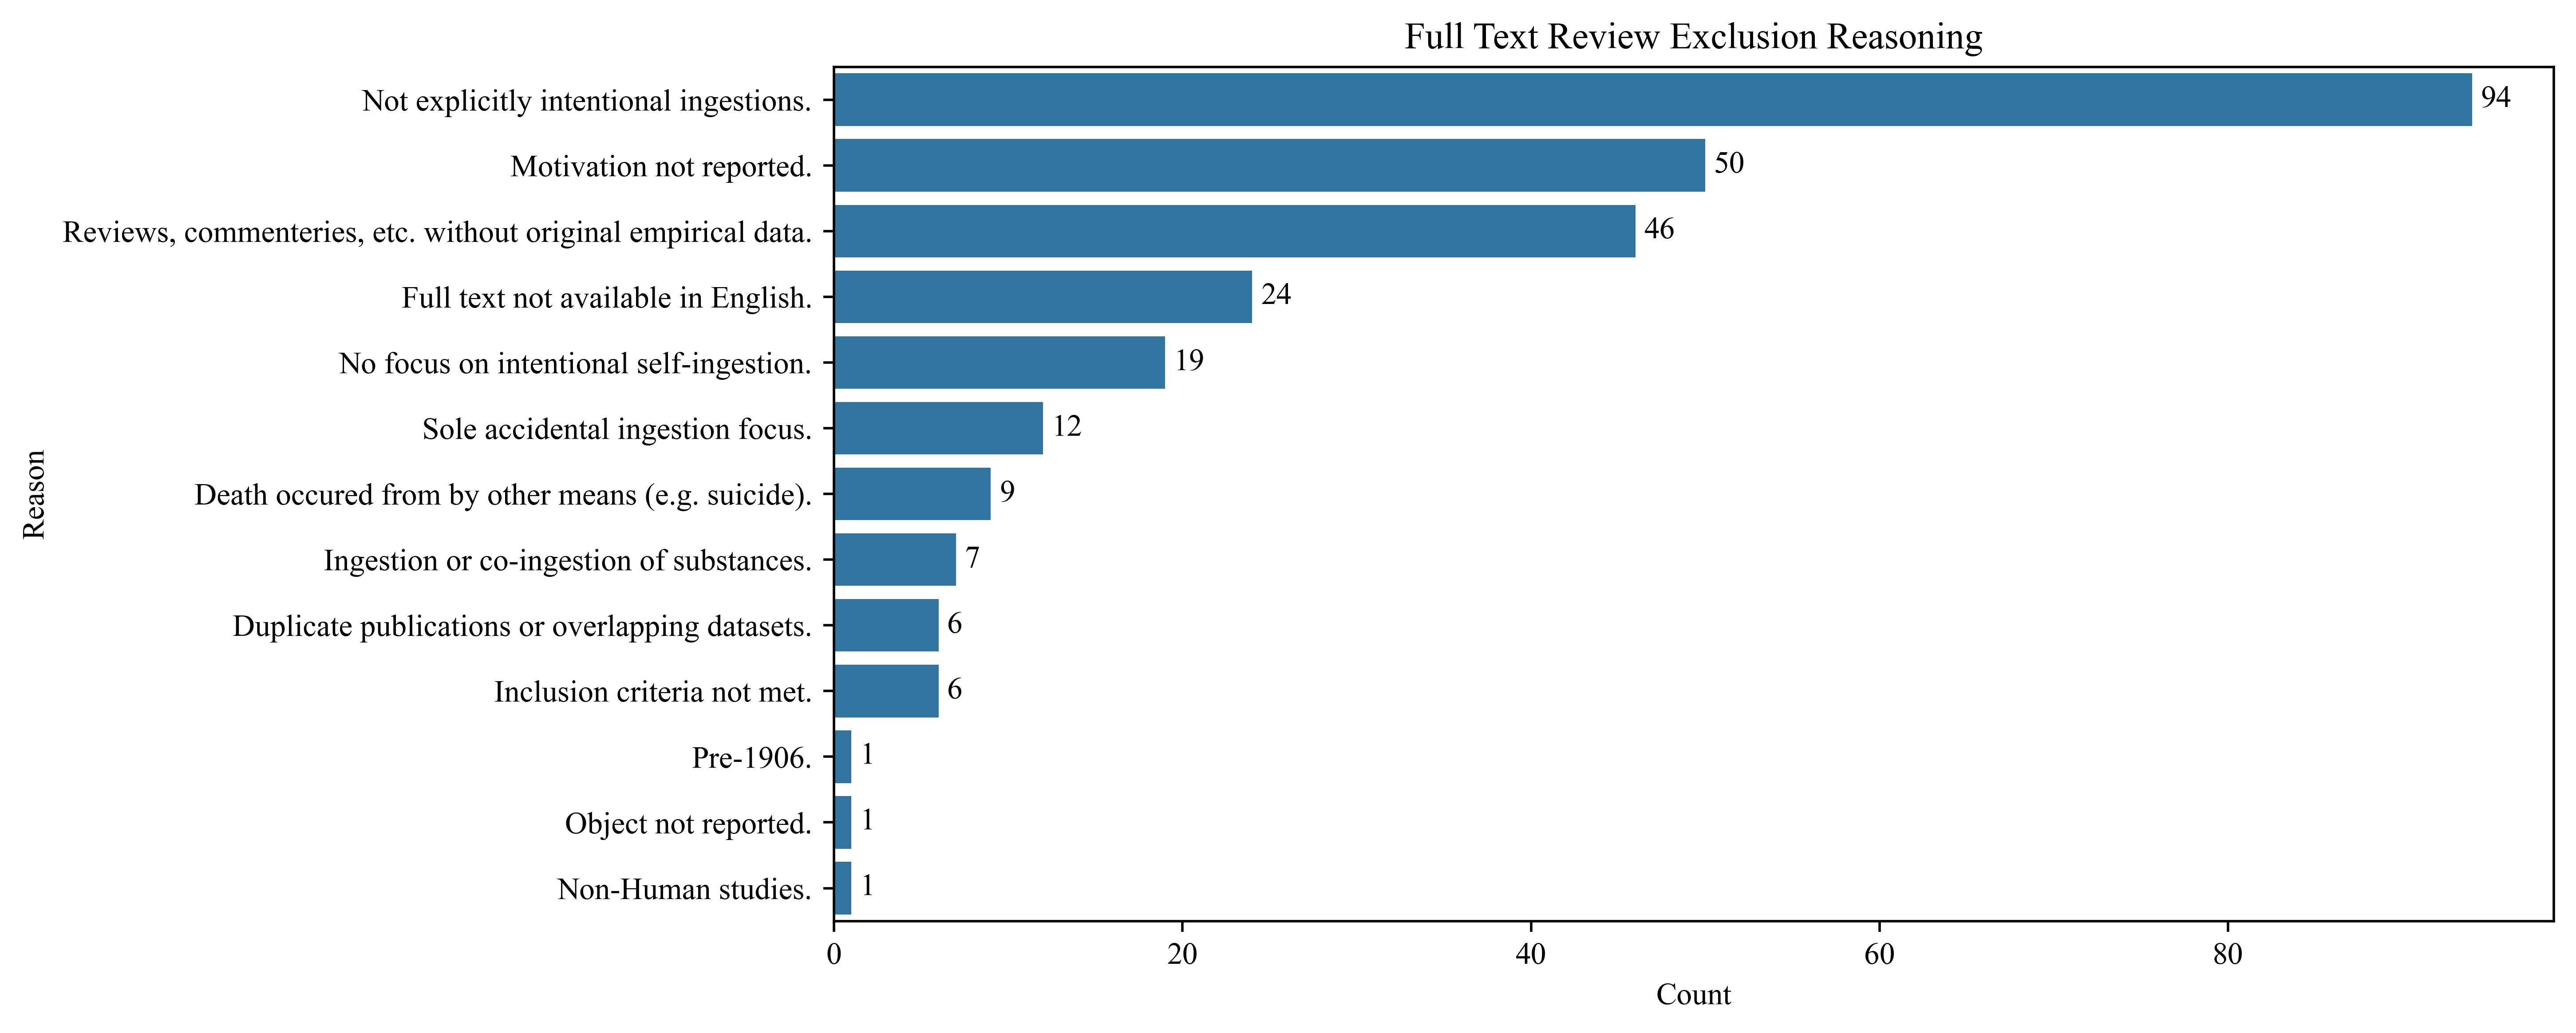

In [13048]:
plt.figure(figsize=(10, 5))

excluded_final_reason_plot = sns.barplot(
    data=excluded_final_reason_counts,
    x='Count',
    y='Reason_Text'
)
excluded_final_reason_plot.set(
    title="Full Text Review Exclusion Reasoning",
    ylabel="Reason",
    xlabel="Count")

for i, (count, reason) in enumerate(zip(excluded_final_reason_counts['Count'], excluded_final_reason_counts['Reason_Text'])):
    excluded_final_reason_plot.annotate(
        text=f"{count}",
        xy=(count + 0.5, i),  # x = count + small offset, y = position in list
        va='center'
    )
plt.savefig("/".join([FIG_DIR, "ft_exclusion_reasoning_plot.png"]), bbox_inches='tight')
plt.show()

In [13049]:
# Count final inclusion for PRISMA diagram
ft_included_final_count = len(ft_included_final)
ft_included_final_count

40

In [13050]:
ft_exclusion_reasoning = ft_excluded_final.groupby('Reason_ID_FINAL').size().sort_values(ascending=False).reset_index()
ft_exclusion_reasoning.columns = ['Reason ID', 'Count']
ft_exclusion_reasoning['Reason_Short'] = ft_exclusion_reasoning['Reason ID'].map(exclusion_criteria_short)
ft_exclusion_reasoning['Reason_Long'] = ft_exclusion_reasoning['Reason ID'].map(exclusion_criteria)
ft_exclusion_reasoning

Reason ID  Count                                       Reason_Short  \
0         9.0     94             Not explicitly intentional ingestions.   
1        14.0     50                           Motivation not reported.   
2         5.0     46  Reviews, commenteries, etc. without original e...   
3         1.0     24                Full text not available in English.   
4         2.0     19            No focus on intentional self-ingestion.   
5         3.0     12                   Sole accidental ingestion focus.   
6        11.0      9  Death occured from by other means (e.g. suicide).   
7         7.0      7           Ingestion or co-ingestion of substances.   
8         6.0      6    Duplicate publications or overlapping datasets.   
9        10.0      6                        Inclusion criteria not met.   
10        4.0      1                                 Non-Human studies.   
11       12.0      1                                          Pre-1906.   
12       15.0      1                               Object not reported.   

                                          Reason_Long  
0   Ingestions not explicitly stated to be intenti...  
1                            Motivation not reported.  
2   Reviews, editorials, commentaries, and opinion...  
3                 Full text not available in English.  
4   Studies not focusing on intentional self-inges...  
5   Studies focussing solely on accidental ingestion.  
6   Ingestions where death resulted from other mea...  
7   Studies focusing on ingestion or co-ingestion ...  
8   Duplicate publications or studies with overlap...  
9                   Does not meet inclusion criteria.  
10                         Non-Human/ animal studies.  
11     Studies before the advent of Endoscopy (1906).  
12               Object characteristics not reported.

In [13051]:
# Check that all full text reviewed items have a final exclusion decision recorded
all_reviewed[all_reviewed['Exclude_FINAL'].isna()]

Empty DataFrame
Columns: [Study_ID, Exclude_JGE, Reason_ID_JGE, Unclear_JGE, Comments_JGE, Exclude_MS, Reason_ID_MS, Unclear_MS, Comments_MS, Exclude_GC, Reason_ID_GC, Comments_GC, Exclude_FINAL, Reason_ID_FINAL]
Index: []

### Bibliography Search

In [13052]:
# Copy data from all reviewed full text data
ft_data = all_reviewed.copy()

# Create list of included_ids from full text screen
included_ids = list(ft_data[ft_data['Exclude_FINAL'] == False]['Study_ID'])

len(included_ids)

40

In [13053]:
# Create dataframe for bibliography search
bib_search_df = pd.DataFrame(columns=['Study_ID', 'Bib_Search_Complete'])

bib_search_df['Study_ID'] = included_ids

file_path = os.path.join(REPORT_PROC_DATA_DIR, 'bib_search_start.csv')
bib_search_df.to_csv(file_path, index=False)

In [13054]:
# Reimport data from bibliography search
import_path = os.path.join(REPORT_RAW_DATA_DIR, 'bib_search_end.xlsx')
bib_search_df = pd.read_excel(import_path)

In [13055]:
# Filter out excluded papers
bib_search_df = bib_search_df[bib_search_df['Study_ID'].isin(included_ids)]

In [13056]:
# Check progress of bibliography search
bib_search_df['Bib_Search_Complete'] = bib_search_df['Bib_Search_Complete'].astype(str)

# Create status map
status_map = {
    'nan': 'Awaiting Search',
    'Y': 'Search Complete',
    'N': 'For second review'
}

# Map statys map to Bib_Search_Complete to make more human readable
bib_search_df['Bib_Search_Complete'] = bib_search_df['Bib_Search_Complete'].map(status_map)

# View status
bib_search_df['Bib_Search_Complete'].value_counts()

Bib_Search_Complete
Search Complete    40
Name: count, dtype: int64

In [13057]:
# Import bibliography search results
import_path = os.path.join(REPORT_RAW_DATA_DIR, 'bib_search_results.csv')
bib_search_df = pd.read_csv(import_path)

# Sort Results by Publication Year, Author, Title ascending.
bib_search_df = bib_search_df.sort_values(by=['Publication Year', 'Author', 'Title'], ascending=True).reset_index(drop=True)

# Import initial results to
import_path = os.path.join(REPORT_PROC_DATA_DIR, "ta_review_start_jge.csv")
ta_start = pd.read_csv(import_path)

# Rename id column
ta_start = ta_start.rename(columns={
    'id': 'Study_ID'
})

# Find max study ID
starting_index = ta_start['Study_ID'].max() + 1

# Create Study_ID for items in bibliography search
bib_search_df['Study_ID'] = range(starting_index, starting_index + len(bib_search_df))

# Export to CSV
file_path = os.path.join(REPORT_PROC_DATA_DIR, 'bib_search_results.csv')
bib_search_df.to_csv(file_path)

In [13058]:
# import TA review
ta_path = os.path.join(REPORT_PROC_DATA_DIR, 'ta_review_final.csv')
ta_review = pd.read_csv(ta_path)

# Import FT review
ft_path = os.path.join(REPORT_PROC_DATA_DIR, 'full_text_screen_end_final.csv')
ft_review = pd.read_csv(ft_path)

# normalise helper
def clean_text(s):
    return str(s).strip().lower() if pd.notnull(s) else ''

# normalise
bib_search_df['Title_clean'] = bib_search_df['Title'].apply(clean_text)
bib_search_df['DOI_clean'] = bib_search_df['DOI'].apply(clean_text)

ta_review['Title_clean'] = ta_review['Title'].apply(clean_text)
ta_review['DOI_clean'] = ta_review['DOI'].apply(clean_text)

# original count
print(f'{len(bib_search_df)} items in bib_search_results before duplicate removal')
bib_search_start_count = len(bib_search_df)

# find duplicates
# Match by DOI (if DOI exists and isn't blank)
doi_matches = bib_search_df[
    (bib_search_df['DOI_clean'] != '') &
    bib_search_df['DOI_clean'].isin(
        ta_review['DOI_clean'].dropna().loc[lambda x: x != '']
    )
]

# Match by Title only where DOI is missing
title_matches = bib_search_df[
    (bib_search_df['DOI_clean'] == '') &
    bib_search_df['Title_clean'].isin(
        ta_review['Title_clean'].dropna().str.strip().str.lower()
    )
]

duplicates = pd.concat([doi_matches, title_matches]).drop_duplicates()

# remove duplicates
duplicate_ids = duplicates['Study_ID'].tolist()
bib_search_df = bib_search_df[~bib_search_df['Study_ID'].isin(duplicate_ids)]

print(f'{len(bib_search_df)} items in bib_search_results after duplicate removal')

# prep ft exclusion
ta_review = ta_review.rename(columns={'id': 'Study_ID'})  # if needed

ft_review = pd.merge(
    ft_review,
    ta_review[['Study_ID', 'DOI_clean']],
    how='left',
    on='Study_ID'
)

# Mark excluded full-text articles
ft_excluded = ft_review[ft_review['Exclude_FINAL'] == True]

# exclude based on DOI
ft_excluded_dois = ft_excluded['DOI_clean'].dropna().loc[lambda x: x != ''].unique()

exclusions = bib_search_df[
    (bib_search_df['DOI_clean'] != '') &
    bib_search_df['DOI_clean'].isin(ft_excluded_dois)
]

print(f"{len(bib_search_df)} items in bib_search_results before full-text exclusions")
bib_search_df = bib_search_df[~bib_search_df['Study_ID'].isin(exclusions['Study_ID'])]
print(f"{len(bib_search_df)} items in bib_search_results after full-text exclusions")

# combine pre-screening exclusions
pre_screen_exclusions = pd.concat([duplicates, exclusions]).drop_duplicates()

# export results
# Debug output to audit dropped papers
duplicates_out = os.path.join(REPORT_PROC_DATA_DIR, 'bib_search_debug_duplicates_found.csv')
duplicates.to_csv(duplicates_out, index=False)
bib_search_duplicates = duplicates.copy()
bib_search_duplicates_count = len(bib_search_duplicates)

# Final pre-screen exclusion list
export_path = os.path.join(REPORT_PROC_DATA_DIR, 'bib_search_pre_screen_exclusions.csv')
pre_screen_exclusions.to_csv(export_path, index=False)

print("Pre-screen exclusions exported.")

204 items in bib_search_results before duplicate removal
192 items in bib_search_results after duplicate removal
192 items in bib_search_results before full-text exclusions
192 items in bib_search_results after full-text exclusions
Pre-screen exclusions exported.


In [13059]:
# Rename to match screening format
bib_search_df = bib_search_df.rename(columns={
    'Access Date': 'Accessed'
})

# Define the screening columns
screening_columns = [
    'Study_ID', 'Publication Year', 'Author', 'Title',
    'Publication Title', 'Database', 'Exclude', 'Reason ID',
    'Paediatric', 'Intention Reported', 'Deliberate intention',
    'Unclear', 'Accessed', 'Comments'
]

# Create empty screening DataFrame with same index as bib_search_df
bib_search_screening = pd.DataFrame(index=bib_search_df.index, columns=screening_columns)

# Fill in matching columns from bib_search_df
for col in screening_columns:
    if col in bib_search_df.columns:
        bib_search_screening[col] = bib_search_df[col]

# Set the Database source
bib_search_screening['Database'] = "Bibliography Search"

# Safely convert numeric fields with missing values allowed
bib_search_screening['Publication Year'] = pd.to_numeric(
    bib_search_screening['Publication Year'], errors='coerce'
).astype('Int64')

bib_search_screening['Study_ID'] = pd.to_numeric(
    bib_search_screening['Study_ID'], errors='coerce'
).astype('Int64')

# Export to CSV
export_path = os.path.join(REPORT_PROC_DATA_DIR, 'bib_search_screen_start.csv')
bib_search_screening.to_csv(export_path, index=False)

# Count number of items found in bibliography search for PRISMA diagram
bib_search_start_count = len(bib_search_screening)

In [13060]:
# Import completed bib_search data extraction and screening
import_path = os.path.join(REPORT_RAW_DATA_DIR, 'bib_search_screen_end.xlsx')
bib_search_screen_end = pd.read_excel(import_path)

In [13061]:
# Cleaning
bib_search_screen_end.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Study_ID              194 non-null    int64  
 1   Publication Year      194 non-null    int64  
 2   Author                190 non-null    object 
 3   Title                 194 non-null    object 
 4   Publication Title     192 non-null    object 
 5   Database              194 non-null    object 
 6   Exclude               194 non-null    bool   
 7   Reason ID             164 non-null    float64
 8   Paediatric            108 non-null    float64
 9   Intention Reported    139 non-null    float64
 10  Deliberate intention  137 non-null    float64
 11  Unclear               0 non-null      float64
 12  Accessed              177 non-null    object 
 13  Study_Design          156 non-null    object 
 14  Population_Type       99 non-null     object 
 15  Study_Setting         9

In [13062]:
df = bib_search_screen_end.copy()

# Replace " " in column headings with "_"
df.columns = df.columns.str.strip(" ").str.replace(" ", "_")

df = df.rename(columns={
    'Deliberate_intention': 'Deliberate_Intention'
})

# Convert boolean columns to boolean
bool_cols = ['Exclude', 'Paediatric', 'Intention_Reported', 'Deliberate_Intention', 'Unclear']
df[bool_cols] = df[bool_cols].astype(bool)

# Convert integer columns to type integer
int_cols = ['Reason_ID']
df[int_cols] = df[int_cols].apply(pd.to_numeric, errors='coerce').astype('Int64')

# Convert category cols to type category
cat_cols = ['Data_Extracted', 'Bib_Search_Complete']
df[cat_cols] = df[cat_cols].astype('category')

df.head()

Study_ID  Publication_Year                         Author  \
0       492              1941            Macmanus, Joseph E.   
1       493              1962                   Perelman, H.   
2       494              1967  Sloop, R. D.; Thompson, J. C.   
3       495              1969             Johnson, Wilbur E.   
4       496              1969  Schechter, D. C.; Gilbert, L.   

                                               Title  \
0  Perforations of the intestine by ingested fore...   
1  Toothpick perforations of the gastrointestinal...   
2  Aorto-esophageal fistula: report of a case and...   
3                       On Ingestion of Razor Blades   
4  Injuries of the heart and great vessels due to...   

                  Publication_Title             Database  Exclude  Reason_ID  \
0   The American Journal of Surgery  Bibliography Search     True          9   
1  The Journal of Abdominal Surgery  Bibliography Search     True          1   
2                  Gastroenterology  Bibliography Search     True          1   
3                              JAMA  Bibliography Search     True         14   
4                            Thorax  Bibliography Search     True          2   

   Paediatric  Intention_Reported  ...  Unclear             Accessed  \
0       False               False  ...     True  2025-04-14 17:11:45   
1        True                True  ...     True                  NaN   
2        True                True  ...     True                  NaN   
3        True                True  ...     True  2025-04-14 14:35:26   
4       False                True  ...     True  2025-04-15 10:26:00   

  Study_Design  Population_Type                              Study_Setting  \
0          NaN              NaN                                        NaN   
1          NaN              NaN                                        NaN   
2          NaN              NaN                                        NaN   
3  Case Report  Single prisoner  New Jersey State Prison Hospital, Trenton   
4          NaN              NaN                                        NaN   

             Study_Location                               DOI Data_Extracted  \
0                       NaN     10.1016/S0002-9610(41)90652-9              N   
1                       NaN                               NaN              N   
2                       NaN                               NaN              N   
3  Trenton, New Jersey, USA  10.1001/jama.1969.03160110135030              Y   
4                       NaN              10.1136/thx.24.2.246              N   

  Bib_Search_Complete                                           Comments  
0                   N  Historical review and case report. Does not re...  
1                   N                            Full text not available  
2                   N                            Full text not available  
3                   N                          Motivation not documented  
4                   N               Insertion of pins into thoracic wall  

[5 rows x 21 columns]

In [13063]:
df['Exclude'].value_counts()

# Ensure each exclusion has a reason
df[(df['Exclude'] == True) & (df['Reason_ID'].isna())]

# Ensure each inclusion has no reason
df[(df['Exclude'] == False) & (~df['Reason_ID'].isna())]

# Export to CSV
export_path = os.path.join(REPORT_PROC_DATA_DIR, 'bib_search_final.csv')
bib_search_screen_clean = df.copy()
bib_search_screen_clean.to_csv(export_path)

# Export included items
bib_search_included = bib_search_screen_clean[bib_search_screen_clean['Exclude'] == False]
output_path = os.path.join(REPORT_PROC_DATA_DIR, 'bib_search_included_final.csv')
bib_search_included.to_csv(output_path, index=False)

bib_search_screen_clean['Exclude'].value_counts()

Exclude
True     164
False     30
Name: count, dtype: int64

In [13064]:
bib_search_excluded = bib_search_screen_clean[bib_search_screen_clean['Exclude'] != False]
len(ft_included_final)

40

In [13065]:
bib_search_exclusion_reasoning = bib_search_excluded['Reason_ID'].value_counts().sort_values(ascending=False).reset_index()
bib_search_exclusion_reasoning.columns = ['Reason_ID', 'Count']

In [13066]:
# Count included items for PRISMA diagram
bib_search_included_count = len(bib_search_included)

### PRISMA Diagram

In [13067]:
subsection_path = os.path.join(SECTIONS_DIR, 'screening_process.tex')

In [13068]:
# Add google count to database counts
new_row = pd.DataFrame({'Database': ['Google Scholar'], 'Count': [google_start_count]})
initial_database_counts = pd.concat([initial_database_counts, new_row], ignore_index=True)

# Sort descending
initial_database_counts = initial_database_counts.sort_values(by='Count', ascending=False)
initial_database_counts

Database  Count
0          PubMed    317
1  Web of Science    277
6  Google Scholar    135
2          Embase     25
3          SCOPUS     24
4        PsycINFO     16
5        Cochrane     14

In [13069]:
# Build list of "Database (Count)" strings
db_entries = [f"{row['Database']} ({row['Count']})" for _, row in initial_database_counts.iterrows()]

# Format in plain English
if len(db_entries) == 1:
    db_text = db_entries[0]
elif len(db_entries) == 2:
    db_text = f"{db_entries[0]} and {db_entries[1]}"
else:
    db_text = ", ".join(db_entries[:-1]) + f", and {db_entries[-1]}"

# Calculate total count
total_records = initial_database_counts['Count'].sum()

# Compose final text
study_selection = f"""
A total of {total_records} records were identified through initial database searches: {db_text}.
"""

# Append to report
with open(subsection_path, 'w') as f:
    f.write(study_selection)
print(f"Overwritten: {subsection_path}")

Overwritten: /Users/jackgedge/Projects/msc_dissertation/iifo_motivation/output/reports/final_report/sections/screening_process.tex


In [13070]:
# Count duplicates removed
total_duplicates_removed = database_duplicates_removed_count + google_duplicates_removed_count
print(total_duplicates_removed)
total_duplicates_removed = total_duplicates_removed + google_duplicate_count
print(total_duplicates_removed)

313
316


In [13071]:
# Create dataframe of to count records removed before screening and the reasons for removal. 
records_removed = pd.DataFrame([{
    'Duplicates Removed': total_duplicates_removed,
    'Records marked as ineligible\nby automation tools': 0,
    'Records removed for \n other reason': 0
}])

In [13072]:
screening_tex = f"""{total_duplicates_removed} duplicates were identified and removed.

Title and abstract screening was undertaken, with JGE reviewing all {records_screened_count} records. A random sample of {ta_ms_sample_size} records was generated for independent screening MS. Cohen's Kappa was calculated for inter-reviewer agreement between JGE and MS, yielding a value of {kappa_ta_jge_ms}, indicating {agreement_label.lower()}. Where JGE and MS disagreed, {len(gc_reviewed_df)} records were reviewed by GC. In total, {title_abstract_exclusion_count} records were excluded, leaving {title_abstract_inclusion_count} for full text review. 

During full text review, JGE reviewed all {len(jge_screened_df)} records. A random sample of {len(ms_review_start_df)} records was generated for independent review by MS. Inter-reviewer agreement was again calculated using Cohen's Kappa, yielding a value of {kappa_ft_jge_ms}, indicating {agreement_label.lower()}. Where JGE and MS disagreed, {len(jge_ms_disagree)} records were reviewed by GC. In total, {len(ft_excluded_final)} records were excluded during full text review. {len(ft_included_final)} records were included and proceeded to bibliography search. 

The bibliographies of the {len(included_ids)} included papers were searched by manually JGE. Relevant bibliography items were identified, collated, and evaluated against the eligibility criteria, yielding {len(bib_search_screen_clean)} results.

These {len(bib_search_screen_clean)} results were reviewed by JGE. {len(bib_search_excluded)} bibliography search records were excluded, leaving {len(bib_search_included)} for inclusion. \n
Therefore, a total of {len(ft_included_final) + len(bib_search_included)} records were included in this study and proceeded to bias assessment. This process is illustrated in Figure~\\ref{{fig:prisma}}.

"""

# Append to report
with open(subsection_path, 'a') as f:
    f.write(screening_tex)
print(f"Overwritten: {subsection_path}")

Overwritten: /Users/jackgedge/Projects/msc_dissertation/iifo_motivation/output/reports/final_report/sections/screening_process.tex


In [13073]:
# Create dataframe of numbers of records found from other sources. 
alternative_sources_df = pd.DataFrame(columns=['Source', 'Count'])
# Add Bibliography Search
alternative_sources_df.loc[len(alternative_sources_df)] = ['Bibliography Search', len(bib_search_screen_clean)]

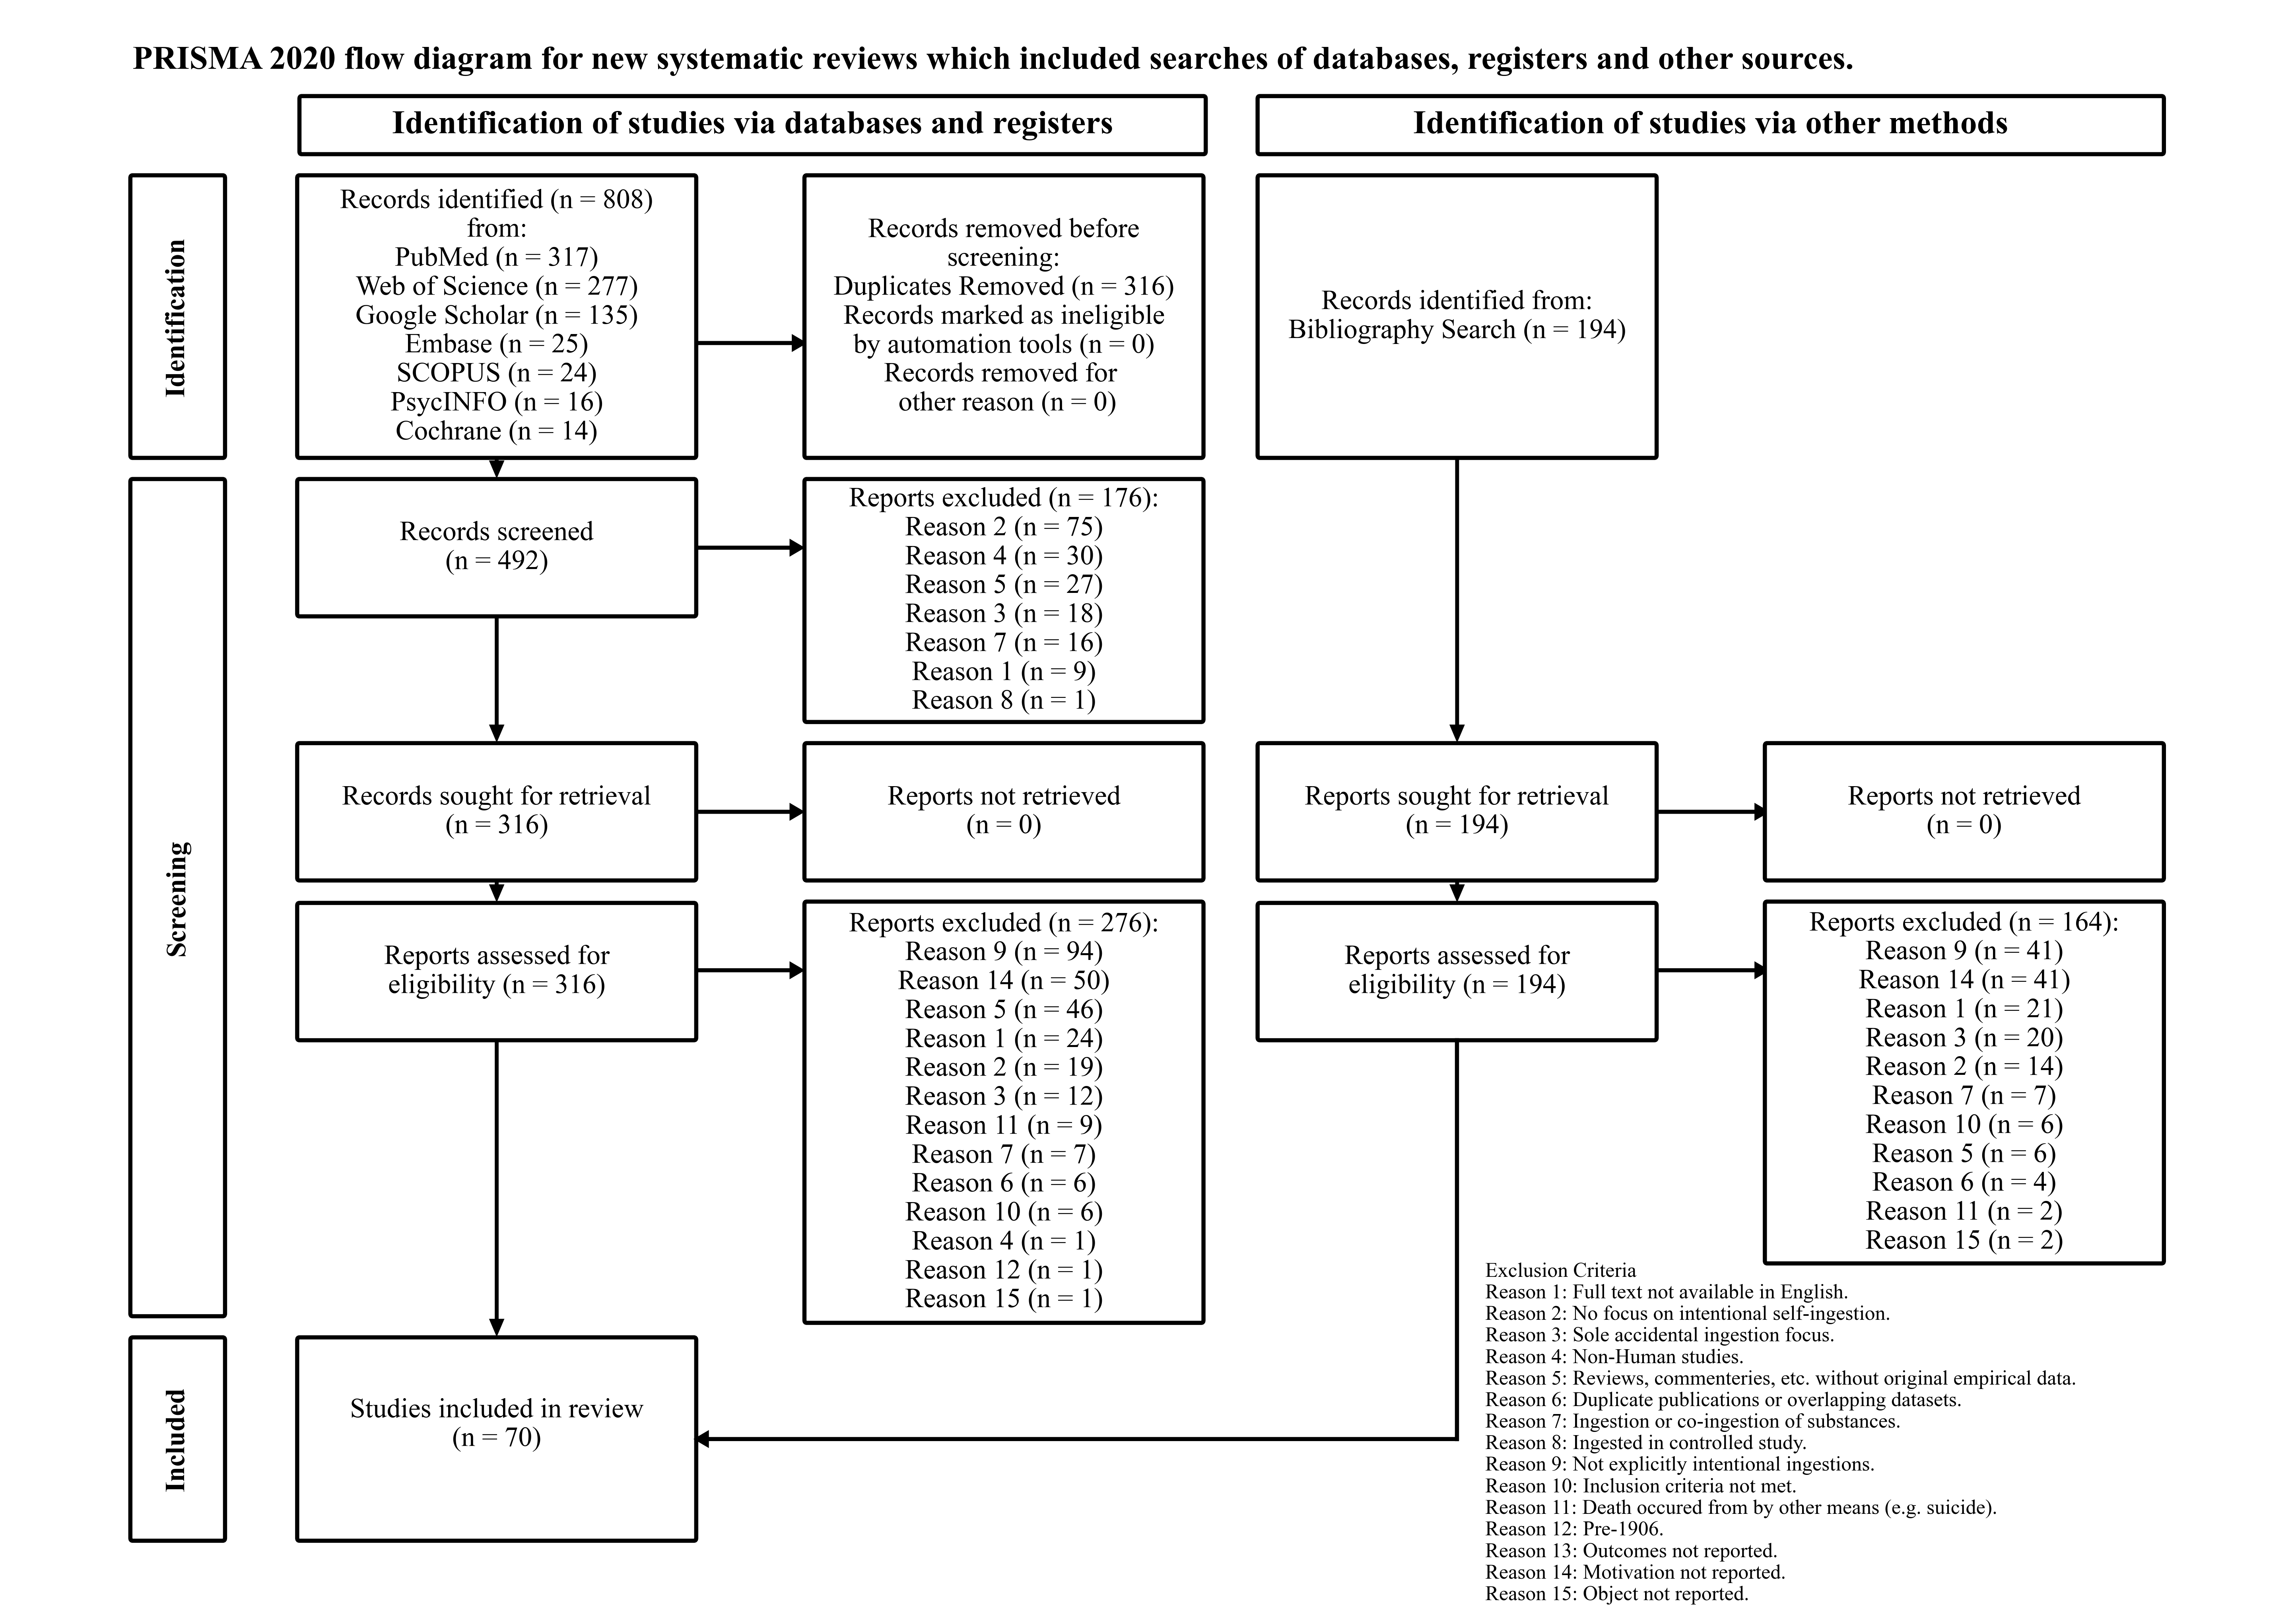

In [13074]:
from matplotlib.patches import FancyBboxPatch, Rectangle, FancyArrow
from matplotlib.lines import Line2D

rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 10
})

# A4 landscape size
fig, ax = plt.subplots(figsize=(11.69, 8.27))
ax.axis('off')

# Set axis limits
ax.set_xlim(0, 20)
ax.set_ylim(0, 12)

# Helper function to draw a vertical arrow
def draw_vertical_arrow(ax, x, y_start, y_end):
    length = y_end - y_start
    arrow = FancyArrow(x, y_start, 0, length,
                       width=0.01, head_width=0.1, head_length=0.1, length_includes_head=True,
                       color='black')
    ax.add_patch(arrow)

# Helper function to draw a horizontal arrow
def draw_horizontal_arrow(ax, x_start, x_end, y):
    length = x_end - x_start
    arrow = FancyArrow(x_start, y, length, 0,
                       width=0.01, head_width=0.1, head_length=0.1, length_includes_head=True,
                       color='black')
    ax.add_patch(arrow)

# Draw title in top-left corner (using ax.text instead of suptitle)
ax.text(1, 11.8, 
        "PRISMA 2020 flow diagram for new systematic reviews which included searches of databases, registers and other sources.",
        fontsize=12, fontweight='bold', ha='left', va='top', color='black')

# Function to draw yellow header box
def draw_yellow_box(ax, x, y, width, height, text, fontsize=12):
    box = FancyBboxPatch(
        (x, y), width, height,
        boxstyle="round,pad=0.02",
        edgecolor="black",
        facecolor="#FFFFFF",
        linewidth=1.5
    )
    ax.add_patch(box)
    ax.text(
        x + width / 2, y + height / 2, text,
        ha='center', va='center',
        fontsize=fontsize, fontweight='bold',
        color='black'
    )

# Draw first yellow header box below the title
draw_yellow_box(ax, x=2.5, y=11, width=8, height=0.4, 
                text="Identification of studies via databases and registers")

# Draw second yellow box beside it
draw_yellow_box(ax, x=11, y=11, width=8, height=0.4,
                text="Identification of studies via other methods")

def draw_vertical_blue_box(ax, x, y, width, height, text, fontsize=10):
    box = FancyBboxPatch(
        (x, y), width, height,
        boxstyle="round,pad=0.02",
        edgecolor="black",
        facecolor="#FFFFFF",  # Light blue (similar to PRISMA)
        linewidth=1.5
    )
    ax.add_patch(box)
    
    # Rotated text (90 degrees, bottom to top)
    ax.text(
        x + width/2, y + height/2, text,
        ha='center', va='center',
        rotation=90,  # rotate 90 degrees counterclockwise
        fontsize=fontsize, fontweight='bold',
        color='black'
    )

draw_vertical_blue_box(ax, x=1, y=8.7, width=0.8, height=2.1, text="Identification")
draw_vertical_blue_box(ax, x=1, y=2.2, width=0.8, height=6.3, text="Screening")
draw_vertical_blue_box(ax, x=1, y=0.5, width=0.8, height=1.5, text="Included")

def draw_white_box(ax, x, y, width, height, text, fontsize=10):
    box = FancyBboxPatch(
        (x, y), width, height,
        boxstyle="round,pad=0.02",
        edgecolor="black",
        facecolor="white",
        linewidth=1.5
    )
    ax.add_patch(box)
    
    ax.text(
        x + width/2, y + height/2, text,
        ha='center', va='center',
        fontsize=fontsize,
        color='black'
    )

# Column 1
draw_white_box(ax, x=2.48, y=8.7, width=3.5, height=2.1, 
            text="Records identified (n = {})\nfrom:\n{}".format(
                initial_database_counts['Count'].sum(),
                "\n".join(
                    f"{db} (n = {count})" 
                    for db, count in zip(
                        initial_database_counts['Database'],
                        initial_database_counts['Count']
                    )
                )
            )
)
draw_vertical_arrow(ax, x=4.23, y_start=8.68, y_end=8.55)
draw_horizontal_arrow(ax, x_start=6, x_end=6.96, y=9.55)  # to records removed before screening
draw_white_box(ax, x=2.48, y=7.5, width=3.5, height=1, 
            text=f"Records screened\n(n = {records_screened_count})")
draw_vertical_arrow(ax, x=4.23, y_start=7.47, y_end=6.55)
draw_horizontal_arrow(ax, x_start=6, x_end=6.94, y=8)  # records excluded
draw_white_box(ax, x=2.48, y=5.5, width=3.5, height=1, 
            text=f"Records sought for retrieval\n(n = {ft_review_start_count})")
draw_horizontal_arrow(ax, x_start=6, x_end=6.94, y=6)  # records not retrieved
draw_vertical_arrow(ax, x=4.23, y_start=5.46, y_end=5.34)
draw_white_box(ax, x=2.48, y=4.29, width=3.5, height=1, 
            text=f"Reports assessed for\neligibility (n = {ft_review_start_count})")
draw_vertical_arrow(ax, x=4.23, y_start=4.27, y_end=2.05)
draw_horizontal_arrow(ax, x_start=6, x_end=6.94, y=4.8)  # reports assessed for eligibility
draw_white_box(ax, x=2.48, y=0.5, width=3.5, height=1.5, 
            text=f"Studies included in review\n(n = {ft_included_final_count + bib_search_included_count})\n")

# Column 2
draw_white_box(
    ax, x=6.98, y=8.7, width=3.5, height=2.1,
    text="Records removed before\nscreening:\n" + "\n".join(
        f"{col} (n = {records_removed[col].iloc[0]})"
        for col in records_removed.columns
    )
)
draw_white_box(ax, x=6.98, y=6.7, width=3.5, height=1.8, 
            text="Reports excluded (n = {}):\n{}".format(
                ta_exclusion_reasoning['Count'].sum(),
                "\n".join(
                    f"Reason {reason_id:.0f} (n = {count:.0f})"
                    for reason_id, count in zip(
                        ta_exclusion_reasoning['Reason ID'],
                        ta_exclusion_reasoning['Count']
                    )
                )
            ))
draw_white_box(ax, x=6.98, y=5.5, width=3.5, height=1, 
            text=f"Reports not retrieved\n(n = 0)")
draw_white_box(ax, x=6.98, y=2.15, width=3.5, height=3.15, 
            text="Reports excluded (n = {}):\n{}".format(
                ft_exclusion_reasoning['Count'].sum(),
                "\n".join(
                    f"Reason {reason_id:.0f} (n = {count:.0f})"
                    for reason_id, count in zip(
                        ft_exclusion_reasoning['Reason ID'],
                        ft_exclusion_reasoning['Count']
                    )
                )
            )
)

# Column 3
draw_white_box(ax, x=11, y=8.7, width=3.5, height=2.1, 
            text="Records identified from:\n{}".format(
                "\n".join(
                    f"{source} (n = {count})"
                    for source, count in zip(
                        alternative_sources_df['Source'],
                        alternative_sources_df['Count']
                    )
                )
            ))
draw_vertical_arrow(ax, x=12.75, y_start=8.68, y_end=6.55)
draw_horizontal_arrow(ax, x_start=14.5, x_end=15.5, y=6)  # to reports not retrieved
draw_white_box(ax, x=11, y=5.5, width=3.5, height=1, 
            text=f"Reports sought for retrieval\n(n = {len(bib_search_screen_clean)})")
draw_vertical_arrow(ax, x=12.75, y_start=5.46, y_end=5.34)
draw_horizontal_arrow(ax, x_start=14.5, x_end=15.5, y=4.8)  # to reports excluded
draw_white_box(ax, x=11, y=4.29, width=3.5, height=1, 
            text=f"Reports assessed for\neligibility (n = {len(bib_search_screen_clean)})")

# Column 4
draw_white_box(ax, x=15.5, y=5.5, width=3.5, height=1, 
            text="Reports not retrieved\n(n = 0)")
draw_white_box(ax, x=15.5, y=2.6, width=3.5, height=2.7, 
            text="Reports excluded (n = {}):\n{}".format(
                bib_search_exclusion_reasoning['Count'].sum(),
                "\n".join(
                    f"Reason {reason_id} (n = {count})"
                    for reason_id, count in zip(
                        bib_search_exclusion_reasoning['Reason_ID'],
                        bib_search_exclusion_reasoning['Count']
                    )
                )
            )
)

# Exclusion
exclusion_text = "Exclusion Criteria\n" + "\n".join(
    f"Reason {id}: {value}"
   for id, value in exclusion_criteria_short.items()
)

# Add text to the canvas
ax.text(13, 0, exclusion_text, fontsize=7.5, va='bottom', ha='left', color='black')

# Draw final right angle arrow

# Coordinates
exit_x = 12.75  # center of top box
exit_y = 4.27    # bottom of top box

corner_y = 1.25  # vertical center of lower box (entry y)
entry_x = 6   # right side of lower box

# Step 1: Downward vertical line
ax.add_line(Line2D([exit_x, exit_x], [exit_y, corner_y], linewidth=1.5, color='black'))

# Step 2: Horizontal arrow into right side of box
arrow = FancyArrow(exit_x, corner_y, entry_x - exit_x, 0,
                   width=0.01, head_width=0.1, head_length=0.1, 
                   length_includes_head=True, color='black')
ax.add_patch(arrow)

plt.tight_layout()

output_path = "/".join([REPORT_FIGURES_DIR, "prisma_diagram.png"])
plt.savefig(output_path)
plt.show()

In [13075]:
initial_database_counts = database_counts.copy()

In [13076]:
import_path = os.path.join(REPORT_RAW_DATA_DIR, 'included_paper_data_final.xlsx')
paper_data = pd.read_excel(import_path)

In [13077]:
# Create list of items included from full_text_screen
ft_included_ids = list(ft_included_final['Study_ID'].unique())

# Create list of items included from bibliography search
bib_search_included_ids = list(bib_search_included['Study_ID'].unique())

# Combine to make list of all included_ids
included_ids = sorted(ft_included_ids + bib_search_included_ids)

## Data Cleaning

### Case Data Cleaning

In [13078]:
# Import raw case_data
import_path = os.path.join(REPORT_RAW_DATA_DIR, 'data_extraction_case_report_end.xlsx')
case_data = pd.read_excel(import_path)
len(case_data)

214

In [13079]:
# Filter data 
case_data = case_data[case_data['Study_ID'].isin(included_ids)]

# Import paper_data, includes Citekey and paper details
import_path = os.path.join(REPORT_RAW_DATA_DIR, 'included_paper_data_final.xlsx')
paper_data = pd.read_excel(import_path)

In [13080]:
# Filter case data 
case_data = case_data[case_data['Study_ID'].isin(included_ids)]

In [13081]:
paper_data['Study_ID'] = paper_data['Study_ID'].astype('Int64')

In [13082]:
# Merge case_data with paper_data on 'Study_ID'
case_data = pd.merge(case_data, 
                     paper_data,
                     how='left', 
                     on='Study_ID')
case_data.head()

Study_ID Patient_ID Age_Yrs Gender Is_Intentional Is_Prisoner  \
0        51     51-001      20   Male              Y           Y   
1        51     51-002      20   Male              Y           Y   
2        51     51-003      19   Male              Y           Y   
3        51     51-004      21   Male              Y           Y   
4        51     51-005      29   Male              Y           Y   

  Is_Psych_Inpat Is_Displaced_Person Under_Influence_Alcohol Psych_Hx  ...  \
0              N                  UK                       N       UK  ...   
1              N                  UK                       N       UK  ...   
2              N                  UK                       N       UK  ...   
3              N                  UK                       N       UK  ...   
4              N                  UK                       N       UK  ...   

  Outcome_Other_Long Comments Publication_Year  \
0                NaN      NaN             1996   
1                NaN      NaN             1996   
2                NaN      NaN             1996   
3                NaN      NaN             1996   
4                NaN      NaN             1996   

                           Authors  \
0  Losanoff, J. E.; Kjossev, K. T.   
1  Losanoff, J. E.; Kjossev, K. T.   
2  Losanoff, J. E.; Kjossev, K. T.   
3  Losanoff, J. E.; Kjossev, K. T.   
4  Losanoff, J. E.; Kjossev, K. T.   

                                               Title  \
0  Gastrointestinal 'crosses'. a new shade from a...   
1  Gastrointestinal 'crosses'. a new shade from a...   
2  Gastrointestinal 'crosses'. a new shade from a...   
3  Gastrointestinal 'crosses'. a new shade from a...   
4  Gastrointestinal 'crosses'. a new shade from a...   

                            Publication_Title  \
0  Archives Of Surgery (Chicago, Ill. : 1960)   
1  Archives Of Surgery (Chicago, Ill. : 1960)   
2  Archives Of Surgery (Chicago, Ill. : 1960)   
3  Archives Of Surgery (Chicago, Ill. : 1960)   
4  Archives Of Surgery (Chicago, Ill. : 1960)   

                                    DOI Study_Country Study_Design  \
0  10.1001/archsurg.1996.01430140056015      Bulgaria  Case Series   
1  10.1001/archsurg.1996.01430140056015      Bulgaria  Case Series   
2  10.1001/archsurg.1996.01430140056015      Bulgaria  Case Series   
3  10.1001/archsurg.1996.01430140056015      Bulgaria  Case Series   
4  10.1001/archsurg.1996.01430140056015      Bulgaria  Case Series   

         Citekey  
0  Losanoff_1996  
1  Losanoff_1996  
2  Losanoff_1996  
3  Losanoff_1996  
4  Losanoff_1996  

[5 rows x 45 columns]

In [13083]:
# Create additional columns 
case_data['Outcome_Conservative'] = case_data.apply(
    lambda row: 'Y' if row['Outcome_Surgery'] != 'Y' and row['Outcome_Endoscopy'] != 'Y' else 'N',
    axis=1
)

In [13084]:
# Create Outcome_Complication
case_data['Outcome_Complication'] = case_data.apply(
    lambda row: 'Y' if row['Outcome_Injury_Needing_Intervention'] == 'Y' or row['Outcome_Perforation'] == 'Y' or row['Outcome_Perforation'] == 'Y' or row['Outcome_Obstruction'] == 'Y' or row['Outcome_Injury_Other'] == 'Y' else 'N',
    axis=1
)

In [13085]:
# Check Patient_IDs are unique
case_data['Patient_ID'].nunique() == len(case_data)

True

In [13086]:
# Check Study_ID matches Patient_ID
case_data['Study_ID'] = case_data['Study_ID'].astype(str)
(case_data['Study_ID'] != case_data['Patient_ID'].str.split("-").str[0]).sum()
case_data['Study_ID'] = case_data['Study_ID'].astype('Int64')

In [13087]:
non_binary_cols = ['Study_ID', 'Patient_ID', 'Age_Yrs', 'Gender', 'Comments']
paper_data_cols = paper_data.columns
binary_cols = [
    col for col in case_data.columns
    if col not in non_binary_cols and col not in paper_data_cols and not col.endswith('Other_Long')
]

binary_cols

['Is_Intentional',
 'Is_Prisoner',
 'Is_Psych_Inpat',
 'Is_Displaced_Person',
 'Under_Influence_Alcohol',
 'Psych_Hx',
 'Severe_Disability_Hx',
 'Previous_Ingestions',
 'Motivation_Intent_To_Harm',
 'Motivation_Protest',
 'Motivation_Psychiatric',
 'Motivation_Psychosocial',
 'Motivation_Unknown',
 'Motivation_Other',
 'Object_Button_Battery',
 'Object_Magnet',
 'Object_Long',
 'Object_Diameter_Large',
 'Object_Sharp',
 'Object_Multiple',
 'Outcome_Endoscopy',
 'Outcome_Surgery',
 'Outcome_Death',
 'Outcome_Injury_Needing_Intervention',
 'Outcome_Perforation',
 'Outcome_Obstruction',
 'Outcome_Intervention_Other',
 'Outcome_Injury_Other',
 'Outcome_Other',
 'Outcome_Conservative',
 'Outcome_Complication']

In [13088]:
# Check for blank binary_cols
filtered_case_data = case_data[case_data[binary_cols].isna().any(axis=1)]
filtered_case_data

Empty DataFrame
Columns: [Study_ID, Patient_ID, Age_Yrs, Gender, Is_Intentional, Is_Prisoner, Is_Psych_Inpat, Is_Displaced_Person, Under_Influence_Alcohol, Psych_Hx, Severe_Disability_Hx, Previous_Ingestions, Motivation_Intent_To_Harm, Motivation_Protest, Motivation_Psychiatric, Motivation_Psychosocial, Motivation_Unknown, Motivation_Other, Motivation_Other_Long, Object_Button_Battery, Object_Magnet, Object_Long, Object_Diameter_Large, Object_Sharp, Object_Multiple, Object_Other_Long, Outcome_Endoscopy, Outcome_Surgery, Outcome_Death, Outcome_Injury_Needing_Intervention, Outcome_Perforation, Outcome_Obstruction, Outcome_Intervention_Other, Outcome_Injury_Other, Outcome_Other, Outcome_Other_Long, Comments, Publication_Year, Authors, Title, Publication_Title, DOI, Study_Country, Study_Design, Citekey, Outcome_Conservative, Outcome_Complication]
Index: []

[0 rows x 47 columns]

In [13089]:
# Convery binary cols to 1 and 0s based on Y and N value
binary_map = {'Y': 1, 'N': 0, 'UK': np.nan}

case_data[binary_cols] = case_data[binary_cols].replace(binary_map)

case_data[binary_cols] = case_data[binary_cols].astype(float)

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_4667/66794324.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  case_data[binary_cols] = case_data[binary_cols].replace(binary_map)


In [13090]:
# Check for blank age column
filtered_case_data = case_data[case_data['Age_Yrs'].isna()]
filtered_case_data

Empty DataFrame
Columns: [Study_ID, Patient_ID, Age_Yrs, Gender, Is_Intentional, Is_Prisoner, Is_Psych_Inpat, Is_Displaced_Person, Under_Influence_Alcohol, Psych_Hx, Severe_Disability_Hx, Previous_Ingestions, Motivation_Intent_To_Harm, Motivation_Protest, Motivation_Psychiatric, Motivation_Psychosocial, Motivation_Unknown, Motivation_Other, Motivation_Other_Long, Object_Button_Battery, Object_Magnet, Object_Long, Object_Diameter_Large, Object_Sharp, Object_Multiple, Object_Other_Long, Outcome_Endoscopy, Outcome_Surgery, Outcome_Death, Outcome_Injury_Needing_Intervention, Outcome_Perforation, Outcome_Obstruction, Outcome_Intervention_Other, Outcome_Injury_Other, Outcome_Other, Outcome_Other_Long, Comments, Publication_Year, Authors, Title, Publication_Title, DOI, Study_Country, Study_Design, Citekey, Outcome_Conservative, Outcome_Complication]
Index: []

[0 rows x 47 columns]

In [13091]:
# Check for blank gender column
filtered_case_data = case_data[case_data['Gender'].isna()]
filtered_case_data

Empty DataFrame
Columns: [Study_ID, Patient_ID, Age_Yrs, Gender, Is_Intentional, Is_Prisoner, Is_Psych_Inpat, Is_Displaced_Person, Under_Influence_Alcohol, Psych_Hx, Severe_Disability_Hx, Previous_Ingestions, Motivation_Intent_To_Harm, Motivation_Protest, Motivation_Psychiatric, Motivation_Psychosocial, Motivation_Unknown, Motivation_Other, Motivation_Other_Long, Object_Button_Battery, Object_Magnet, Object_Long, Object_Diameter_Large, Object_Sharp, Object_Multiple, Object_Other_Long, Outcome_Endoscopy, Outcome_Surgery, Outcome_Death, Outcome_Injury_Needing_Intervention, Outcome_Perforation, Outcome_Obstruction, Outcome_Intervention_Other, Outcome_Injury_Other, Outcome_Other, Outcome_Other_Long, Comments, Publication_Year, Authors, Title, Publication_Title, DOI, Study_Country, Study_Design, Citekey, Outcome_Conservative, Outcome_Complication]
Index: []

[0 rows x 47 columns]

In [13092]:
# Inspect unique values in Gender Column
case_data['Gender'].unique()

array(['Male', 'Female', 'UK'], dtype=object)

In [13093]:
# replace 'UK' with 'Unknown' in Gender columns
case_data['Gender'] = case_data['Gender'].str.replace('UK', 'Unknown')

In [13094]:
# Create list of values that are permitted in gender column
permitted_values = ['Unknown', 'Male', 'Female']

# Create a mask where any value in Gender col is not in permitted_values
mask = ~case_data['Gender'].isin(permitted_values)

# Filter the rows that have problems
filtered_case_data = case_data[mask]
filtered_case_data

Empty DataFrame
Columns: [Study_ID, Patient_ID, Age_Yrs, Gender, Is_Intentional, Is_Prisoner, Is_Psych_Inpat, Is_Displaced_Person, Under_Influence_Alcohol, Psych_Hx, Severe_Disability_Hx, Previous_Ingestions, Motivation_Intent_To_Harm, Motivation_Protest, Motivation_Psychiatric, Motivation_Psychosocial, Motivation_Unknown, Motivation_Other, Motivation_Other_Long, Object_Button_Battery, Object_Magnet, Object_Long, Object_Diameter_Large, Object_Sharp, Object_Multiple, Object_Other_Long, Outcome_Endoscopy, Outcome_Surgery, Outcome_Death, Outcome_Injury_Needing_Intervention, Outcome_Perforation, Outcome_Obstruction, Outcome_Intervention_Other, Outcome_Injury_Other, Outcome_Other, Outcome_Other_Long, Comments, Publication_Year, Authors, Title, Publication_Title, DOI, Study_Country, Study_Design, Citekey, Outcome_Conservative, Outcome_Complication]
Index: []

[0 rows x 47 columns]

In [13095]:
# Replace 'UK' in Age column with np.nan 
case_data['Age_Yrs'] = case_data['Age_Yrs'].replace('UK', np.nan)

# convert to float
case_data['Age_Yrs'] = case_data['Age_Yrs'].astype(float)

# check for unrealistic ages
unrealistic_ages = case_data[(case_data['Age_Yrs'] < 0) | (case_data['Age_Yrs'] > 120)]

unrealistic_ages

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_4667/4174347159.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  case_data['Age_Yrs'] = case_data['Age_Yrs'].replace('UK', np.nan)


Empty DataFrame
Columns: [Study_ID, Patient_ID, Age_Yrs, Gender, Is_Intentional, Is_Prisoner, Is_Psych_Inpat, Is_Displaced_Person, Under_Influence_Alcohol, Psych_Hx, Severe_Disability_Hx, Previous_Ingestions, Motivation_Intent_To_Harm, Motivation_Protest, Motivation_Psychiatric, Motivation_Psychosocial, Motivation_Unknown, Motivation_Other, Motivation_Other_Long, Object_Button_Battery, Object_Magnet, Object_Long, Object_Diameter_Large, Object_Sharp, Object_Multiple, Object_Other_Long, Outcome_Endoscopy, Outcome_Surgery, Outcome_Death, Outcome_Injury_Needing_Intervention, Outcome_Perforation, Outcome_Obstruction, Outcome_Intervention_Other, Outcome_Injury_Other, Outcome_Other, Outcome_Other_Long, Comments, Publication_Year, Authors, Title, Publication_Title, DOI, Study_Country, Study_Design, Citekey, Outcome_Conservative, Outcome_Complication]
Index: []

[0 rows x 47 columns]

In [13096]:
# Check for blank 'Study_ID'
filtered_case_data = case_data[case_data['Study_ID'].isna()]
filtered_case_data

Empty DataFrame
Columns: [Study_ID, Patient_ID, Age_Yrs, Gender, Is_Intentional, Is_Prisoner, Is_Psych_Inpat, Is_Displaced_Person, Under_Influence_Alcohol, Psych_Hx, Severe_Disability_Hx, Previous_Ingestions, Motivation_Intent_To_Harm, Motivation_Protest, Motivation_Psychiatric, Motivation_Psychosocial, Motivation_Unknown, Motivation_Other, Motivation_Other_Long, Object_Button_Battery, Object_Magnet, Object_Long, Object_Diameter_Large, Object_Sharp, Object_Multiple, Object_Other_Long, Outcome_Endoscopy, Outcome_Surgery, Outcome_Death, Outcome_Injury_Needing_Intervention, Outcome_Perforation, Outcome_Obstruction, Outcome_Intervention_Other, Outcome_Injury_Other, Outcome_Other, Outcome_Other_Long, Comments, Publication_Year, Authors, Title, Publication_Title, DOI, Study_Country, Study_Design, Citekey, Outcome_Conservative, Outcome_Complication]
Index: []

[0 rows x 47 columns]

In [13097]:
# Check for blank 'Patient_ID'
filtered_case_data = case_data[case_data['Patient_ID'].isna()]
filtered_case_data

Empty DataFrame
Columns: [Study_ID, Patient_ID, Age_Yrs, Gender, Is_Intentional, Is_Prisoner, Is_Psych_Inpat, Is_Displaced_Person, Under_Influence_Alcohol, Psych_Hx, Severe_Disability_Hx, Previous_Ingestions, Motivation_Intent_To_Harm, Motivation_Protest, Motivation_Psychiatric, Motivation_Psychosocial, Motivation_Unknown, Motivation_Other, Motivation_Other_Long, Object_Button_Battery, Object_Magnet, Object_Long, Object_Diameter_Large, Object_Sharp, Object_Multiple, Object_Other_Long, Outcome_Endoscopy, Outcome_Surgery, Outcome_Death, Outcome_Injury_Needing_Intervention, Outcome_Perforation, Outcome_Obstruction, Outcome_Intervention_Other, Outcome_Injury_Other, Outcome_Other, Outcome_Other_Long, Comments, Publication_Year, Authors, Title, Publication_Title, DOI, Study_Country, Study_Design, Citekey, Outcome_Conservative, Outcome_Complication]
Index: []

[0 rows x 47 columns]

In [13098]:
# Show duplicate row
case_data.duplicated().sum()

np.int64(0)

In [13099]:
export_path = os.path.join(REPORT_PROC_DATA_DIR, 'case_data_clean.csv')
case_data.to_csv(export_path, index=False)

### Series Data Cleaning

In [13100]:
# Import raw series_data
import_path = os.path.join(REPORT_RAW_DATA_DIR, 'data_extraction_series_data_end.xlsx')
series_data = pd.read_excel(import_path)

# Filter to include results from included studies
series_data = series_data[series_data['Study_ID'].isin(included_ids)]

# Merge paper data with series_data
series_data = pd.merge(series_data, 
                       paper_data, 
                       how='left',
                       on='Study_ID')
series_data.head()

Study_ID                                           Comments Patient_Count  \
0       523  "The most common motive for swallowing was sui...            19   
1       581  "In summary, the foreign objects in prisoners ...            33   
2       646                                                NaN            16   

  Case_Count Age_Low Age_High Age_Mean Age_Median Verified_Ingestion_Cases  \
0         19      17       40       24         UK                       UK   
1         52      25       50      NaN         35                       UK   
2         19      19       27       24         UK                       UK   

  Verified_Ingestion_Rate  ... Outcome_Endoscopy_Surgery_Cases  \
0                       1  ...                              UK   
1                       1  ...                               1   
2                       1  ...                               1   

  Outcome_Endoscopy_Surgery_Rate Publication_Year  \
0                             UK             1991   
1                             UK             2007   
2                             UK             2016   

                                             Authors  \
0               Karp, J. G.; Whitman, L.; Convit, A.   
1  Lee, Tae Hee; Kang, Young Woo; Kim, Hyun Jin; ...   
2  Elghali, Mohamed amine; Ghrissi, Rafik; Fadhl,...   

                                               Title  \
0  Intentional ingestion of foreign objects by ma...   
1                Foreign Objects in Korean Prisoners   
2  The Management of Voluntary Ingestion of Razor...   

                         Publication_Title                           DOI  \
0          Hospital & Community Psychiatry           10.1176/ps.42.5.533   
1  The Korean Journal of Internal Medicine    10.3904/kjim.2007.22.4.275   
2                    International Surgery  10.9738/INTSURG-D-16-00204.1   

       Study_Country Study_Design       Citekey  
0                USA  Case Series    Karp_1991b  
1  Republic of Korea  Case Series      Lee_2007  
2            Tunisia  Case Series  Elghali_2016  

[3 rows x 96 columns]

In [13101]:
# Import case bias data
import_path = os.path.join(REPORT_RAW_DATA_DIR, 'bias_assessment_case_report_end.xlsx')
case_bias_data = pd.read_excel(import_path)

# Import series bias data
import_path = os.path.join(REPORT_RAW_DATA_DIR, 'bias_assessment_case_series_end.xlsx')

In [13102]:
# Deal with UK (Unknown values)
series_data = series_data.replace("UK", np.nan)

# Define text_cols
text_cols = ['Study_ID', 'Comments'] + [col for col in series_data.columns if col.endswith('Long')] + list(paper_data.columns)

# Create list of columns containing numerical values
numerical_cols = series_data.columns.drop(text_cols)

# Convert numerical columns to type float
series_data[numerical_cols] = series_data[numerical_cols].astype(float)

series_data.head()

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_4667/1786947401.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series_data = series_data.replace("UK", np.nan)


Study_ID                                           Comments  Patient_Count  \
0       523  "The most common motive for swallowing was sui...           19.0   
1       581  "In summary, the foreign objects in prisoners ...           33.0   
2       646                                                NaN           16.0   

   Case_Count  Age_Low  Age_High  Age_Mean  Age_Median  \
0        19.0     17.0      40.0      24.0         NaN   
1        52.0     25.0      50.0       NaN        35.0   
2        19.0     19.0      27.0      24.0         NaN   

   Verified_Ingestion_Cases  Verified_Ingestion_Rate  ...  \
0                       NaN                      1.0  ...   
1                       NaN                      1.0  ...   
2                       NaN                      1.0  ...   

   Outcome_Endoscopy_Surgery_Cases  Outcome_Endoscopy_Surgery_Rate  \
0                              NaN                             NaN   
1                              1.0                             NaN   
2                              1.0                             NaN   

   Publication_Year                                            Authors  \
0              1991               Karp, J. G.; Whitman, L.; Convit, A.   
1              2007  Lee, Tae Hee; Kang, Young Woo; Kim, Hyun Jin; ...   
2              2016  Elghali, Mohamed amine; Ghrissi, Rafik; Fadhl,...   

                                               Title  \
0  Intentional ingestion of foreign objects by ma...   
1                Foreign Objects in Korean Prisoners   
2  The Management of Voluntary Ingestion of Razor...   

                         Publication_Title                           DOI  \
0          Hospital & Community Psychiatry           10.1176/ps.42.5.533   
1  The Korean Journal of Internal Medicine    10.3904/kjim.2007.22.4.275   
2                    International Surgery  10.9738/INTSURG-D-16-00204.1   

       Study_Country  Study_Design       Citekey  
0                USA   Case Series    Karp_1991b  
1  Republic of Korea   Case Series      Lee_2007  
2            Tunisia   Case Series  Elghali_2016  

[3 rows x 96 columns]

In [13103]:
outcome_cols = [col for col in series_data.columns if col.startswith('Outcome') and col != 'Outcome_Other_Long']

In [13104]:
motivation_cols = [col for col in series_data.columns if col.startswith('Motivation') and col != 'Motivation_Other_Long']

In [13105]:
object_cols = [col for col in series_data.columns if col.startswith('Object')]

In [13106]:
def calculate_variable_rate(input_df, output_df, denominator_col, variable_cols):
    input_df = input_df.copy()
    output_df = output_df.copy()

    # Create an effective denominator, falling back to 'Patient_Count' if available
    if 'Patient_Count' in input_df.columns:
        input_df['effective_denominator'] = input_df[denominator_col].fillna(input_df['Patient_Count'])
    else:
        input_df['effective_denominator'] = input_df[denominator_col]

    # Identify base variable names (remove '_Cases' or '_Rate' suffix)
    variables = {col.replace('_Cases', '').replace('_Rate', '') for col in variable_cols}

    for var in variables:
        rate_col = f"{var}_Rate"
        case_col = f"{var}_Cases"

        if case_col in input_df.columns and rate_col in input_df.columns:
            # Calculate rate if missing and cases + denominator are available
            mask_rate_missing = input_df[rate_col].isna() & input_df[case_col].notna() & input_df['effective_denominator'].notna()
            output_df.loc[mask_rate_missing, rate_col] = (
                input_df.loc[mask_rate_missing, case_col] / input_df.loc[mask_rate_missing, 'effective_denominator']
            )

            # Calculate cases if missing and rate + denominator are available
            mask_cases_missing = input_df[case_col].isna() & input_df[rate_col].notna() & input_df['effective_denominator'].notna()
            output_df.loc[mask_cases_missing, case_col] = (
                input_df.loc[mask_cases_missing, rate_col] * input_df.loc[mask_cases_missing, 'effective_denominator']
            )

            # Ensure columns are numeric
            output_df[rate_col] = pd.to_numeric(output_df[rate_col], errors='coerce')
            output_df[case_col] = pd.to_numeric(output_df[case_col], errors='coerce')

    # Drop the temporary column
    output_df.drop(columns=['effective_denominator'], inplace=True, errors='ignore')

    return output_df

In [13107]:
# Apply function, calculating rate and cases from 'Case_Count'
series_data = calculate_variable_rate(input_df=series_data, 
                                    output_df=series_data.copy(), 
                                    denominator_col='Object_Count', 
                                    variable_cols=object_cols)

series_data[object_cols].head()

Object_Count  Object_Button_Battery_Cases  Object_Button_Battery_Rate  \
0           NaN                          NaN                         NaN   
1           NaN                          0.0                         0.0   
2           NaN                          0.0                         0.0   

   Object_Magnet_Cases  Object_Magnet_Rate  Object_Long_Cases  \
0                  NaN                 NaN                NaN   
1                  0.0                 0.0              32.01   
2                  0.0                 0.0               0.00   

   Object_Long_Rate  Object_Diameter_Large_Cases  Object_Diameter_Large_Rate  \
0               NaN                          NaN                         NaN   
1              0.97                          NaN                         NaN   
2              0.00                          NaN                         NaN   

   Object_Sharp_Cases  Object_Sharp_Rate  Object_Multiple_Cases  \
0                19.0                1.0                    NaN   
1                33.0                1.0                   24.0   
2                16.0                1.0                    1.0   

   Object_Multiple_Rate  Object_Long_Sharp_Cases  Object_Long_Sharp_Rate  \
0                   NaN                      NaN                     NaN   
1              0.727273                      NaN                     NaN   
2              0.062500                      0.0                     0.0   

   Object_Short_Cases  Object_Short_Rate  Object_Short_Sharp_Cases  \
0                 NaN                NaN                       NaN   
1                0.99               0.03                       NaN   
2               16.00               1.00                      16.0   

   Object_Short_Sharp_Rate  
0                      NaN  
1                      NaN  
2                      1.0

In [13108]:
# Apply function, calculating rate and cases from 'Case_Count'
series_data = calculate_variable_rate(input_df=series_data, 
                                    output_df=series_data.copy(), 
                                    denominator_col='Case_Count', 
                                    variable_cols=motivation_cols)

series_data[motivation_cols].head()

Motivation_Intent_To_Harm_Cases  Motivation_Intent_To_Harm_Rate  \
0                              4.0                        0.210526   
1                              0.0                        0.000000   
2                              2.0                        0.105263   

   Motivation_Protest_Cases  Motivation_Protest_Rate  \
0                      3.00                 0.157895   
1                     50.44                 0.970000   
2                     17.00                 0.894737   

   Motivation_Psychiatric_Cases  Motivation_Psychiatric_Rate  \
0                          12.0                     0.631579   
1                           0.0                     0.000000   
2                           0.0                     0.000000   

   Motivation_Psychosocial_Cases  Motivation_Psychosocial_Rate  \
0                            0.0                           0.0   
1                            0.0                           0.0   
2                            0.0                           0.0   

   Motivation_Unknown_Cases  Motivation_Unknown_Rate  Motivation_Other_Cases  \
0                       0.0                      0.0                     0.0   
1                       0.0                      0.0                     0.0   
2                       0.0                      0.0                     0.0   

   Motivation_Other_Rate  Motivation_Other_Psych_Hx_Cases  \
0                    0.0                              0.0   
1                    0.0                              0.0   
2                    0.0                              0.0   

   Motivation_Other_Psych_Hx_Rate  \
0                             0.0   
1                             0.0   
2                             0.0   

   Motivation_Other_Severe_Disability_Hx_Cases  \
0                                          0.0   
1                                          0.0   
2                                          0.0   

   Motivation_Other_Severe_Disability_Hx_Rate  
0                                         0.0  
1                                         0.0  
2                                         0.0

In [13109]:
# Apply function, calculating rate and cases from 'Case_Count'
series_data = calculate_variable_rate(input_df=series_data, 
                                    output_df=series_data.copy(), 
                                    denominator_col='Case_Count', 
                                    variable_cols=outcome_cols)

series_data[outcome_cols].head()

Outcome_Endoscopy_Cases  Outcome_Endoscopy_Rate  Outcome_Surgery_Cases  \
0                      NaN                     NaN                    5.0   
1                     46.0                0.884615                    6.0   
2                      1.0                0.052632                    4.0   

   Outcome_Surgery_Rate  Outcome_Death_Cases  Outcome_Death_Rate  \
0              0.263158                  0.0            0.000000   
1              0.115385                  0.0            0.000000   
2              0.210526                  1.0            0.052632   

   Outcome_Injury_Needing_Intervention_Cases  \
0                                        NaN   
1                                        6.0   
2                                        NaN   

   Outcome_Injury_Needing_Intervention_Rate  Outcome_Perforation_Cases  \
0                                       NaN                        NaN   
1                                  0.115385                        1.0   
2                                       NaN                        1.0   

   Outcome_Perforation_Rate  Outcome_Obstruction_Cases  \
0                       NaN                        NaN   
1                  0.019231                        NaN   
2                  0.052632                        1.0   

   Outcome_Obstruction_Rate  Outcome_Other_Cases  Outcome_Other_Rate  \
0                       NaN                  NaN                 NaN   
1                       NaN                  5.0            0.096154   
2                  0.052632                  2.0            0.105263   

   Outcome_Complication_Cases  Outcome_Conservative_Rate  \
0                         NaN                   0.736842   
1                         6.0                   0.158000   
2                         NaN                   0.789474   

   Outcome_Conservative_Cases  Outcome_Conservative_Rate.1  \
0                        14.0                          NaN   
1                         0.0                          0.0   
2                        15.0                          NaN   

   Outcome_Endoscopy_Surgery_Cases  Outcome_Endoscopy_Surgery_Rate  
0                              NaN                             NaN  
1                              1.0                        0.019231  
2                              1.0                        0.052632

In [13110]:
series_pop_cols = ['Verified_Ingestion_Cases', 'Verified_Ingestion_Rate', 'Is_Intentional_Cases', 'Is_Intentional_Rate', 'Is_Prisoner_Cases', 
                   'Is_Prisoner_Rate', 'Is_Psych_Inpat_Cases', 'Is_Psych_Inpat_Rate', 'Is_Displaced_Person_Cases', 
                   'Is_Displaced_Person_Rate', 'Under_Influence_Alcohol_Cases', 'Under_Influence_Alcohol_Rate', 
                   'Psych_Hx_Cases', 'Psych_Hx_Rate', 'Severe_Disability_Hx_Cases', 'Severe_Disability_Hx_Rate',
                   'Previous_Ingestions_Cases', 'Previous_Ingestions_Rate']

In [13111]:
# Calculate series cols
series_data = calculate_variable_rate(input_df=series_data, 
                                      output_df=series_data.copy(),
                                      denominator_col='Case_Count',
                                      variable_cols=series_pop_cols)

In [13112]:
series_data[series_pop_cols]

Verified_Ingestion_Cases  Verified_Ingestion_Rate  Is_Intentional_Cases  \
0                      19.0                      1.0                 19.00   
1                      52.0                      1.0                 50.44   
2                      19.0                      1.0                 19.00   

   Is_Intentional_Rate  Is_Prisoner_Cases  Is_Prisoner_Rate  \
0                 1.00               19.0               1.0   
1                 0.97               52.0               1.0   
2                 1.00               19.0               1.0   

   Is_Psych_Inpat_Cases  Is_Psych_Inpat_Rate  Is_Displaced_Person_Cases  \
0                   0.0                  0.0                        NaN   
1                   0.0                  0.0                        NaN   
2                   0.0                  0.0                        NaN   

   Is_Displaced_Person_Rate  Under_Influence_Alcohol_Cases  \
0                       NaN                            NaN   
1                       NaN                            NaN   
2                       NaN                            NaN   

   Under_Influence_Alcohol_Rate  Psych_Hx_Cases  Psych_Hx_Rate  \
0                           NaN          18.000          0.947   
1                           NaN           9.464          0.182   
2                           NaN           2.375          0.125   

   Severe_Disability_Hx_Cases  Severe_Disability_Hx_Rate  \
0                         NaN                        NaN   
1                         0.0                        0.0   
2                         NaN                        NaN   

   Previous_Ingestions_Cases  Previous_Ingestions_Rate  
0                        NaN                       NaN  
1                        NaN                       NaN  
2                        2.0                  0.105263

In [13113]:
series_gender_cols = ['Gender_Male_Cases', 'Gender_Male_Rate', 'Gender_Female_Cases', 'Gender_Female_Rate', 'Gender_Unknown_Cases', 'Gender_Unknown_Rate']

series_data = calculate_variable_rate(input_df=series_data,
                                      output_df=series_data.copy(),
                                      denominator_col='Case_Count',
                                      variable_cols=series_gender_cols)

In [13114]:
series_data[series_gender_cols]

Gender_Male_Cases  Gender_Male_Rate  Gender_Female_Cases  \
0               19.0               1.0                  0.0   
1               52.0               1.0                  0.0   
2               19.0               1.0                  0.0   

   Gender_Female_Rate  Gender_Unknown_Cases  Gender_Unknown_Rate  
0                 0.0                   0.0                  0.0  
1                 0.0                   0.0                  0.0  
2                 0.0                   0.0                  0.0

In [13115]:
export_path = os.path.join(REPORT_PROC_DATA_DIR, 'series_data_clean.csv')
series_data.to_csv(export_path, index=False)

## Analysis


### Bias Assessment

#### Case Data


In [13116]:
# Import case_bias_data
import_path = os.path.join(REPORT_RAW_DATA_DIR, 'bias_assessment_case_report_end.xlsx')
case_bias_data = pd.read_excel(import_path)

In [13117]:
# Algorithmically assess bias for case data
data_cols = ['Study_ID', 'Patient_ID']
assessment_cols = ['Patient_Demographic', 'History_Timeline', 'Current_Condition', 
                   'Diagnostic_Assessment',	'Intervention_Treatment',	
                   'Post_Intervention_Condition', 'Harms']

In [13118]:
# Inspect column values
for col in case_bias_data[assessment_cols]:
    print(f"{col}: {case_bias_data[col].unique()}")

Patient_Demographic: ['Y' 'N']
History_Timeline: ['Y' 'N']
Current_Condition: ['Y' 'N']
Diagnostic_Assessment: ['Y' 'N']
Intervention_Treatment: ['Y' 'N']
Post_Intervention_Condition: ['Y' 'N']
Harms: [nan 'Y' 'N']


In [13119]:
# Inspect unique values in Overall_Appraisal column
case_bias_data['Overall_Appraisal'].unique()

array(['Include', 'Exclude'], dtype=object)

In [13120]:
case_data = case_data[case_data['Study_ID'].isin(included_ids)]

In [13121]:
# Merge jbi_case_report_bias_data with case_data_clean
case_data_bias_data_merged = pd.merge(case_data,
                           case_bias_data,
                           on=['Study_ID', 'Patient_ID'],
                           how='left')

In [13122]:
case_data_bias_data_merged = case_data_bias_data_merged[case_data_bias_data_merged['Study_ID'].isin(included_ids)]

In [13123]:
# Create Outcome_Unknown column
# define outcome_cols
outcome_cols = [col for col in case_data_bias_data_merged.columns if col.startswith('Outcome_') and col != 'Outcome_Other_Long']
case_data_bias_data_merged[outcome_cols]

Outcome_Endoscopy  Outcome_Surgery  Outcome_Death  \
0                 0.0              1.0            0.0   
1                 0.0              1.0            0.0   
2                 0.0              1.0            0.0   
3                 0.0              1.0            0.0   
4                 0.0              1.0            0.0   
..                ...              ...            ...   
70                0.0              0.0            1.0   
71                0.0              1.0            0.0   
72                0.0              1.0            0.0   
73                0.0              1.0            0.0   
74                1.0              0.0            0.0   

    Outcome_Injury_Needing_Intervention  Outcome_Perforation  \
0                                   1.0                  1.0   
1                                   1.0                  1.0   
2                                   1.0                  1.0   
3                                   1.0                  1.0   
4                                   1.0                  1.0   
..                                  ...                  ...   
70                                  1.0                  1.0   
71                                  1.0                  0.0   
72                                  1.0                  0.0   
73                                  1.0                  0.0   
74                                  0.0                  0.0   

    Outcome_Obstruction  Outcome_Intervention_Other  Outcome_Injury_Other  \
0                   0.0                         0.0                   0.0   
1                   0.0                         0.0                   0.0   
2                   0.0                         0.0                   0.0   
3                   0.0                         0.0                   0.0   
4                   0.0                         0.0                   0.0   
..                  ...                         ...                   ...   
70                  0.0                         0.0                   0.0   
71                  1.0                         0.0                   0.0   
72                  1.0                         0.0                   0.0   
73                  0.0                         0.0                   0.0   
74                  0.0                         0.0                   0.0   

    Outcome_Other  Outcome_Conservative  Outcome_Complication  
0             0.0                   0.0                   1.0  
1             0.0                   0.0                   1.0  
2             0.0                   0.0                   1.0  
3             0.0                   0.0                   1.0  
4             0.0                   0.0                   1.0  
..            ...                   ...                   ...  
70            0.0                   1.0                   1.0  
71            0.0                   0.0                   1.0  
72            0.0                   0.0                   1.0  
73            0.0                   0.0                   1.0  
74            0.0                   0.0                   0.0  

[75 rows x 11 columns]

In [13124]:
case_data_bias_data_merged['Overall_Appraisal'].value_counts()

Overall_Appraisal
Include    72
Exclude     3
Name: count, dtype: int64

In [13125]:
# Count cases excluded during bias assessment
case_data_bias_data_merged_excluded = case_data_bias_data_merged[case_data_bias_data_merged['Overall_Appraisal'] == 'Exclude']

In [13126]:
subsection_path = os.path.join(SECTIONS_DIR, 'risk_of_bias_results.tex')

In [13127]:
# Get sorted unique citekeys
unique_citekeys = sorted(set(case_data_bias_data_merged['Citekey']))
citekey_block = '\\cite{' + ', '.join(unique_citekeys) + '}'

# Build LaTeX-safe text summary
study_characteristics_text = (
    f"\\subsubsection*{{Case Reports}} \n{len(case_data_bias_data_merged)} cases from "
    f"{case_data_bias_data_merged['Study_ID'].nunique()} studies {citekey_block} were evaluated "
    "using the \\textit{{JBI Checklist for Case Reports}} \\cite{Moola_2020}.\n"
    f"{len(case_data_bias_data_merged_excluded)} cases were excluded."
)

# Save to report
with open(subsection_path, 'w') as f:
    f.write(study_characteristics_text)

print(f"Overwritten: {subsection_path}")

Overwritten: /Users/jackgedge/Projects/msc_dissertation/iifo_motivation/output/reports/final_report/sections/risk_of_bias_results.tex


In [13128]:
case_bias_cols = ['Patient_Demographic',
       'History_Timeline', 'Current_Condition',
       'Diagnostic_Assessment', 'Intervention_Treatment',
       'Post_Intervention_Condition', 'Harms',
       'Takeaway_Lessons']

In [13129]:
case_bias_cols_dict = {
    'Patient_Demographic': 'patient demographic',
    'History_Timeline': 'patient history and timeline',
    'Current_Condition': 'current patient condition',
    'Diagnostic_Assessment': 'diagnostic assessments',
    'Intervention_Treatment': 'interventions and treatments',
    'Post_Intervention_Condition': 'patient post-intervention condition',
    'Harms': 'harms',
    'Takeaway_Lessons': 'takeaway lessons'
}

# Filter excluded cases
excluded_case_data = case_data_bias_data_merged[
    case_data_bias_data_merged['Overall_Appraisal'] == 'Exclude'
]

# Bias columns to evaluate
jbi_domain_cols = case_bias_cols  # use your list

# Fail mask per domain
fail_mask = excluded_case_data[jbi_domain_cols].applymap(
    lambda x: str(x).strip().upper() == 'N'
)

# Count failures
domain_fail_counts = fail_mask.sum()

# Prepare prose
def join_items(items):
    return ", ".join(items[:-1]) + f", and {items[-1]}" if len(items) > 1 else items[0]

failed_domains = []

for col in jbi_domain_cols:
    count = domain_fail_counts[col]
    if count > 0:
        prose_label = case_bias_cols_dict.get(col, col.replace('_', ' ').lower())
        failed_citekeys = sorted(
            excluded_case_data.loc[fail_mask[col], 'Citekey'].dropna().unique()
        )
        citekey_str = f" \\cite{{{', '.join(failed_citekeys)}}}" if failed_citekeys else ""
        case_word = "case" if count == 1 else "cases"
        failed_domains.append(f"{prose_label} ({count} {case_word}){citekey_str}")

# Build main sentence
if failed_domains:
    exclusion_summary = (
        "Cases were excluded at this stage if they failed to describe the following domains: "
        + join_items(failed_domains) + "."
    )
else:
    exclusion_summary = "No cases were excluded at this stage based on JBI criteria."

# All excluded citekeys
all_citekeys = sorted(excluded_case_data['Citekey'].dropna().unique())
if all_citekeys:
    exclusion_summary += f" The excluded cases came from the following studies: \\cite{{{', '.join(all_citekeys)}}}."

# Save
with open(subsection_path, 'a', encoding='utf-8') as f:
    f.write("\n" + exclusion_summary + "\n")

print(exclusion_summary)
print(f"Written to: {subsection_path}")

Cases were excluded at this stage if they failed to describe the following domains: patient history and timeline (1 case) \cite{Lee_2012l}, current patient condition (2 cases) \cite{Lee_2012l}, interventions and treatments (1 case) \cite{Sharma_2022e}, patient post-intervention condition (2 cases) \cite{Lee_2012l}, harms (2 cases) \cite{Lee_2012l}, and takeaway lessons (2 cases) \cite{Lee_2012l}. The excluded cases came from the following studies: \cite{Lee_2012l, Sharma_2022e}.
Written to: /Users/jackgedge/Projects/msc_dissertation/iifo_motivation/output/reports/final_report/sections/risk_of_bias_results.tex


/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_4667/1161303018.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fail_mask = excluded_case_data[jbi_domain_cols].applymap(


In [13130]:
# Create Outcome_Unknown == Y column if outcome columns are all marked as 'UK'
case_data_bias_data_merged['Outcome_Unknown'] = case_data_bias_data_merged[outcome_cols] \
    .apply(lambda row: 1 if ((row.isna()) | (row == 0)).all() else 0, axis=1)

# Set Post_Intervention_Condition_Described to 'N' if Outcome_Unknown == 'Y'
case_data_bias_data_merged.loc[case_data_bias_data_merged['Outcome_Unknown'] == 1, 'Post_Intervention_Condition_Described'] = 'N'

# Set Overall_Appraisal to 'Exclude' if Outcome_Unknown == 'Y'
case_data_bias_data_merged.loc[case_data_bias_data_merged['Outcome_Unknown'] == 1, 'Overall_Appraisal'] = 'Exclude'

# Create dataframe of cases with unknown object characteristics
case_data_outcome_unknown = case_data_bias_data_merged[case_data_bias_data_merged['Outcome_Unknown'] == 1]

# Export to CSV
export_path = os.path.join(REPORT_PROC_DATA_DIR, "case_data_outcome_unknown.csv")
case_data_outcome_unknown.to_csv(export_path, index=False)

In [13131]:
case_data_unknown_outcome_count = len(case_data_outcome_unknown)
case_data_unknown_outcome_count

0

In [13132]:
# Create Object_Unknown column
# define object_cols
object_cols = [col for col in case_data_bias_data_merged.columns if col.startswith('Object_') and col != 'Object_Other_Long']

# Create Outcome_Unknown == Y column if outcome columns are all marked as 'UK'
case_data_bias_data_merged['Object_Unknown'] = case_data_bias_data_merged[object_cols] \
    .apply(lambda row: 1 if ((row.isna()) | (row == 0)).all() else 0, axis=1)

# If Object_Unknown, mark History_Timeline as N, then mark 'Overall_Appraisal' == 'Exclude'
case_data_bias_data_merged.loc[case_data_bias_data_merged['Object_Unknown'] == 1, 'History_Timeline'] = 'N'

# Set Overall_Appraisal to 'Exclude' if Outcome_Unknown == 'Y'
case_data_bias_data_merged.loc[case_data_bias_data_merged['Object_Unknown'] == 1, 'Overall_Appraisal'] = 'Exclude'

# Export to CSV
case_data_object_unknown = case_data_bias_data_merged[case_data_bias_data_merged['Object_Unknown'] == 1]
export_path = os.path.join(REPORT_PROC_DATA_DIR, "case_data_object_unknown.csv")
case_data_object_unknown.to_csv(export_path, index=False)
len(case_data_object_unknown)

1

In [13133]:
case_data_unknown_object_count = len(case_data_bias_data_merged[case_data_bias_data_merged['Object_Unknown'] == 1])
case_data_unknown_object_count

1

In [13134]:
case_data_object_unknown['Study_ID']

8    85
Name: Study_ID, dtype: Int64

In [13135]:
# If Motivation_Unknown, mark History_Timeline as U, then mark 'Overall_Appraisal' == 'Exclude'
case_data_bias_data_merged.loc[case_data_bias_data_merged['Motivation_Unknown'] == 1, 'History_Timeline'] = 'N'

# Set Overall_Appraisal to 'Exclude' if Motivation_Unknown == 'Y'
case_data_bias_data_merged.loc[case_data_bias_data_merged['Motivation_Unknown'] == 1, 'Overall_Appraisal'] = 'Exclude'

case_data_motivation_unknown = case_data_bias_data_merged[case_data_bias_data_merged['Motivation_Unknown'] == 1]

# Export to CSV
export_path = os.path.join(REPORT_PROC_DATA_DIR, "case_data_motivation_unknown.csv")
case_data_motivation_unknown.to_csv(export_path, index=False)
len(case_data_motivation_unknown)

0

In [13136]:
case_data_bias_data_merged['Overall_Appraisal'].value_counts()

Overall_Appraisal
Include    71
Exclude     4
Name: count, dtype: int64

In [13137]:
# Export to CSV
export_path = os.path.join(REPORT_PROC_DATA_DIR, 'case_bias_data_merged.csv')
case_data_bias_data_merged.to_csv(export_path, index=False)

In [13138]:
# Create dataframe of included_cases
included_case_data = case_data_bias_data_merged[case_data_bias_data_merged['Overall_Appraisal'] == 'Include']

In [13139]:
binary_map = {'Y': 1, 'N': 0, 'U': np.nan}
included_case_data[case_bias_cols] = included_case_data[case_bias_cols].replace(binary_map)

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_4667/814452300.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  included_case_data[case_bias_cols] = included_case_data[case_bias_cols].replace(binary_map)
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_4667/814452300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  included_case_data[case_bias_cols] = included_case_data[case_bias_cols].replace(binary_map)


In [13140]:
study_characteristics_text = f"""Of the remaining {len(included_case_data)} cases, """

# Save to report
with open(subsection_path, 'a') as f:
    f.write(study_characteristics_text)
print(f"Overwritten: {subsection_path}")

Overwritten: /Users/jackgedge/Projects/msc_dissertation/iifo_motivation/output/reports/final_report/sections/risk_of_bias_results.tex


In [13141]:
def join_items(items):
    return ", ".join(items[:-1]) + f", and {items[-1]}" if len(items) > 1 else items[0]

# Calculate % of studies meeting each criterion
jbi_case_summary = included_case_data[case_bias_cols].mean().round(2) * 100
jbi_case_results_sorted = jbi_case_summary.sort_values(ascending=False)

# Thresholds
high_threshold = 95
low_threshold = 90

# Categories
perfect_performers = []
high_performers = []
mid_performers = []
low_performers = []

for col in jbi_case_results_sorted.index:
    percent = jbi_case_summary[col]
    if pd.notnull(percent):
        percent = int(round(percent))
        prose_label = case_bias_cols_dict.get(col, col.replace('_', ' ').lower())
        matching_df = included_case_data[included_case_data[col] == 1]
        n = matching_df.shape[0]
        citekeys = sorted(matching_df["Citekey"].dropna().unique().tolist())
        citekey_str = f"\\cite{{{', '.join(citekeys)}}}" if citekeys else ""

        item_text = f"{prose_label} ({n} cases, {percent}\\%)"

        if percent == 100:
            perfect_performers.append((item_text, citekeys))
        elif percent >= high_threshold:
            high_performers.append(f"{item_text} {citekey_str}")
        elif percent >= low_threshold:
            mid_performers.append(f"{item_text} {citekey_str}")
        else:
            low_performers.append(f"{item_text} {citekey_str}")

# Combine citekeys for perfect performers
all_citekeys = sorted({ck for _, citekeys in perfect_performers for ck in citekeys})
perfect_text = join_items([txt for txt, _ in perfect_performers])
perfect_cite = f" \\cite{{{', '.join(all_citekeys)}}}" if all_citekeys else ""

# Build prose parts
parts = []

if perfect_performers:
    parts.append(f"all reported {perfect_text}{perfect_cite}")
if high_performers:
    parts.append(f"Most clearly described {join_items(high_performers)}")
if mid_performers:
    parts.append(f"Reporting was also strong for {join_items(mid_performers)}")
if low_performers:
    parts.append(f"However, fewer studies reported {join_items(low_performers)}")

# Final paragraph
bias_text_summary = ". ".join(parts) + "."

# Write to file
with open(subsection_path, 'a', encoding='utf-8') as f:
    f.write("\n" + bias_text_summary + "\n")

print(bias_text_summary)
print(f"Written to: {subsection_path}")

all reported interventions and treatments (71 cases, 100\%) \cite{Akay_2015f, Al-Faham_2020k, AlShaaibi_2021b, Alao_2006i, Ali_2017, Ali_2020f, Ali_2022g, Apikotoa_2022f, Ataya_2013, Atayan_2016, Beecroft_1998, Benoist_2019e, Berry_2021e, Bhasin_2014, Bhattacharjee_2008, Bhumi_2024f, CamachoDorado_2018, Cauchi_2002, Chang_2017f, Cox_2007, Csaky_1998e, DelgadoSalazar_2020c, DivsalarP._2023a, Emamhadi_2018, Farhadi_2024h, Fry_2010, Gardner_2017h, Goldman_1998f, Guinan_2019f, Hardy_2023g, Jehangir_2019h, Jin_2023, Kar_2015, Kariholu_2008, Kerestes_2019, Kobiela_2015, Kumar_2001, Kumar_2019f, Li_2013, Liu_2005, Losanoff_1996, Losanoff_1997e, Mesfin_2022a, Misra_2013, Naji_2012f, Ohno_2005, Peixoto_2017f, Qureshi_2016, Riva_2018j, Sakellaridis_2008f, Sobnach_2011f, Sultan_2024f, Tammana_2012j, Tanrikulu_2015e, Tay_2004, Thapa_2019f, Trgo_2012f, Wadhwa_2015e, Wildhaber_2005, Wnęk_2015f, Yasin_2009, Yildiz_2016e, fjbuilsRepeatedBehaviorDeliberate2024, teWildt_2010}. Most clearly described pat

In [13142]:
included_case_data['Overall_Appraisal'].value_counts()

Overall_Appraisal
Include    71
Name: count, dtype: int64

In [13143]:
exclusion_summary

'Cases were excluded at this stage if they failed to describe the following domains: patient history and timeline (1 case) \\cite{Lee_2012l}, current patient condition (2 cases) \\cite{Lee_2012l}, interventions and treatments (1 case) \\cite{Sharma_2022e}, patient post-intervention condition (2 cases) \\cite{Lee_2012l}, harms (2 cases) \\cite{Lee_2012l}, and takeaway lessons (2 cases) \\cite{Lee_2012l}. The excluded cases came from the following studies: \\cite{Lee_2012l, Sharma_2022e}.'

#### Series Data


In [13144]:
# Import series_bias_data
import_path = os.path.join(REPORT_RAW_DATA_DIR, 'bias_assessment_case_series_end.xlsx')
series_bias_data = pd.read_excel(import_path)

In [13145]:
series_bias_data.columns

Index(['Study_ID', 'Clear_Inclusion_Criteria',
       'Standard_Condition_Measurement', 'Valid_ID_Method',
       'Consecutive_Inclusion', 'Complete_Inclusion',
       'Clear_Demographic_Reporting', 'Clear_Clinical_Info_Reporting',
       'Clear_Outcome_Followup_Reported', 'Clear_Site_Demographic_Reporting',
       'Appropriate_Statistical_Analysis', 'Overall_Appraisal',
       'Reviewer_Initials', 'Review_Date', 'Comments_Reasoning',
       'Setting_Population', 'Study_Objective', 'Study_Method',
       'Study_Results', 'Study_Conclusion'],
      dtype='object')

In [13146]:
series_bias_cols = ['Clear_Inclusion_Criteria',
       'Standard_Condition_Measurement', 'Valid_ID_Method',
       'Consecutive_Inclusion', 'Complete_Inclusion',
       'Clear_Demographic_Reporting', 'Clear_Clinical_Info_Reporting',
       'Clear_Outcome_Followup_Reported', 'Clear_Site_Demographic_Reporting',
       'Appropriate_Statistical_Analysis']

In [13147]:
binary_map = {'Y': 1, 'N': 0, 'U': np.nan}
series_bias_data[series_bias_cols] = series_bias_data[series_bias_cols].replace(binary_map)

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_4667/3457266875.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series_bias_data[series_bias_cols] = series_bias_data[series_bias_cols].replace(binary_map)


In [13148]:
series_data = series_data[series_data['Study_ID'].isin(included_ids)]

In [13149]:
series_data_bias_data_merged = pd.merge(series_data,
                                        series_bias_data, 
                                        how='left',
                                        on='Study_ID')

In [13150]:
# Algorithmically assess bias for series_data
series_data_bias_data_merged.columns

Index(['Study_ID', 'Comments', 'Patient_Count', 'Case_Count', 'Age_Low',
       'Age_High', 'Age_Mean', 'Age_Median', 'Verified_Ingestion_Cases',
       'Verified_Ingestion_Rate',
       ...
       'Appropriate_Statistical_Analysis', 'Overall_Appraisal',
       'Reviewer_Initials', 'Review_Date', 'Comments_Reasoning',
       'Setting_Population', 'Study_Objective', 'Study_Method',
       'Study_Results', 'Study_Conclusion'],
      dtype='object', length=115)

In [13151]:
outcome_cols = [col for col in series_data_bias_data_merged.columns if col.startswith('Outcome_') and col != 'Outcome_Other_Long']
outcome_cols

['Outcome_Endoscopy_Cases',
 'Outcome_Endoscopy_Rate',
 'Outcome_Surgery_Cases',
 'Outcome_Surgery_Rate',
 'Outcome_Death_Cases',
 'Outcome_Death_Rate',
 'Outcome_Injury_Needing_Intervention_Cases',
 'Outcome_Injury_Needing_Intervention_Rate',
 'Outcome_Perforation_Cases',
 'Outcome_Perforation_Rate',
 'Outcome_Obstruction_Cases',
 'Outcome_Obstruction_Rate',
 'Outcome_Other_Cases',
 'Outcome_Other_Rate',
 'Outcome_Complication_Cases',
 'Outcome_Conservative_Rate',
 'Outcome_Conservative_Cases',
 'Outcome_Conservative_Rate.1',
 'Outcome_Endoscopy_Surgery_Cases',
 'Outcome_Endoscopy_Surgery_Rate']

In [13152]:
# Get sorted unique citekeys
unique_citekeys = sorted(set(series_data_bias_data_merged['Citekey']))
citekey_block = '\\cite{' + ', '.join(unique_citekeys) + '}'

# Build LaTeX-safe text summary
study_characteristics_text = f"""\\subsubsection*{{Case Series}}
Seperately, {series_data_bias_data_merged['Study_ID'].nunique()} studies {citekey_block} were evaluated using the \\textit{{JBI Checklist for Case Series}} \\cite{{Moola_2020}}."""

# Save to report
with open(subsection_path, 'a') as f:
    f.write(study_characteristics_text)
print(f"Overwritten: {subsection_path}")

Overwritten: /Users/jackgedge/Projects/msc_dissertation/iifo_motivation/output/reports/final_report/sections/risk_of_bias_results.tex


In [13153]:
# Create Outcome_Unknown_Rate column to see which series have Unknown Outcomes
series_data_bias_data_merged['Outcome_Unknown_Rate'] = series_data_bias_data_merged[outcome_cols] \
    .apply(lambda row: 1 if (row.isna()).all() else 0, axis=1)

# Export to csv
series_data_outcome_unknown = series_data_bias_data_merged[series_data_bias_data_merged['Outcome_Unknown_Rate'] != 0]
export_path = os.path.join(REPORT_PROC_DATA_DIR, "series_data_outcome_unknown.csv")
series_data_outcome_unknown.to_csv(export_path, index=False)

# Where Outcome_Unknown_Rate == 1, set 'Clear_Outcome_Followup_Reported' equal to 'N'
series_data_bias_data_merged.loc[series_data_bias_data_merged['Outcome_Unknown_Rate'] != 0, 'Clear_Outcome_Followup_Reported'] = "N"

# Where Outcome_Unknown_Rate == 1, set Overall_Appraisal equal to 'Exclude'
series_data_bias_data_merged.loc[series_data_bias_data_merged['Outcome_Unknown_Rate'] != 0, 'Overall_Appraisal'] = "Exclude"

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_4667/2714061499.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  series_data_bias_data_merged.loc[series_data_bias_data_merged['Outcome_Unknown_Rate'] != 0, 'Clear_Outcome_Followup_Reported'] = "N"


In [13154]:
# Filter series that have unknown outcomes
filtered_df = series_data_bias_data_merged[series_data_bias_data_merged['Outcome_Unknown_Rate'] != 0]

# Get sorted unique citekeys
unique_citekeys = sorted(set(filtered_df['Citekey']))
citekey_block = '\\cite{' + ', '.join(unique_citekeys) + '}'

# Build LaTeX-safe text summary
study_characteristics_text = f"""{filtered_df['Study_ID'].nunique()} study {citekey_block} did not report any of the outcomes of interest. """

if len(filtered_df) > 0:
    # Save to report
    with open(subsection_path, 'a') as f:
        f.write(study_characteristics_text)
    print(f"Overwritten: {subsection_path}")

In [13155]:
# Set Clear_Demographic_Reporting to 'N' where Motivation_Unknown_Rate == 1
series_data_bias_data_merged.loc[series_data_bias_data_merged['Motivation_Unknown_Rate'] != 0, 'Clear_Demographic_Reporting'] = 'N'

# Where Motivation_Unknown_Rate == 1, set Overall_Appraisal equal to 'Exclude'
series_data_bias_data_merged.loc[series_data_bias_data_merged['Motivation_Unknown_Rate'] != 0, 'Overall_Appraisal'] = 'Exclude'

# Export to csv
series_data_motivation_unknown = series_data_bias_data_merged[series_data_bias_data_merged['Motivation_Unknown_Rate'] != 0]
export_path = os.path.join(REPORT_PROC_DATA_DIR, "series_data_motivation_unknown.csv")

series_data_motivation_unknown.to_csv(export_path, index=False)

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_4667/2426728192.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  series_data_bias_data_merged.loc[series_data_bias_data_merged['Motivation_Unknown_Rate'] != 0, 'Clear_Demographic_Reporting'] = 'N'


In [13156]:
# Filter series that have unknown motivation
filtered_df = series_data_bias_data_merged[series_data_bias_data_merged['Motivation_Unknown_Rate'] != 0]

# Get sorted unique citekeys
unique_citekeys = sorted(set(filtered_df['Citekey']))
citekey_block = '\\cite{' + ', '.join(unique_citekeys) + '}'

# Build LaTeX-safe text summary
study_characteristics_text = f"""{filtered_df['Study_ID'].nunique()} studies {citekey_block} did not report motivation or reported partial reasons for motivation (i.e. for some of the included population, but not all). 
"""

if len(filtered_df) > 0:
    # Save to report
    with open(subsection_path, 'a') as f:
        f.write(study_characteristics_text)
    print(f"Overwritten: {subsection_path}")

In [13157]:
# Exclude papers where Object_Unknown_Rate == 1

# Define object_cols
object_cols = [col for col in series_data_bias_data_merged.columns if col.startswith('Object_') and col != 'Object_Count']

# Apply finction to object cols
series_data_bias_data_merged['Object_Unknown_Rate'] = series_data_bias_data_merged[object_cols] \
    .apply(lambda row: 1 if (row.isna()).all() else 0, axis=1)

# Mark 'Clear_Clinical_Info_Reporting' as 'N' if Object_Unknown_Rate == 1
series_data_bias_data_merged.loc[series_data_bias_data_merged['Object_Unknown_Rate'] != 0, 'Clear_Clinical_Info_Reporting'] = 'N'

# Mark items as 'Exclude' if 'Object_Unknown_Rate' == 1
series_data_bias_data_merged.loc[series_data_bias_data_merged['Object_Unknown_Rate'] != 0, 'Overall_Appraisal'] = 'Exclude'

series_data_object_unknown = series_data_bias_data_merged[series_data_bias_data_merged['Object_Unknown_Rate'] != 0]
export_path = os.path.join(REPORT_PROC_DATA_DIR, "series_data_object_unknown.csv")
series_data_object_unknown.to_csv(export_path, index=False)

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_4667/1612936920.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  series_data_bias_data_merged.loc[series_data_bias_data_merged['Object_Unknown_Rate'] != 0, 'Clear_Clinical_Info_Reporting'] = 'N'


In [13158]:
# Filter series that have unknown motivation
filtered_df = series_data_bias_data_merged[series_data_bias_data_merged['Object_Unknown_Rate'] != 0]
len(filtered_df)
# Get sorted unique citekeys
unique_citekeys = sorted(set(filtered_df['Citekey']))
citekey_block = '\\cite{' + ', '.join(unique_citekeys) + '}'

# Build LaTeX-safe text summary
study_characteristics_text = f""" {filtered_df['Study_ID'].nunique()} studies {citekey_block} did not report object characteristics, or reported them partially."""

if len(filtered_df) > 0:
    # Save to report
    with open(subsection_path, 'a') as f:
        f.write(study_characteristics_text)
    print(f"Overwritten: {subsection_path}")

In [13159]:
# Filter series that are exluded
excluded_series_data = series_data_bias_data_merged[series_data_bias_data_merged['Overall_Appraisal'] == 'Exclude']

# Filter series that are included
included_series_data = series_data_bias_data_merged[series_data_bias_data_merged['Overall_Appraisal'] == 'Include']

# Get sorted unique citekeys
excluded_unique_citekeys = sorted(set(excluded_series_data['Citekey']))
excluded_citekey_block = '\\cite{' + ', '.join(excluded_unique_citekeys) + '}'

# Get sorted unique citekeys
included_unique_citekeys = sorted(set(included_series_data['Citekey']))
included_citekey_block = '\\cite{' + ', '.join(included_unique_citekeys) + '}'

# Build LaTeX-safe text summary
study_characteristics_text = f""" Therefore, {excluded_series_data['Study_ID'].nunique()} studies {excluded_citekey_block} were considered high risk of bias and excluded from analysis. Exclusions were based on the absence of information essential to the review question — specifically, the reporting of motivation, object characteristics, and clinical outcomes. These variables were required to assess how motivation may influence treatment decisions and patient outcomes. As such, studies lacking this information were considered unable to meaningfully contribute to the synthesis and were excluded to preserve the integrity of the analysis. This left {included_series_data['Study_ID'].nunique()} case series {included_citekey_block}. These two studies adequately fulfilled all JBI criteria and were deemed low risk of bias."""

if excluded_series_data['Study_ID'].nunique() > 0:
    # Save to report
    with open(subsection_path, 'a') as f:
        f.write(study_characteristics_text)
    print(f"Overwritten: {subsection_path}")

In [13160]:
series_data_bias_data_merged[['Study_ID', 'Overall_Appraisal']]

/opt/anaconda3/envs/msc-dissertation/lib/python3.12/site-packages/IPython/core/displayhook.py:292: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


Study_ID Overall_Appraisal
0       523           Include
1       581           Include
2       646           Include

In [13161]:
series_data_bias_data_merged[series_data_bias_data_merged['Overall_Appraisal'] == 'Include']

Study_ID                                           Comments  Patient_Count  \
0       523  "The most common motive for swallowing was sui...           19.0   
1       581  "In summary, the foreign objects in prisoners ...           33.0   
2       646                                                NaN           16.0   

   Case_Count  Age_Low  Age_High  Age_Mean  Age_Median  \
0        19.0     17.0      40.0      24.0         NaN   
1        52.0     25.0      50.0       NaN        35.0   
2        19.0     19.0      27.0      24.0         NaN   

   Verified_Ingestion_Cases  Verified_Ingestion_Rate  ...  Reviewer_Initials  \
0                      19.0                      1.0  ...                JGE   
1                      52.0                      1.0  ...                JGE   
2                      19.0                      1.0  ...                JGE   

   Review_Date  Comments_Reasoning  \
0   2025-05-14         No comment.   
1   2025-06-02         No comment.   
2   2025-05-14         No comment.   

                                  Setting_Population  \
0  Medical prison ward for men in a New York City...   
1   Prisoners attended two hospitals in South Korea.   
2  Patients referred from prison to Department of...   

                                     Study_Objective  \
0  Records were examined for demographic and psyc...   
1  To investigate the time interval between forei...   
2  A descriptive study including all detainees in...   

                                        Study_Method  \
0  Two psychiatrically trained raters examined th...   
1  Reviewed the medical records and endoscopic fi...   
2                                                NaN   

                                       Study_Results  \
0                         See statistical breakdown.   
1  All the patients were male with a mean age of ...   
2  There were 16 men with a mean age of 24 years,...   

                                    Study_Conclusion  Outcome_Unknown_Rate  \
0  In our series of 19 prisoners who ingested obj...                     0   
1  The foreign objects in prisoners were a variet...                     0   
2  Our experience enabled us to confirm the few d...                     0   

   Object_Unknown_Rate  
0                    0  
1                    0  
2                    0  

[3 rows x 117 columns]

In [13162]:
included_series_data = series_data_bias_data_merged[series_data_bias_data_merged['Overall_Appraisal'] == 'Include']
included_series_data.head()

Study_ID                                           Comments  Patient_Count  \
0       523  "The most common motive for swallowing was sui...           19.0   
1       581  "In summary, the foreign objects in prisoners ...           33.0   
2       646                                                NaN           16.0   

   Case_Count  Age_Low  Age_High  Age_Mean  Age_Median  \
0        19.0     17.0      40.0      24.0         NaN   
1        52.0     25.0      50.0       NaN        35.0   
2        19.0     19.0      27.0      24.0         NaN   

   Verified_Ingestion_Cases  Verified_Ingestion_Rate  ...  Reviewer_Initials  \
0                      19.0                      1.0  ...                JGE   
1                      52.0                      1.0  ...                JGE   
2                      19.0                      1.0  ...                JGE   

   Review_Date  Comments_Reasoning  \
0   2025-05-14         No comment.   
1   2025-06-02         No comment.   
2   2025-05-14         No comment.   

                                  Setting_Population  \
0  Medical prison ward for men in a New York City...   
1   Prisoners attended two hospitals in South Korea.   
2  Patients referred from prison to Department of...   

                                     Study_Objective  \
0  Records were examined for demographic and psyc...   
1  To investigate the time interval between forei...   
2  A descriptive study including all detainees in...   

                                        Study_Method  \
0  Two psychiatrically trained raters examined th...   
1  Reviewed the medical records and endoscopic fi...   
2                                                NaN   

                                       Study_Results  \
0                         See statistical breakdown.   
1  All the patients were male with a mean age of ...   
2  There were 16 men with a mean age of 24 years,...   

                                    Study_Conclusion  Outcome_Unknown_Rate  \
0  In our series of 19 prisoners who ingested obj...                     0   
1  The foreign objects in prisoners were a variet...                     0   
2  Our experience enabled us to confirm the few d...                     0   

   Object_Unknown_Rate  
0                    0  
1                    0  
2                    0  

[3 rows x 117 columns]

In [13163]:
series_bias_cols

['Clear_Inclusion_Criteria',
 'Standard_Condition_Measurement',
 'Valid_ID_Method',
 'Consecutive_Inclusion',
 'Complete_Inclusion',
 'Clear_Demographic_Reporting',
 'Clear_Clinical_Info_Reporting',
 'Clear_Outcome_Followup_Reported',
 'Clear_Site_Demographic_Reporting',
 'Appropriate_Statistical_Analysis']

In [13164]:
series_bias_cols_prose_dict = {
    'Clear_Inclusion_Criteria': 'clear inclusion criteria',
    'Standard_Condition_Measurement': 'standard condition measurements',
    'Valid_ID_Method': 'valid patient identification methods',
    'Consecutive_Inclusion': 'consecutive inclusion',
    'Complete_Inclusion': 'complete inclusion',
    'Clear_Demographic_Reporting': 'clear demographic information',
    'Clear_Clinical_Info_Reporting': 'clear clinical information' ,
    'Clear_Outcome_Followup_Reported': 'clear outcome and follow-up',
    'Clear_Site_Demographic_Reporting': 'clear site demographic information',
    'Appropriate_Statistical_Analysis': 'approprate statistical analysis'
}

In [13165]:
series_bias_cols_prose_dict = {
    'Clear_Inclusion_Criteria': 'clear inclusion criteria',
    'Standard_Condition_Measurement': 'standard condition measurements',
    'Valid_ID_Method': 'valid patient identification methods',
    'Consecutive_Inclusion': 'consecutive inclusion',
    'Complete_Inclusion': 'complete inclusion',
    'Clear_Demographic_Reporting': 'clear demographic information',
    'Clear_Clinical_Info_Reporting': 'clear clinical information' ,
    'Clear_Outcome_Followup_Reported': 'clear outcome and follow-up',
    'Clear_Site_Demographic_Reporting': 'clear site demographic information',
    'Appropriate_Statistical_Analysis': 'approprate statistical analysis'
}

def write_bias_summary_for_case_series(df, series_bias_cols, subsection_path, prose_dict, citekey_col="citekey"):
    from collections import defaultdict

    # Calculate % of studies meeting each JBI criterion
    jbi_case_summary = df[series_bias_cols].mean().round(2) * 100
    sorted_cols = jbi_case_summary.sort_values(ascending=False).index.tolist()

    # Thresholds
    perfect_threshold = 100
    high_threshold = 95
    low_threshold = 90

    # Storage
    perfect_performers = []
    high_performers = []
    mid_performers = []
    low_performers = []
    citekey_map = defaultdict(set)

    for col in sorted_cols:
        percent = jbi_case_summary[col]
        prose_text = prose_dict.get(col.strip(), col.strip().replace("_", " ").lower())
        matching_df = df[df[col] == 1]
        citekeys = sorted(matching_df[citekey_col].dropna().unique().tolist())
        citekey_map[col] = set(citekeys)
        n_papers = len(citekeys)

        if percent == 100:
            perfect_performers.append(prose_text)
        elif percent >= high_threshold:
            high_performers.append((prose_text, n_papers, citekeys))
        elif percent >= low_threshold:
            mid_performers.append((prose_text, n_papers, citekeys))
        else:
            low_performers.append((prose_text, n_papers, citekeys))

    def same_citekeys(items):
        """Returns citekey string if all citekeys are the same across items."""
        all_sets = [set(keys) for _, _, keys in items]
        if not all_sets:
            return None
        first = all_sets[0]
        if all(s == first for s in all_sets[1:]):
            return f"\\cite{{{','.join(sorted(first))}}}"
        return None

    def format_items(items):
        return [f"{text} ({n} studies \\cite{{{','.join(keys)}}})" for text, n, keys in items]

    def join_items(items):
        return ", ".join(items[:-1]) + f", and {items[-1]}" if len(items) > 1 else items[0]

    parts = []
    intro = "Reporting quality was generally high across all JBI domains."

    if perfect_performers:
        citekeys = set()
        for col in sorted_cols:
            if col in prose_dict and jbi_case_summary[col] == 100:
                citekeys |= citekey_map[col]
        cite_str = f"\\cite{{{','.join(sorted(citekeys))}}}" if citekeys else ""
        parts.append(f"All included case series fully reported {join_items(perfect_performers)} {cite_str}")

    for label, items in [("Most clearly described", high_performers),
                         ("Reporting was also strong for", mid_performers),
                         (f"However, fewer studies ({len(low_performers)}) reported", low_performers)]:
        if items:
            shared_cite = same_citekeys(items)
            text_items = [text for text, _, _ in items]
            if shared_cite:
                parts.append(f"{label} {join_items(text_items)} {shared_cite}")
            else:
                parts.append(f"{label} {join_items(format_items(items))}")

    # Combine and write
    bias_text_summary = intro + " " + ". ".join(parts) + "."

    with open(subsection_path, 'a', encoding='utf-8') as f:
        f.write("\n" + bias_text_summary + "\n")

    print(f"Written to: {subsection_path}")
    print(bias_text_summary)

write_bias_summary_for_case_series(
    df=included_series_data,
    series_bias_cols=series_bias_cols,
    subsection_path=subsection_path,
    prose_dict=series_bias_cols_prose_dict,
    citekey_col="Citekey"
)

Written to: /Users/jackgedge/Projects/msc_dissertation/iifo_motivation/output/reports/final_report/sections/risk_of_bias_results.tex
Reporting quality was generally high across all JBI domains. All included case series fully reported clear inclusion criteria, standard condition measurements, valid patient identification methods, complete inclusion, clear demographic information, clear clinical information, clear outcome and follow-up, and approprate statistical analysis \cite{Elghali_2016,Karp_1991b,Lee_2007}. However, fewer studies (2) reported consecutive inclusion, and clear site demographic information \cite{Elghali_2016,Karp_1991b}.


### Study Characteristics

#### Case Reports

In [13166]:
# Define subsection
subsection = "study_characteristics.tex"

# Define subsection_path
subsection_path = os.path.join(SECTIONS_DIR, subsection)

# Get sorted unique citekeys
case_unique_citekeys = sorted(set(included_case_data['Citekey']))
case_citekey_block = '\\cite{' + ', '.join(case_unique_citekeys) + '}'

# Get sorted unique citekeys
series_unique_citekeys = sorted(set(included_series_data['Citekey']))
series_citekey_block = '\\cite{' + ', '.join(series_unique_citekeys) + '}'

# Build LaTeX-safe text summary
study_characteristics_text = f"""\\subsection*{{Study Characteristics}}
A total of {included_case_data['Study_ID'].nunique() + included_series_data['Study_ID'].nunique()} studies were included in the synthesis. {included_case_data['Study_ID'].nunique()} studies were case reports, yielding {included_case_data['Patient_ID'].nunique()} cases {case_citekey_block}. A full list of group summary case-level characteristics and outcomes is available in Table~\\ref{{tab:grouped_summary_wide}}. 
"""

# Save to report
with open(subsection_path, 'w') as f:
    f.write(study_characteristics_text)
print(f"Overwritten: {subsection_path}")

Overwritten: /Users/jackgedge/Projects/msc_dissertation/iifo_motivation/output/reports/final_report/sections/study_characteristics.tex


In [13167]:
case_data = included_case_data.copy()

results_list = []

In [13168]:
def generate_summary_prose_tex(
    summary_df,
    case_df,
    subgroup: str = None,
    variable_col="Variable",
    description_col="Text_Label",
    count_col="Count",
    percentage_col="Percentage",
    citekey_col="Citekey",
    sort_descending: bool = True
):
    """
    Generate LaTeX-formatted prose from a summary table.

    Args:
        summary_df (pd.DataFrame): Summary table
        case_df (pd.DataFrame): Case-level data
        subgroup (str): Optional LaTeX heading
        variable_col (str): Raw column name (e.g. Outcome = column in case_df)
        description_col (str): Cleaned human-readable name
        count_col (str): Count
        percentage_col (str): Percentage
        citekey_col (str): Citekey column in case_df

    Returns:
        str: LaTeX-formatted prose string
    """

    if sort_descending == True:
        summary_df = summary_df.sort_values(by=count_col, ascending=False)

    summary_lines = []

    for _, row in summary_df.iterrows():
        var = row[variable_col]
        description = row[description_col]
        count = row[count_col]
        percentage = row[percentage_col]

        if pd.isna(description) or count == 0:
            continue

        # Find matching cases in case_df
        if var in case_df.columns:
            cases_with_var = case_df[case_df[var] == 1]
            citekeys = sorted(set(cases_with_var[citekey_col].dropna()))
        else:
            citekeys = []

        citekey_block = '\\cite{' + ', '.join(citekeys) + '}' if citekeys else ''
        case_str = "case" if count == 1 else "cases"
        summary_lines.append(f"{int(count)} {case_str} ({percentage:.0f}\\%) {description} {citekey_block}")

    prose = ", ".join(summary_lines) + ". " if summary_lines else ""

    print(prose)
    return f"\\paragraph*{{{subgroup}}} {prose}" if subgroup else prose

In [13169]:
def categorise_case_gender(val):
    if val == 'Male':
        return pd.Series({'Gender_Male': 1, 'Gender_Female': 0, 'Gender_Unknown': 0})
    elif val == 'Female':
        return pd.Series({'Gender_Male': 0, 'Gender_Female': 1, 'Gender_Unknown': 0})
    else:
        return pd.Series({'Gender_Male': 0, 'Gender_Female': 0, 'Gender_Unknown': 1})
    
gender_cols = case_data['Gender'].apply(categorise_case_gender)
case_data = pd.concat([case_data, gender_cols], axis=1)

In [13170]:
case_col_map = {
    'Predictors': {
        'Gender': {
            'Gender_Male': {
                'Table': 'Male'
            },
            'Gender_Female': {
                'Table': 'Female'
            },
            'Gender_Unknown': {
                'Table': 'Unknown'
            }
        },
        'Age': {
            'Age_Yrs': {
                'Table': 'Age (Years)'
            },
            'Age_Min': {
                'Table': 'Min'
            },
            'Age_Max': {
                'Table': 'Max'
            },
            'Age_Median': {
                'Table': 'Median'
            },
            'Age_Mean': {
                'Table': 'Mean'
            },
            'Age_IQR': {
                'Table': 'IQR'
            }
        },
        'Demographic': {
            'Is_Prisoner': {
                'Table': 'Detained'
            },
            'Is_Psych_Inpat': {
                'Table': 'Psychiatric Inpatient'
            },
            'Is_Displaced_Person': {
                'Table': 'Displaced Person'
            },
            'Under_Influence_Alcohol': {
                'Table': 'Alcohol'
            },
            'Psych_Hx': {
                'Table': 'Psychiatric History'
            },
            'Severe_Disability_Hx': {
                'Table': 'Severe Disability' 
            },
            'Previous_Ingestions': {
                'Table': 'Prior Ingestion'
            },
        },
        'Motivation': {
            'Motivation_Protest': {
                'Table': 'Protest'
            },
            'Motivation_Psychiatric': {
                'Table': 'Psychiatric'
            },
            'Motivation_Psychosocial': {
                'Table': 'Psychosocial'
            },
            'Motivation_Intent_To_Harm': {
                'Table': 'Intent-to-Harm'
            },
            'Motivation_Other': {
                'Table': 'Other'
            }
        },
        'Object': {
            'Object_Sharp': {
                'Table': 'Sharp'
            },
            'Object_Long': {
                'Table': 'Long (>5cm)'
            },
            'Object_Multiple': {
                'Table': 'Multiple'
            },
            'Object_Button_Battery': {
                'Table': 'Button Battery',
            },
            'Object_Magnet': {
                'Table': 'Magnet'
            },
            'Object_Diameter_Large': {
                'Table': 'Large (>2.5cm) Diameter'
            }
        }
    },
    'Outcomes': {
        'Outcome_Endoscopy': {
            'Table': 'Endoscopy'
        },
        'Outcome_Death': {
            'Table': 'Death'
        },
        'Outcome_Surgery': {
            'Table': 'Surgery'
        },
        'Outcome_Complication': {
            'Table': 'Complication'
        },
        'Outcome_Conservative': {
            'Table': 'Conservative'
        }
    }
}

In [13171]:
def create_case_summary_table(
        df,
        label='Variable',
        citekey_col="Citekey",
        label_map=case_col_map,
        type='df',
        group_order=['Age', 'Gender', 'Demographic', 'Motivation', 'Object', 'Outcome'],
        sort_val='Count',
        caption="Case-level summary statistics.",
        tex_table_type='table*',
        tex_table_position='ht',
        tex_table_label='tab:case_summary',
        column_spec="p{4cm} p{1.5cm} p{2cm} X"
):
    
    predictor_vars = [
        var
        for group in label_map['Predictors'].values()
        for var in group.keys()
    ]
    
    outcome_vars = list(label_map['Outcomes'].keys())

    predictor_vars_no_age = [var for var in predictor_vars if var.split('_')[0] != 'Age']
    summary_df = case_data[predictor_vars_no_age + outcome_vars].sum()
    summary_df['Case_Count'] = df['Patient_ID'].nunique()

    # Compute age summary
    age_series = case_data['Age_Yrs'].dropna()
    summary_df['Age_Mean'] = round(age_series.mean(), 2)
    summary_df['Age_Median'] = round(age_series.median(), 2)
    summary_df['Age_IQR'] = round(age_series.quantile(0.75) - age_series.quantile(0.25), 2)
    summary_df['Age_Min'] = round(age_series.min(), 2)
    summary_df['Age_Max'] = round(age_series.max(), 2) 

    # Add citekeys for each variable
    citekey_map = {}
    for var in predictor_vars_no_age:
        citekeys = df.loc[df[var] == 1, citekey_col].dropna().unique()
        citekey_map[var] = ', '.join(sorted(citekeys))

    # Convert to a DataFrame
    summary_df = summary_df.to_frame(name='Count')
    summary_df['Citekeys'] = summary_df.index.map(citekey_map.get)

    # Identify age-related rows based on their index (row names)
    age_rows = [row for row in summary_df.index if row.startswith('Age_')]

    # Initialise column
    summary_df['Percent'] = None

    # Compute percent only for non-age rows and not 'Case_Count'
    summary_df.loc[
        ~summary_df.index.isin(age_rows + ['Case_Count']),
        'Percent'
    ] = (
        summary_df['Count'] / summary_df.loc['Case_Count', 'Count'] * 100
    ).round(1)

    # Find the rows with the minimum and maximum age
    min_age = age_series.min()
    max_age = age_series.max()

    # Get citekeys of cases with those ages
    min_citekeys = df.loc[df['Age_Yrs'] == min_age, 'Citekey'].dropna().unique()
    max_citekeys = df.loc[df['Age_Yrs'] == max_age, 'Citekey'].dropna().unique()

    # Join citekeys as comma-separated strings
    summary_df.loc['Age_Min', 'Citekeys'] = ', '.join(sorted(min_citekeys))
    summary_df.loc['Age_Max', 'Citekeys'] = ', '.join(sorted(max_citekeys))

    # Flatten to two maps: variable -> label, variable -> group
    var_label_map = {}
    var_group_map = {}

    # Add predictors
    for group_name, group_vars in case_col_map['Predictors'].items():
        for var, entry in group_vars.items():
            var_label_map[var] = entry['Table']
            var_group_map[var] = group_name

    # Add outcomes
    for var, entry in case_col_map['Outcomes'].items():
        var_label_map[var] = entry['Table']
        var_group_map[var] = 'Outcome'

    # Map to summary_df index
    summary_df['Label'] = summary_df.index.map(lambda x: var_label_map.get(x, x))
    summary_df['Group'] = summary_df.index.map(lambda x: var_group_map.get(x, 'Other'))

    def escape_maths(val):
        if isinstance(val, str):
            val = val.replace('>', r'\textgreater{}')
            val = val.replace('<', r'\textless{}')
        return val

    summary_df['Tex_Label'] = summary_df['Label'].apply(escape_maths)

    def citekey_to_tex(val):
        if isinstance(val, str):
            return rf'\cite{{{val}}}'
        elif isinstance(val, list):
            joined = ','.join(val)
            return rf'\cite{{{joined}}}'
        elif pd.isna(val):
            return ''
        return val
    
    summary_df['Citekey_Tex'] = summary_df['Citekeys'].apply(citekey_to_tex)

    # Custom sort
    summary_df['Group'] = pd.Categorical(summary_df['Group'], categories=group_order, ordered=True)
    summary_df = summary_df.sort_values(by=['Group', sort_val], ascending=[True, False])

    group_order
    column_spec

    if type == 'tex':

        # Column headers after 'Variable'
        column_headers = " & ".join(
            ["\\textbf{Count}", "\\textbf{Percentage}", "\\textbf{References}"]
        )

        header = (
            f"\\begin{{{tex_table_type}}}[{tex_table_position}]\n"
            f"\\caption{{{caption}}}\n"
            f"\\label{{{tex_table_label}}}\n"
            "\\centering\n"
            "\\begin{adjustbox}{width=\\textwidth}\n"
            "\\renewcommand{\\arraystretch}{1.2}\n"
            "\\small\n"
            f"\\begin{{tabularx}}{{\\textwidth}}{{{column_spec}}}\n"
            "\\toprule\n"
            f"\\textbf{{Variable}} & {column_headers} \\\\\n"
            "\\midrule\n"
        )

        column_spec = column_spec

        rows = []

        # Loop over Group values
        for group in summary_df['Group'].dropna().unique():
            group_df = summary_df[summary_df['Group'] == group]
            group_heading = str(group).title()

            rows.append(
            f"\\multicolumn{{4}}{{l}}{{\\textit{{{group_heading}}}}} \\\\ "
            )

            # Loop over rows of this group
            for _, row in group_df.iterrows():
                display_label = f"\\mbox{{\\hspace{{1em}}{row.get('Tex_Label', '')}}}"
                count = int(row.get('Count', 0))
                percent_val = row.get('Percent')
                pct = f"{float(percent_val):.0f}\\%" if pd.notnull(percent_val) else ''
                refs = row.get('Citekey_Tex', [])

                rows.append(f"{display_label} & {count} & {pct} & {refs} \\\\")

        
        footer = (
            r'\bottomrule',
            r'\end{tabularx}',
            r'\end{adjustbox}',
            fr'\end{{{tex_table_type}}}'
        )

        latex_table = header + "\n" + "\n".join(rows) + "\n" + "\n".join(footer)
        return latex_table
    else:

        summary_df = summary_df[['Group', 'Label', 'Count', 'Percent', 'Tex_Label', 'Citekeys', 'Citekey_Tex']]
        return summary_df
    
table = create_case_summary_table(
    df=case_data,
    type='tex',
    label='tab:case_report_data'
)

table_path = os.path.join(TABLES_DIR, "case_report_table.tex")
with open(table_path, 'w') as f:
    f.write(table)

print(table)

\begin{table*}[ht]
\caption{Case-level summary statistics.}
\label{tab:case_summary}
\centering
\begin{adjustbox}{width=\textwidth}
\renewcommand{\arraystretch}{1.2}
\small
\begin{tabularx}{\textwidth}{p{4cm} p{1.5cm} p{2cm} X}
\toprule
\textbf{Variable} & \textbf{Count} & \textbf{Percentage} & \textbf{References} \\
\midrule

\multicolumn{4}{l}{\textit{Age}} \\ 
\mbox{\hspace{1em}Max} & 100 &  & \cite{Li_2013} \\
\mbox{\hspace{1em}Mean} & 30 &  &  \\
\mbox{\hspace{1em}Median} & 28 &  &  \\
\mbox{\hspace{1em}IQR} & 18 &  &  \\
\mbox{\hspace{1em}Min} & 7 &  & \cite{Liu_2005, Ohno_2005} \\
\multicolumn{4}{l}{\textit{Gender}} \\ 
\mbox{\hspace{1em}Male} & 43 & 61\% & \cite{Akay_2015f, Al-Faham_2020k, Alao_2006i, Ali_2017, Ali_2022g, Apikotoa_2022f, Atayan_2016, Benoist_2019e, Berry_2021e, Bhumi_2024f, CamachoDorado_2018, Csaky_1998e, Emamhadi_2018, Farhadi_2024h, Fry_2010, Gardner_2017h, Guinan_2019f, Jehangir_2019h, Jin_2023, Kobiela_2015, Kumar_2001, Kumar_2019f, Liu_2005, Losanoff_1996

In [13172]:
case_data_export = case_data.drop(['Outcome_Injury_Needing_Intervention', 'Outcome_Perforation',
       'Outcome_Obstruction', 'Outcome_Intervention_Other',
       'Outcome_Injury_Other'], axis=1)

In [13173]:
case_data_export = case_data_export[['Study_ID', 'Patient_ID', 'Age_Yrs'
                                     , 'Gender', 'Gender_Male', 'Gender_Female', 
                                    'Gender_Unknown', 'Is_Prisoner', 'Is_Psych_Inpat', 
                                    'Is_Displaced_Person', 'Under_Influence_Alcohol', 'Psych_Hx', 
                                    'Severe_Disability_Hx', 'Previous_Ingestions', 'Motivation_Intent_To_Harm',
                                    'Motivation_Protest', 'Motivation_Psychiatric', 'Motivation_Psychosocial', 'Motivation_Other', 'Motivation_Other_Long',
                                    'Object_Button_Battery', 'Object_Magnet', 'Object_Long', 
                                    'Object_Diameter_Large', 'Object_Sharp', 'Object_Multiple', 
                                    'Object_Other_Long', 'Outcome_Endoscopy', 'Outcome_Surgery', 'Outcome_Death',
                                    'Outcome_Conservative', 'Outcome_Complication', 'Publication_Year',
                                    'Title', 'Publication_Title', 'DOI', 'Study_Country', 'Study_Design', 'Citekey',
                                    'Patient_Demographic', 'History_Timeline', 'Current_Condition', 'Diagnostic_Assessment', 'Intervention_Treatment',
                                    'Post_Intervention_Condition', 'Harms', 'Takeaway_Lessons', 'Overall_Appraisal', 'Reviewer_Initials', 'Review_Date'
                                    ]]


In [13174]:
case_data_export = case_data_export.rename(columns={
    'Patient_Demographic': 'Bias_Patient_Demographic', 
    'History_Timeline': 'Bias_History_Timeline',
    'Current_Condition': 'Bias_Condition_Described', 
    'Diagnostic_Assessment': 'Bias_Diagnostic_Assessment', 
    'Intervention_Treatment': 'Bias_Intervention_Treatment',
    'Post_Intervention_Condition': 'Bias_Post_Intervention_Condition', 
    'Harms': 'Bias_Harms', 
    'Takeaway_Lessons': 'Bias_Takeaway_Lessons', 
    'Overall_Appraisal': 'Bias_Overall_Appraisal', 
    'Reviewer_Initials': 'Bias_Reviewer_Initials', 
    'Review_Date': 'Bias_Review_Date'})

In [13175]:
export_path = os.path.join(REPORT_PROC_DATA_DIR, 'case_data_export.csv')
case_data_export = case_data_export.to_csv(export_path, index=False)

In [13176]:
case_summary = create_case_summary_table(
    df=case_data,
    type='df'
)

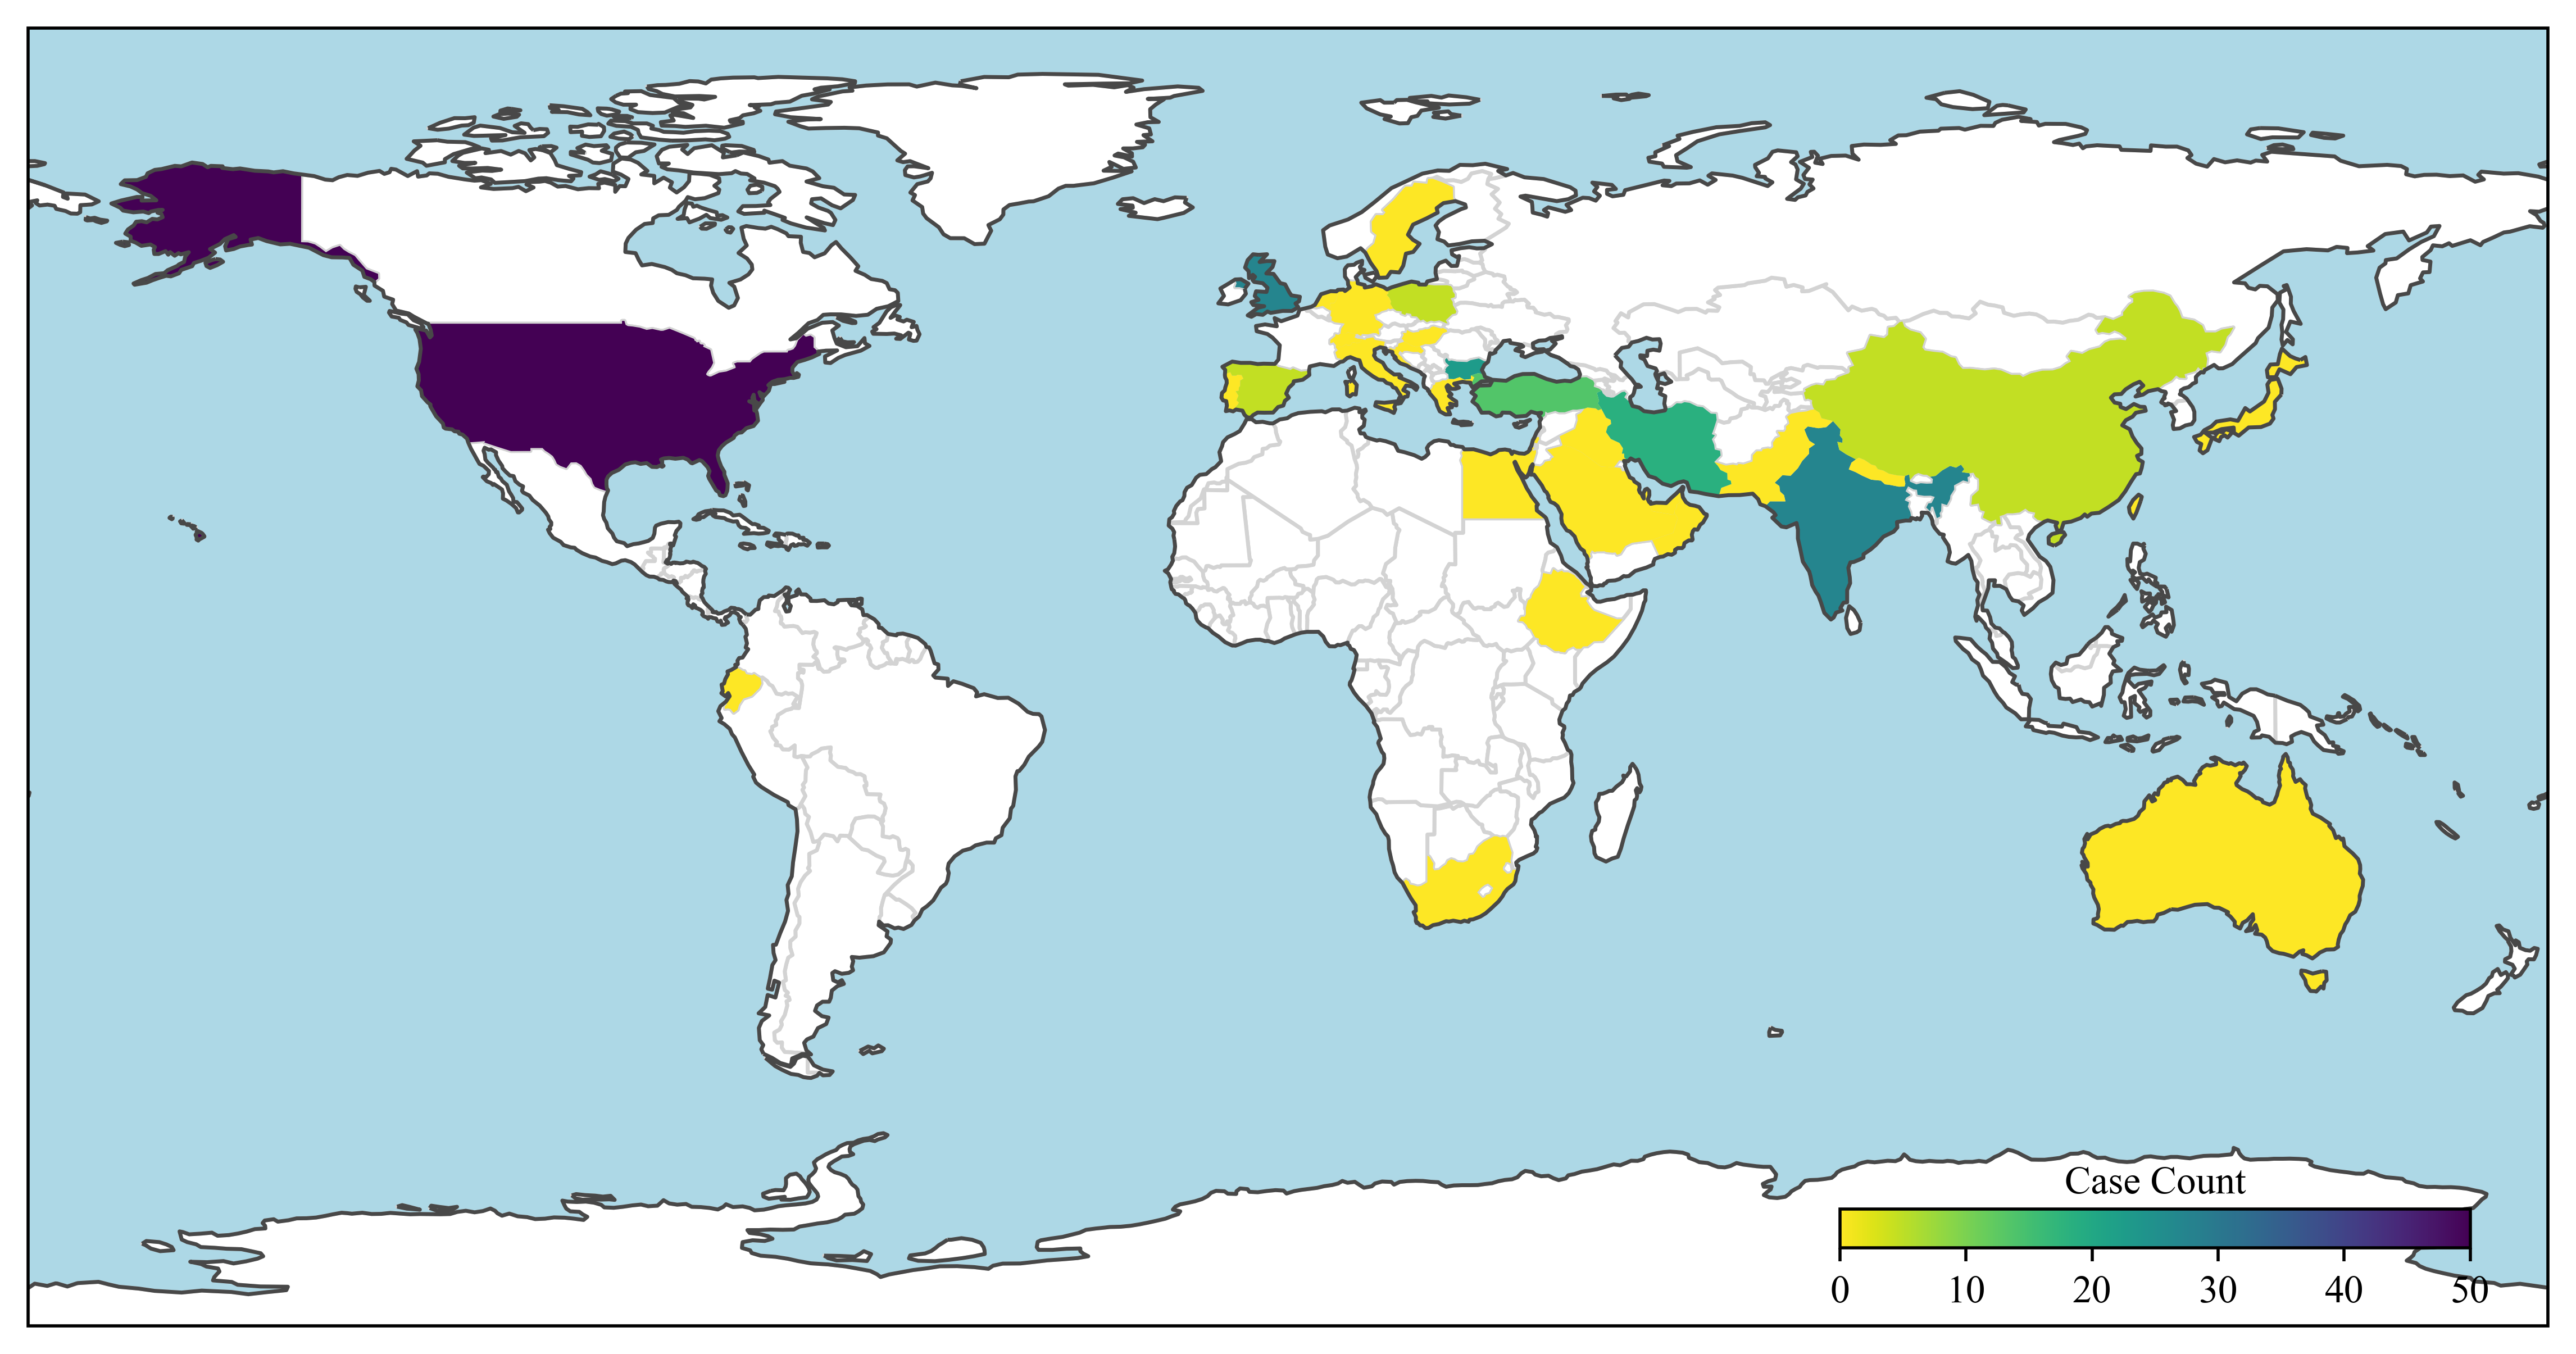

In [13177]:
case_report_geog_summary = (
    case_data
    .groupby('Study_Country')
    .agg(
        Case_Count=('Patient_ID', 'count'),
        Citekey=('Citekey', lambda x: ', '.join(sorted(set(x))))
    )
    .reset_index()
)

case_report_geog_summary.columns = ['Country', 'Case_Count', 'Citekey']
case_report_geog_summary['Source'] = 'Case Report'

case_report_geog_summary['Plot_Country'] = case_report_geog_summary['Country'].replace(
    {'USA': 'United States of America',
     'UK': 'United Kingdom',
     'Republic of Korea': 'South Korea',
     'Bahrain': 'United Arab Emirates'}
)

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cartopy.crs as ccrs

# Copy data
plot_data = case_report_geog_summary[['Plot_Country', 'Case_Count']].copy()

# load Natural Earth country boundaries
shpfilename = shpreader.natural_earth(
    resolution='110m',
    category='cultural',
    name='admin_0_countries'
)
world = gpd.read_file(shpfilename)

# merge case counts into the GeoDataFrame
merged = world.merge(
    plot_data,
    how='left',
    left_on='ADMIN',
    right_on='Plot_Country'
)

# Plot the map
fig, ax = plt.subplots(
    figsize=(12, 6),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

# Base map
world.plot(ax=ax, facecolor='white', edgecolor='lightgrey', transform=ccrs.PlateCarree())

# Choropleth
chor = merged.dropna(subset=['Case_Count']).plot(
    ax=ax,
    column='Case_Count',
    cmap='viridis_r',
    legend=False,
    transform=ccrs.PlateCarree()
)

# Add coastlines and sea colour
ax.coastlines(color="#484848")
ax.set_facecolor('#ADD8E6')  # light blue sea

# Black ticks and spines
ax.tick_params(colors='black')
for spine in ax.spines.values():
    spine.set_edgecolor('black')

# Manual colorbar inset at bottom-right, moved up slightly
cax = inset_axes(ax, width="25%", height="3%", loc='lower right', borderpad=2)

# Set normalization and color mapping
norm = plt.Normalize(vmin=0, vmax=50)
sm = mpl.cm.ScalarMappable(cmap='viridis_r', norm=norm)
sm._A = []

# Add the colorbar with black styling
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal', ticks=[0, 10, 20, 30, 40, 50])
cbar.ax.set_title('Case Count', fontsize=10, color='black', pad=4)

# Style the tick lines, labels, and spine
cbar.outline.set_edgecolor('black')
cbar.ax.tick_params(color='black', labelcolor='black')
for tick in cbar.ax.get_xticklines():
    tick.set_color('black')

map_plot_list = []

# Add to list
map_plot_list.append(("Case Reports", fig, plot_data))

# Save figure
plot_path = os.path.join(REPORT_FIGURES_DIR, 'case_report_country_plot.png')
plt.savefig(plot_path, bbox_inches='tight')
plt.show()

In [13178]:
len(case_data)
citekeys = ','.join(sorted(set(case_data['Citekey'].dropna())))
cite_block = rf"\cite{{{citekeys}}}"

In [13179]:
case_report_geog_summary.sort_values(by='Case_Count', ascending=False)

Country  Case_Count  \
32           USA          12   
11         India           7   
31            UK           7   
2       Bulgaria           6   
12          Iran           5   
30        Turkey           4   
21        Poland           2   
26         Spain           2   
3          China           2   
27        Sweden           1   
19          Oman           1   
25  South Africa           1   
28   Switzerland           1   
29        Taiwan           1   
24  Saudi Arabia           1   
23         Qatar           1   
22      Portugal           1   
20      Pakistan           1   
0      Australia           1   
18   Netherlands           1   
17         Nepal           1   
1        Bahrain           1   
15         Italy           1   
14        Israel           1   
13          Iraq           1   
10       Hungary           1   
9         Greece           1   
8        Germany           1   
7       Ethiopia           1   
6          Egypt           1   
5        Ecuador           1   
4        Croatia           1   
16         Japan           1   

                                              Citekey       Source  \
32  Alao_2006i, Ataya_2013, Bhumi_2024f, Fry_2010,...  Case Report   
11  Bhasin_2014, Bhattacharjee_2008, Kar_2015, Kar...  Case Report   
31  Beecroft_1998, Berry_2021e, Cauchi_2002, Cox_2...  Case Report   
2                       Losanoff_1996, Losanoff_1997e  Case Report   
12     DivsalarP._2023a, Emamhadi_2018, Farhadi_2024h  Case Report   
30  Akay_2015f, Atayan_2016, Tanrikulu_2015e, Yild...  Case Report   
21                           Kobiela_2015, Wnęk_2015f  Case Report   
26  CamachoDorado_2018, fjbuilsRepeatedBehaviorDel...  Case Report   
3                                   Jin_2023, Li_2013  Case Report   
27                                         Naji_2012f  Case Report   
19                                    AlShaaibi_2021b  Case Report   
25                                      Sobnach_2011f  Case Report   
28                                     Wildhaber_2005  Case Report   
29                                        Chang_2017f  Case Report   
24                                       Sultan_2024f  Case Report   
23                                           Ali_2017  Case Report   
22                                      Peixoto_2017f  Case Report   
20                                         Yasin_2009  Case Report   
0                                      Apikotoa_2022f  Case Report   
18                                      Benoist_2019e  Case Report   
17                                        Thapa_2019f  Case Report   
1                                           Ali_2020f  Case Report   
15                                         Riva_2018j  Case Report   
14                                      Goldman_1998f  Case Report   
13                                     Al-Faham_2020k  Case Report   
10                                        Csaky_1998e  Case Report   
9                                  Sakellaridis_2008f  Case Report   
8                                        teWildt_2010  Case Report   
7                                        Mesfin_2022a  Case Report   
6                                           Ali_2022g  Case Report   
5                                DelgadoSalazar_2020c  Case Report   
4                                          Trgo_2012f  Case Report   
16                                          Ohno_2005  Case Report   

                Plot_Country  
32  United States of America  
11                     India  
31            United Kingdom  
2                   Bulgaria  
12                      Iran  
30                    Turkey  
21                    Poland  
26                     Spain  
3                      China  
27                    Sweden  
19                      Oman  
25              South Africa  
28               Switzerland  
29                    Taiwan  
24              Saudi Arabia  
23                     Qatar  
22          

In [13180]:
def create_short_text_summary(
        df,
        count_col='Count',
        var_col=None,   # must be specified
        n=3          # number of top entries to include
):
    if var_col is None:
        raise ValueError("You must specify var_col.")

    # Optionally limit to top-n by count
    df_sorted = df.sort_values(by=count_col, ascending=False)
    if n is not None:
        df_sorted = df_sorted.head(n)

    # Generate LaTeX-formatted phrases
    lines = [
        rf"{var} (\emph{{n}} = {count})"
        for var, count in zip(df_sorted[var_col], df_sorted[count_col])
    ]

    # Join with commas and "and"
    if len(lines) == 0:
        return ''
    elif len(lines) == 1:
        return lines[0] + '.'
    elif len(lines) == 2:
        return ' and '.join(lines) + '.'
    else:
        return ', '.join(lines[:-1]) + ', and ' + lines[-1] + '.'


In [13181]:
case_geog_summary_text = create_short_text_summary(case_report_geog_summary,
                          var_col='Plot_Country',
                          count_col='Case_Count')

In [13182]:
case_report_geog_summary['Percent'] = case_report_geog_summary['Case_Count'] / case_report_geog_summary['Case_Count'].sum() * 100
case_report_geog_summary = case_report_geog_summary.sort_values(by='Percent', ascending=False)


In [13183]:
def calculate_median_iqr(series):
    """
    Calculate median and interquartile range (IQR) for a numeric column in a DataFrame.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        column (str): Name of the column to analyze.

    Returns:
        dict: Dictionary with median, q1, q3, and iqr.
    """
    series = series.dropna()

    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    median = series.median()
    iqr = q3 - q1

    return {
        'Median': median,
        'Q1': q1,
        'Q3': q3,
        'IQR': iqr
    }

In [13184]:
case_geog_count_summary = calculate_median_iqr(case_report_geog_summary['Case_Count'])
case_geog_count_summary

{'Median': np.float64(1.0),
 'Q1': np.float64(1.0),
 'Q3': np.float64(2.0),
 'IQR': np.float64(1.0)}

In [13185]:
case_summary

Group                    Label   Count  \
Age_Max                            Age                      Max  100.00   
Age_Mean                           Age                     Mean   30.55   
Age_Median                         Age                   Median   28.00   
Age_IQR                            Age                      IQR   18.00   
Age_Min                            Age                      Min    7.00   
Gender_Male                     Gender                     Male   43.00   
Gender_Female                   Gender                   Female   27.00   
Gender_Unknown                  Gender                  Unknown    1.00   
Psych_Hx                   Demographic      Psychiatric History   36.00   
Previous_Ingestions        Demographic          Prior Ingestion   19.00   
Is_Prisoner                Demographic                 Detained   12.00   
Severe_Disability_Hx       Demographic        Severe Disability    7.00   
Is_Psych_Inpat             Demographic    Psychiatric Inpatient    4.00   
Under_Influence_Alcohol    Demographic                  Alcohol    3.00   
Is_Displaced_Person        Demographic         Displaced Person    2.00   
Motivation_Psychiatric      Motivation              Psychiatric   34.00   
Motivation_Intent_To_Harm   Motivation           Intent-to-Harm   21.00   
Motivation_Psychosocial     Motivation             Psychosocial   16.00   
Motivation_Other            Motivation                    Other    9.00   
Motivation_Protest          Motivation                  Protest    8.00   
Object_Diameter_Large           Object  Large (>2.5cm) Diameter   51.00   
Object_Multiple                 Object                 Multiple   44.00   
Object_Sharp                    Object                    Sharp   34.00   
Object_Long                     Object              Long (>5cm)   32.00   
Object_Magnet                   Object                   Magnet    9.00   
Object_Button_Battery           Object           Button Battery    2.00   
Outcome_Complication           Outcome             Complication   47.00   
Outcome_Surgery                Outcome                  Surgery   43.00   
Outcome_Endoscopy              Outcome                Endoscopy   31.00   
Outcome_Conservative           Outcome             Conservative    7.00   
Outcome_Death                  Outcome                    Death    2.00   
Case_Count                         NaN               Case_Count   71.00   

                          Percent                             Tex_Label  \
Age_Max                      None                                   Max   
Age_Mean                     None                                  Mean   
Age_Median                   None                                Median   
Age_IQR                      None                                   IQR   
Age_Min                      None                                   Min   
Gender_Male                  60.6                                  Male   
Gender_Female                38.0                                Female   
Gender_Unknown                1.4                               Unknown   
Psych_Hx                     50.7                   Psychiatric History   
Previous_Ingestions          26.8                       Prior Ingestion   
Is_Prisoner                  16.9                              Detained   
Severe_Disability_Hx          9.9                     Severe Disability   
Is_Psych_Inpat                5.6                 Psychiatric Inpatient   
Under_Influence_Alcohol       4.2                               Alcohol   
Is_Displaced_Person           2.8                      Displaced Person   
Motivation_Psychiatric       47.9                           Psychiatric   
Motivation_Intent_To_Harm    29.6                        Intent-to-Harm   
Motivation_Psychosocial      22.5                          Psychosocial   
Motivation_Other             12.7                                 Other   
Motivation_Protest           11.3                        

In [ ]:
section_path = os.path.join(SECTIONS_DIR, 'study_characteristics.tex')

case_report_description = f"""\\subsubsection{{Case Reports}}

A total of {len(case_data)} cases were reported {case_data['Study_Country'].nunique()} countries {cite_block}. 

The top three countries represented were the United States of America (\\emph{{n}} = 12), India (\\emph{{n}} = 7), and the United Kingdom (\\emph{{n}} = 7). The median number of case reports per country was {case_geog_count_summary['Median']} (IQR = {case_geog_count_summary['IQR']}[range {case_report_geog_summary['Case_Count'].min()}-{case_report_geog_summary['Case_Count'].max()}]

Cases were present from a wide age range (7 to 100 years) with a median age of 28 year [IQR = 18]. 

The majority of cases were reported in males (60\% vs 39\%), with 1 case of unknown gender. 

Half of cases had a psychiatric history and over a quarter (26\%) had ingested previously. 17\% were detained, 6\% were psychiatric inpatients, 10\% had a severe disability and 3\% (\emph{{n}} = 2) were displaced persons.

Psychiatric motivation was reported in nearly half of cases (48\%), with intent-to-harm and psychosocial reported in 29\% and 23\% of cases respectively. Protest was reported in 11\% of cases and other in 12\%.

Most ingestions involved large (\\textgreater{{}} 2.5cm) diameter (72\%), sharp (62\%) objects and multiple object ingestion (62\%). Almost 50\% of cases (48\%) involved sharp and sharp (45\%) object ingestion. Fewer ingestions involved magnets (12\%) and button batteries (2\%)

Complication rates were high (66\%), as were rates of endoscopy and surgery (61\% and 44\% respectively). Cases were only managed conservatively 10\% of the time. The mortality rate in case reports was 2.8\%. 

A table of case-level characteristics is shown in Table~\ref{{tab:case_summary}}
"""

with open(section_path, 'w') as f:
    f.write(case_report_description)

print(case_report_description)

\subsubsection{Case Reports}

A total of 71 cases were reported 33 countries \cite{Akay_2015f,Al-Faham_2020k,AlShaaibi_2021b,Alao_2006i,Ali_2017,Ali_2020f,Ali_2022g,Apikotoa_2022f,Ataya_2013,Atayan_2016,Beecroft_1998,Benoist_2019e,Berry_2021e,Bhasin_2014,Bhattacharjee_2008,Bhumi_2024f,CamachoDorado_2018,Cauchi_2002,Chang_2017f,Cox_2007,Csaky_1998e,DelgadoSalazar_2020c,DivsalarP._2023a,Emamhadi_2018,Farhadi_2024h,Fry_2010,Gardner_2017h,Goldman_1998f,Guinan_2019f,Hardy_2023g,Jehangir_2019h,Jin_2023,Kar_2015,Kariholu_2008,Kerestes_2019,Kobiela_2015,Kumar_2001,Kumar_2019f,Li_2013,Liu_2005,Losanoff_1996,Losanoff_1997e,Mesfin_2022a,Misra_2013,Naji_2012f,Ohno_2005,Peixoto_2017f,Qureshi_2016,Riva_2018j,Sakellaridis_2008f,Sobnach_2011f,Sultan_2024f,Tammana_2012j,Tanrikulu_2015e,Tay_2004,Thapa_2019f,Trgo_2012f,Wadhwa_2015e,Wildhaber_2005,Wnęk_2015f,Yasin_2009,Yildiz_2016e,fjbuilsRepeatedBehaviorDeliberate2024,teWildt_2010}. 

The top three countries represented were the United States of America 

<>:23: SyntaxWarning: invalid escape sequence '\%'
<>:23: SyntaxWarning: invalid escape sequence '\%'
<>:23: SyntaxWarning: invalid escape sequence '\%'
<>:23: SyntaxWarning: invalid escape sequence '\%'
<>:23: SyntaxWarning: invalid escape sequence '\%'
<>:23: SyntaxWarning: invalid escape sequence '\%'
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_4667/2546345733.py:23: SyntaxWarning: invalid escape sequence '\%'
  """
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_4667/2546345733.py:23: SyntaxWarning: invalid escape sequence '\%'
  """
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_4667/2546345733.py:23: SyntaxWarning: invalid escape sequence '\%'
  """


#### Case Series

In [13187]:
series_data = included_series_data.copy()

citekeys = sorted(set(series_data['Citekey']))
citekey_block = '\\cite{' + ', '.join(citekeys) + '}' if citekeys else ''

In [13188]:
def remove_rates_and_rename_cases(df):
    # Drop columns ending with '_Rates'
    df = df.drop(columns=[col for col in df.columns if col.endswith('_Rate')])

    # Rename columns ending with '_Cases' by removing the suffix
    df = df.rename(columns={
        col: col.replace('_Cases', '') for col in df.columns if col.endswith('_Cases')
    })

    return df    

series_data = remove_rates_and_rename_cases(series_data)

In [13189]:
series_data.columns

Index(['Study_ID', 'Comments', 'Patient_Count', 'Case_Count', 'Age_Low',
       'Age_High', 'Age_Mean', 'Age_Median', 'Verified_Ingestion',
       'Gender_Male', 'Gender_Female', 'Gender_Unknown', 'Is_Intentional',
       'Is_Prisoner', 'Is_Psych_Inpat', 'Is_Displaced_Person',
       'Under_Influence_Alcohol', 'Psych_Hx', 'Severe_Disability_Hx',
       'Previous_Ingestions', 'Motivation_Intent_To_Harm',
       'Motivation_Protest', 'Motivation_Psychiatric',
       'Motivation_Psychosocial', 'Motivation_Unknown', 'Motivation_Other',
       'Motivation_Other_Psych_Hx', 'Motivation_Other_Severe_Disability_Hx',
       'Object_Count', 'Object_Button_Battery', 'Object_Magnet', 'Object_Long',
       'Object_Diameter_Large', 'Object_Sharp', 'Object_Multiple',
       'Object_Long_Sharp', 'Object_Short', 'Object_Short_Sharp',
       'Outcome_Endoscopy', 'Outcome_Surgery', 'Outcome_Death',
       'Outcome_Injury_Needing_Intervention', 'Outcome_Perforation',
       'Outcome_Obstruction', 'Outcome_

In [13190]:
series_data = series_data.rename(columns={
    'Age_Low': 'Age_Min',
    'Age_High': 'Age_Max'
})

In [13191]:
predictor_vars = [
    var
    for group in case_col_map['Predictors'].values()
    for var in group.keys()
]

outcome_vars = list(case_col_map['Outcomes'].keys())

all_vars = predictor_vars + outcome_vars

# Create all_case_vars as a copy of all_vars
all_case_vars = all_vars.copy()

# Create all_series_vars by excluding specific variables
exclude_vars = ['Age_Yrs', 'Age_IQR']

all_series_vars = [var for var in all_vars if var not in exclude_vars]

all_series_vars.append('Case_Count')
all_series_vars.append('Study_Country')

In [13192]:
def weighted_mean(values: pd.Series, weights: pd.Series) -> float:
    """Compute the weighted mean of values with weights."""
    values = pd.to_numeric(values, errors='coerce')
    weights = pd.to_numeric(weights, errors='coerce')
    valid = values.notna() & weights.notna()

    if valid.sum() == 0:
        return float('nan')

    return (values[valid] * weights[valid]).sum() / weights[valid].sum()

def weighted_median(values: pd.Series, weights: pd.Series) -> float:
    """Compute the weighted median of a pandas Series with weights."""
    values = pd.to_numeric(values, errors='coerce')
    weights = pd.to_numeric(weights, errors='coerce')
    valid = values.notna() & weights.notna()

    if valid.sum() == 0:
        return float('nan')

    sorted_data = pd.DataFrame({'values': values[valid], 'weights': weights[valid]}).sort_values('values')
    cum_weights = sorted_data['weights'].cumsum()
    cutoff = sorted_data['weights'].sum() / 2.0
    return sorted_data.loc[cum_weights >= cutoff, 'values'].iloc[0]

In [13193]:
# Start with an empty dictionary
series_total_row = {'Comments': 'Cases Series'}

# Calculate weighted statistics
weighted_series_age_mean = weighted_mean(series_data['Age_Mean'], series_data[weight_col])
weighted_series_age_median = weighted_median(series_data['Age_Median'], series_data[weight_col])

# Start with a sum of all numeric columns
series_total_row = series_data.select_dtypes(include='number').sum().to_dict()

# Overwrite Age_Mean and Age_Median with weighted values
series_total_row['Age_Mean'] = weighted_mean(series_data['Age_Mean'], series_data[weight_col])
series_total_row['Age_Median'] = weighted_median(series_data['Age_Median'], series_data[weight_col])
series_total_row['Age_Min'] = series_data['Age_Min'].min()
series_total_row['Age_Max'] = series_data['Age_Max'].max()

# Add label
series_total_row['Comments'] = 'Series Only Totals'

series_total_row['Study_ID'] = 'Case_Series'

# Append to DataFrame
series_data = pd.concat([series_data, pd.DataFrame([series_total_row])], ignore_index=True)

In [13194]:
# Create list of all_studies
series_ids = series_data['Study_ID'].unique().tolist()

# Melt series data for display
series_data_melted = series_data.melt(
    id_vars=['Study_ID'],
    value_vars=all_series_vars,
    var_name='Variable',
    value_name='Value'
)

# Pivot
series_data_pivot = series_data_melted.pivot(
    index=['Variable'],
    columns='Study_ID',
    values='Value'
)

# Reindex rows to all variables
series_data_pivot = series_data_pivot.reindex(all_series_vars)
series_data_pivot


Study_ID                    523                581      646 Case_Series
Variable                                                               
Gender_Male                19.0               52.0     19.0        90.0
Gender_Female               0.0                0.0      0.0         0.0
Gender_Unknown              0.0                0.0      0.0         0.0
Age_Min                    17.0               25.0     19.0        17.0
Age_Max                    40.0               50.0     27.0        50.0
Age_Median                  NaN               35.0      NaN        35.0
Age_Mean                   24.0                NaN     24.0        24.0
Is_Prisoner                19.0               52.0     19.0        90.0
Is_Psych_Inpat              0.0                0.0      0.0         0.0
Is_Displaced_Person         NaN                NaN      NaN         0.0
Under_Influence_Alcohol     NaN                NaN      NaN         0.0
Psych_Hx                   18.0              9.464    2.375      29.839
Severe_Disability_Hx        NaN                0.0      NaN         0.0
Previous_Ingestions         NaN                NaN      2.0         2.0
Motivation_Protest          3.0              50.44     17.0       70.44
Motivation_Psychiatric     12.0                0.0      0.0        12.0
Motivation_Psychosocial     0.0                0.0      0.0         0.0
Motivation_Intent_To_Harm   4.0                0.0      2.0         6.0
Motivation_Other            0.0                0.0      0.0         0.0
Object_Sharp               19.0               33.0     16.0        68.0
Object_Long                 NaN              32.01      0.0       32.01
Object_Multiple             NaN               24.0      1.0        25.0
Object_Button_Battery       NaN                0.0      0.0         0.0
Object_Magnet               NaN                0.0      0.0         0.0
Object_Diameter_Large       NaN                NaN      NaN         0.0
Outcome_Endoscopy           NaN               46.0      1.0        47.0
Outcome_Death               0.0                0.0      1.0         1.0
Outcome_Surgery             5.0                6.0      4.0        15.0
Outcome_Complication        NaN                6.0      NaN         6.0
Outcome_Conservative       14.0                0.0     15.0        29.0
Case_Count                 19.0               52.0     19.0        90.0
Study_Country               USA  Republic of Korea  Tunisia         NaN

In [13195]:
# Create count columns
series_data_pivot.columns = [f"{col}_Count" for col in series_data_pivot.columns]

In [13196]:
# Build variable → group mapping from case_col_map
var_to_group = {}
for group_name, variables in case_col_map['Predictors'].items():
    for var in variables:
        var_to_group[var] = group_name
for var in case_col_map['Outcomes']:
    var_to_group[var] = 'Outcome'

# Add a 'Group' column based on the index (which is Variable)
series_data_pivot['Group'] = series_data_pivot.index.map(var_to_group)

In [13197]:
series_data_pivot

523_Count          581_Count 646_Count  \
Variable                                                           
Gender_Male                    19.0               52.0      19.0   
Gender_Female                   0.0                0.0       0.0   
Gender_Unknown                  0.0                0.0       0.0   
Age_Min                        17.0               25.0      19.0   
Age_Max                        40.0               50.0      27.0   
Age_Median                      NaN               35.0       NaN   
Age_Mean                       24.0                NaN      24.0   
Is_Prisoner                    19.0               52.0      19.0   
Is_Psych_Inpat                  0.0                0.0       0.0   
Is_Displaced_Person             NaN                NaN       NaN   
Under_Influence_Alcohol         NaN                NaN       NaN   
Psych_Hx                       18.0              9.464     2.375   
Severe_Disability_Hx            NaN                0.0       NaN   
Previous_Ingestions             NaN                NaN       2.0   
Motivation_Protest              3.0              50.44      17.0   
Motivation_Psychiatric         12.0                0.0       0.0   
Motivation_Psychosocial         0.0                0.0       0.0   
Motivation_Intent_To_Harm       4.0                0.0       2.0   
Motivation_Other                0.0                0.0       0.0   
Object_Sharp                   19.0               33.0      16.0   
Object_Long                     NaN              32.01       0.0   
Object_Multiple                 NaN               24.0       1.0   
Object_Button_Battery           NaN                0.0       0.0   
Object_Magnet                   NaN                0.0       0.0   
Object_Diameter_Large           NaN                NaN       NaN   
Outcome_Endoscopy               NaN               46.0       1.0   
Outcome_Death                   0.0                0.0       1.0   
Outcome_Surgery                 5.0                6.0       4.0   
Outcome_Complication            NaN                6.0       NaN   
Outcome_Conservative           14.0                0.0      15.0   
Case_Count                     19.0               52.0      19.0   
Study_Country                   USA  Republic of Korea   Tunisia   

                          Case_Series_Count        Group  
Variable                                                  
Gender_Male                            90.0       Gender  
Gender_Female                           0.0       Gender  
Gender_Unknown                          0.0       Gender  
Age_Min                                17.0          Age  
Age_Max                                50.0          Age  
Age_Median                             35.0          Age  
Age_Mean                               24.0          Age  
Is_Prisoner                            90.0  Demographic  
Is_Psych_Inpat                          0.0  Demographic  
Is_Displaced_Person                     0.0  Demographic  
Under_Influence_Alcohol                 0.0  Demographic  
Psych_Hx                             29.839  Demographic  
Severe_Disability_Hx                    0.0  Demographic  
Previous_Ingestions                     2.0  Demographic  
Motivation_Protest                    70.44   Motivation  
Motivation_Psychiatric                 12.0   Motivation  
Motivation_Psychosocial                 0.0   Motivation  
Motivation_Intent_To_Harm               6.0   Motivation  
Motivation_Other                        0.0   Motivation  
Object_Sharp                           68.0       Object  
Object_Long                           32.01       Object  
Object_Multiple                        25.0       Object  
Object_Button_Battery                   0.0       Object  
Object_Magnet                           0.0       Object  
Object_Diameter_Large                   0.0       Object  
Outcome_Endoscopy                      47.0      Outcome  
Outcome_Death                           1.0      Outcome  
Ou

In [13198]:
def create_percentage_column(df, col, group):
    df = df.copy()

    # Filter rows belonging to the desired group
    group_df = df[df['Group'] == group]

    # Get denominator (sum of the column within this group)
    denominator = group_df[col].sum()

    # Avoid division by zero
    if denominator == 0:
        return df

    # Compute percentages only for rows in the group
    for idx in group_df.index:
        count = df.at[idx, col]
        percent = (count / denominator) * 100 if pd.notna(count) else None
        percentage_col = col.replace('_Count', '_Percentage')
        df.at[idx, percentage_col] = percent

    return df

# Copy base DataFrame
updated_df = series_data_pivot.copy()

# Identify count columns (one per study)
desired_cols = [col for col in updated_df.columns if col.endswith('_Count')]

# Define which groups to calculate percentages for
desired_groups = ['Gender', 'Demographic', 'Motivation', 'Object', 'Outcome']

# Apply
for group in desired_groups:
    for col in desired_cols:
        updated_df = create_percentage_column(updated_df, col, group)

# View result
series_data_pivot = updated_df.copy()

In [13199]:
# --- Setup ---
study_ids = ['523', '581', '646']
count_cols = [f'{sid}_Count' for sid in study_ids]
percent_cols = [f'{sid}_Percentage' for sid in study_ids]
weighted_cols = [f'{sid}_Weighted' for sid in study_ids]

# Sanity check
if 'Case_Count' not in series_data_pivot.index:
    raise ValueError("Missing 'Case_Count' row.")

# Get case counts
case_counts = series_data_pivot.loc['Case_Count', count_cols].astype(float)
total_case_count = case_counts.sum()
series_total = series_data_pivot.loc['Case_Count', 'Case_Series_Count']

# Rows to compute (exclude metadata rows)
compute_mask = ~series_data_pivot.index.isin(['Case_Count', 'Study_Country', 'Age_Min', 'Age_Max', 'Age_Median', 'Age_Mean', 'Age_IQR'])

# --- Loop through each study ---
for sid in study_ids:
    count_col = f'{sid}_Count'
    percent_col = f'{sid}_Percentage'
    weighted_col = f'{sid}_Weighted'
    study_total = case_counts[count_col]

    if pd.isna(study_total) or study_total == 0:
        continue

    # For all non-metadata rows
    series_data_pivot.loc[compute_mask, percent_col] = (
        series_data_pivot.loc[compute_mask, count_col].astype(float) / study_total * 100
    ).round(1)

    series_data_pivot.loc[compute_mask, weighted_col] = (
        series_data_pivot.loc[compute_mask, count_col].astype(float) / total_case_count * 100
    ).round(1)

    # Set Case_Count row
    series_data_pivot.loc['Case_Count', percent_col] = round(study_total / total_case_count * 100, 1)
    series_data_pivot.loc['Case_Count', weighted_col] = round(study_total / total_case_count * 100, 1)

# --- Case_Series_Percentage fix ---
if 'Case_Series_Count' in series_data_pivot.columns:
    series_case_total = series_data_pivot.loc['Case_Count', 'Case_Series_Count']
    if not pd.isna(series_case_total) and series_case_total != 0:
        series_data_pivot.loc[compute_mask, 'Case_Series_Percentage'] = (
            series_data_pivot.loc[compute_mask, 'Case_Series_Count'].astype(float) / series_case_total * 100
        ).round(1)

        # And the Case_Count row should just be 100%
        series_data_pivot.loc['Case_Count', 'Case_Series_Percentage'] = 100.0

series_data_pivot

523_Count          581_Count 646_Count  \
Variable                                                           
Gender_Male                    19.0               52.0      19.0   
Gender_Female                   0.0                0.0       0.0   
Gender_Unknown                  0.0                0.0       0.0   
Age_Min                        17.0               25.0      19.0   
Age_Max                        40.0               50.0      27.0   
Age_Median                      NaN               35.0       NaN   
Age_Mean                       24.0                NaN      24.0   
Is_Prisoner                    19.0               52.0      19.0   
Is_Psych_Inpat                  0.0                0.0       0.0   
Is_Displaced_Person             NaN                NaN       NaN   
Under_Influence_Alcohol         NaN                NaN       NaN   
Psych_Hx                       18.0              9.464     2.375   
Severe_Disability_Hx            NaN                0.0       NaN   
Previous_Ingestions             NaN                NaN       2.0   
Motivation_Protest              3.0              50.44      17.0   
Motivation_Psychiatric         12.0                0.0       0.0   
Motivation_Psychosocial         0.0                0.0       0.0   
Motivation_Intent_To_Harm       4.0                0.0       2.0   
Motivation_Other                0.0                0.0       0.0   
Object_Sharp                   19.0               33.0      16.0   
Object_Long                     NaN              32.01       0.0   
Object_Multiple                 NaN               24.0       1.0   
Object_Button_Battery           NaN                0.0       0.0   
Object_Magnet                   NaN                0.0       0.0   
Object_Diameter_Large           NaN                NaN       NaN   
Outcome_Endoscopy               NaN               46.0       1.0   
Outcome_Death                   0.0                0.0       1.0   
Outcome_Surgery                 5.0                6.0       4.0   
Outcome_Complication            NaN                6.0       NaN   
Outcome_Conservative           14.0                0.0      15.0   
Case_Count                     19.0               52.0      19.0   
Study_Country                   USA  Republic of Korea   Tunisia   

                          Case_Series_Count        Group  523_Percentage  \
Variable                                                                   
Gender_Male                            90.0       Gender           100.0   
Gender_Female                           0.0       Gender             0.0   
Gender_Unknown                          0.0       Gender             0.0   
Age_Min                                17.0          Age             NaN   
Age_Max                                50.0          Age             NaN   
Age_Median                             35.0          Age             NaN   
Age_Mean                               24.0          Age             NaN   
Is_Prisoner                            90.0  Demographic           100.0   
Is_Psych_Inpat                          0.0  Demographic             0.0   
Is_Displaced_Person                     0.0  Demographic             NaN   
Under_Influence_Alcohol                 0.0  Demographic             NaN   
Psych_Hx                             29.839  Demographic            94.7   
Severe_Disability_Hx                    0.0  Demographic             NaN   
Previous_Ingestions                     2.0  Demographic             NaN   
Motivation_Protest                    70.44   Motivation            15.8   
Motivation_Psychiatric                 12.0   Motivation            63.2   
Motivation_Psychosocial                 0.0   Motivation             0.0   
Motivation_Intent_To_Harm               6.0   Motivation            21.1   
Motivation_Other                        0.0   Motivation             0.0   
Object_Sharp                           68.0       Object           100.0   
Object_Long                           32.

In [13200]:
series_data[['Study_ID', 'Citekey']]

Study_ID       Citekey
0          523    Karp_1991b
1          581      Lee_2007
2          646  Elghali_2016
3  Case_Series           NaN

In [13201]:
series_data_summary_text = f"""\\subsubsection{{Case Series}}

{len(series_data)} studies were case series, yielding {series_data['Case_Count'].sum():.0f} cases {citekey_block}. Case series were present from the United States of America \\cite{{Karp_1991b}}, South Korea \\cite{{Lee_2007}} and Tunisia \\cite{{Elghali_2016}}.

Values reported herein are mean averages across all case series. Unreported variables are treated as 0.

All cases were male, aged 17--50 years and detained 33\% had a psychiatric history (range 82-95\%) - no psychiatric inpatients. 

Demographic predictors were poorly recorded. Previous ingestion rates were only reported in one series at 11\%. There was no severe disability (not reporting in two series). Data on displaced person and alcohol influence were not reported at all.

Motivations were predominantly protest (78\%, range 16-97\%); psychiatric in 13\% (63.2\% in one series, 0\% in the other two); intent-to-harm in 7\% (range 0-21\%). There were no reports of other motivation or psychosocial motivation. 

One series only report sharp object ingestion and no other object characteristics \\cite{{Karp_1991b}}. In the other two series, overall ingestion involed a sharp object in most cases (76\%, range 64-100\%). Long objects were ingested 37\% of cases (36%, 0-67\%), multiple objects were ingested in (27.8\%, range 0-67\%)

In terms of outcomes, complications were only reported in one series \\cite{{Lee_2007}}, data was absent from the other two. Endoscopy occuring in 52\% (range 5-89\%), although it was unreported in one series \\cite{{Karp_1991b}}. Surgery occured following 17\% of ingestions (range 12-26\%), conservative management following 32\% (0\% in one case and above 70\% in the other two).

A full list of grouped series-level characteristics and outcomes is available in Table~\\ref{{tab:series_results}}.
"""

output_path = os.path.join(SECTIONS_DIR, 'study_characteristics.tex')
with open(output_path, 'a') as f:
    f.write(series_data_summary_text)


<>:18: SyntaxWarning: invalid escape sequence '\%'
<>:18: SyntaxWarning: invalid escape sequence '\%'
<>:18: SyntaxWarning: invalid escape sequence '\%'
<>:18: SyntaxWarning: invalid escape sequence '\%'
<>:18: SyntaxWarning: invalid escape sequence '\%'
<>:18: SyntaxWarning: invalid escape sequence '\%'
<>:18: SyntaxWarning: invalid escape sequence '\%'
<>:18: SyntaxWarning: invalid escape sequence '\%'
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_4667/4086167745.py:18: SyntaxWarning: invalid escape sequence '\%'
  """
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_4667/4086167745.py:18: SyntaxWarning: invalid escape sequence '\%'
  """
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_4667/4086167745.py:18: SyntaxWarning: invalid escape sequence '\%'
  """
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_4667/4086167745.py:18: SyntaxWarning: invalid escape sequence '\%'
  """


In [13202]:
series_data_pivot

523_Count          581_Count 646_Count  \
Variable                                                           
Gender_Male                    19.0               52.0      19.0   
Gender_Female                   0.0                0.0       0.0   
Gender_Unknown                  0.0                0.0       0.0   
Age_Min                        17.0               25.0      19.0   
Age_Max                        40.0               50.0      27.0   
Age_Median                      NaN               35.0       NaN   
Age_Mean                       24.0                NaN      24.0   
Is_Prisoner                    19.0               52.0      19.0   
Is_Psych_Inpat                  0.0                0.0       0.0   
Is_Displaced_Person             NaN                NaN       NaN   
Under_Influence_Alcohol         NaN                NaN       NaN   
Psych_Hx                       18.0              9.464     2.375   
Severe_Disability_Hx            NaN                0.0       NaN   
Previous_Ingestions             NaN                NaN       2.0   
Motivation_Protest              3.0              50.44      17.0   
Motivation_Psychiatric         12.0                0.0       0.0   
Motivation_Psychosocial         0.0                0.0       0.0   
Motivation_Intent_To_Harm       4.0                0.0       2.0   
Motivation_Other                0.0                0.0       0.0   
Object_Sharp                   19.0               33.0      16.0   
Object_Long                     NaN              32.01       0.0   
Object_Multiple                 NaN               24.0       1.0   
Object_Button_Battery           NaN                0.0       0.0   
Object_Magnet                   NaN                0.0       0.0   
Object_Diameter_Large           NaN                NaN       NaN   
Outcome_Endoscopy               NaN               46.0       1.0   
Outcome_Death                   0.0                0.0       1.0   
Outcome_Surgery                 5.0                6.0       4.0   
Outcome_Complication            NaN                6.0       NaN   
Outcome_Conservative           14.0                0.0      15.0   
Case_Count                     19.0               52.0      19.0   
Study_Country                   USA  Republic of Korea   Tunisia   

                          Case_Series_Count        Group  523_Percentage  \
Variable                                                                   
Gender_Male                            90.0       Gender           100.0   
Gender_Female                           0.0       Gender             0.0   
Gender_Unknown                          0.0       Gender             0.0   
Age_Min                                17.0          Age             NaN   
Age_Max                                50.0          Age             NaN   
Age_Median                             35.0          Age             NaN   
Age_Mean                               24.0          Age             NaN   
Is_Prisoner                            90.0  Demographic           100.0   
Is_Psych_Inpat                          0.0  Demographic             0.0   
Is_Displaced_Person                     0.0  Demographic             NaN   
Under_Influence_Alcohol                 0.0  Demographic             NaN   
Psych_Hx                             29.839  Demographic            94.7   
Severe_Disability_Hx                    0.0  Demographic             NaN   
Previous_Ingestions                     2.0  Demographic             NaN   
Motivation_Protest                    70.44   Motivation            15.8   
Motivation_Psychiatric                 12.0   Motivation            63.2   
Motivation_Psychosocial                 0.0   Motivation             0.0   
Motivation_Intent_To_Harm               6.0   Motivation            21.1   
Motivation_Other                        0.0   Motivation             0.0   
Object_Sharp                           68.0       Object           100.0   
Object_Long                           32.

In [13203]:
def format_authors(authors):
    if isinstance(authors, str) and ';' in authors:
        first_author = authors.split(';')[0].split(',')[0].strip()
        return f"{first_author} \\textit{{et al.}}"
    elif isinstance(authors, str):
        # Just one author
        return authors.split(',')[0].strip()
    else:
        return ""

series_data['Author_Tex'] = series_data['Authors'].apply(format_authors)

series_data['Author_Year_Tex'] = series_data.apply(
    lambda row: f"{row['Author_Tex']} ({row['Publication_Year']}) \\cite{{{row['Citekey']}}}", axis=1
)

series_data_pivot.columns = [
    'Pooled' if col == 'Case_Series' else col
    for col in series_data_pivot.columns
]

In [13204]:
series_data_pivot

523_Count          581_Count 646_Count  \
Variable                                                           
Gender_Male                    19.0               52.0      19.0   
Gender_Female                   0.0                0.0       0.0   
Gender_Unknown                  0.0                0.0       0.0   
Age_Min                        17.0               25.0      19.0   
Age_Max                        40.0               50.0      27.0   
Age_Median                      NaN               35.0       NaN   
Age_Mean                       24.0                NaN      24.0   
Is_Prisoner                    19.0               52.0      19.0   
Is_Psych_Inpat                  0.0                0.0       0.0   
Is_Displaced_Person             NaN                NaN       NaN   
Under_Influence_Alcohol         NaN                NaN       NaN   
Psych_Hx                       18.0              9.464     2.375   
Severe_Disability_Hx            NaN                0.0       NaN   
Previous_Ingestions             NaN                NaN       2.0   
Motivation_Protest              3.0              50.44      17.0   
Motivation_Psychiatric         12.0                0.0       0.0   
Motivation_Psychosocial         0.0                0.0       0.0   
Motivation_Intent_To_Harm       4.0                0.0       2.0   
Motivation_Other                0.0                0.0       0.0   
Object_Sharp                   19.0               33.0      16.0   
Object_Long                     NaN              32.01       0.0   
Object_Multiple                 NaN               24.0       1.0   
Object_Button_Battery           NaN                0.0       0.0   
Object_Magnet                   NaN                0.0       0.0   
Object_Diameter_Large           NaN                NaN       NaN   
Outcome_Endoscopy               NaN               46.0       1.0   
Outcome_Death                   0.0                0.0       1.0   
Outcome_Surgery                 5.0                6.0       4.0   
Outcome_Complication            NaN                6.0       NaN   
Outcome_Conservative           14.0                0.0      15.0   
Case_Count                     19.0               52.0      19.0   
Study_Country                   USA  Republic of Korea   Tunisia   

                          Case_Series_Count        Group  523_Percentage  \
Variable                                                                   
Gender_Male                            90.0       Gender           100.0   
Gender_Female                           0.0       Gender             0.0   
Gender_Unknown                          0.0       Gender             0.0   
Age_Min                                17.0          Age             NaN   
Age_Max                                50.0          Age             NaN   
Age_Median                             35.0          Age             NaN   
Age_Mean                               24.0          Age             NaN   
Is_Prisoner                            90.0  Demographic           100.0   
Is_Psych_Inpat                          0.0  Demographic             0.0   
Is_Displaced_Person                     0.0  Demographic             NaN   
Under_Influence_Alcohol                 0.0  Demographic             NaN   
Psych_Hx                             29.839  Demographic            94.7   
Severe_Disability_Hx                    0.0  Demographic             NaN   
Previous_Ingestions                     2.0  Demographic             NaN   
Motivation_Protest                    70.44   Motivation            15.8   
Motivation_Psychiatric                 12.0   Motivation            63.2   
Motivation_Psychosocial                 0.0   Motivation             0.0   
Motivation_Intent_To_Harm               6.0   Motivation            21.1   
Motivation_Other                        0.0   Motivation             0.0   
Object_Sharp                           68.0       Object           100.0   
Object_Long                           32.

In [13205]:
study_id_map = {
    'Case_Series': 'Pooled',
    '523': 'Karp \\textit{et al.} (1991) \\cite{Karp_1991b}',
    '581': 'Lee \\textit{et al.} (2007) \\cite{Lee_2007}',
    '646': 'Elghali \\textit{et al.} (2016) \\cite{Elghali_2016}'
}

In [13206]:
def pivot_df_to_tex_table_v2(
    df,
    case_col_map=case_col_map,
    study_id_map=None,
    caption="Grouped aggregate series-level summary.",
    label="tab:series_results",
    note_text=r"\emph{n}, \\%",
    groups_no_percentage={"Age", "Object"},
    study_order=None
):
    """
    Converts your pivoted df to a LaTeX table using tabularx and adjustbox:
    - Uses case_col_map to label rows via Table_Label
    - Groups by 'Group' column
    - Omits non-variable rows like Case_Count and Study_Country
    """

    def lookup_table_label(var):
        # Outcomes: flat dict
        if var in case_col_map.get('Outcomes', {}):
            return case_col_map['Outcomes'][var]['Table']
        # Predictors: nested by group
        for group_dict in case_col_map.get('Predictors', {}).values():
            if var in group_dict:
                return group_dict[var]['Table']
        # Raise error if not found
        raise KeyError(f"Variable '{var}' not found in case_col_map.")

    # Extract study IDs
    if study_order:
        study_ids = study_order
    else:
        study_ids = sorted({col.split("_")[0] for col in df.columns if col.endswith("_Count") and col[:3].isdigit()})

    # Map study_id to label
    study_labels = [study_id_map.get(sid, sid) for sid in study_ids] if study_id_map else study_ids

    # Drop metadata rows
    data = df.drop(index=[idx for idx in df.index if idx in ['Case_Count', 'Study_Country']], errors='ignore')

    # Add Table_Label from case_col_map
    data = data.copy()
    data['Table_Label'] = data.index.map(lookup_table_label)

    # Sort rows within groups
    sorted_rows = []
    for group, group_df in data.groupby('Group', sort=False):
        sorted_group = group_df if group in groups_no_percentage else group_df.sort_values(by=f"{study_ids[0]}_Count", ascending=False)
        sorted_rows.append(sorted_group)
    sorted_df = pd.concat(sorted_rows)

    # Group totals
    group_totals = {
        group: {
            sid: group_df.get(f"{sid}_Count", pd.Series()).sum(skipna=True)
            for sid in study_ids
        }
        for group, group_df in sorted_df.groupby('Group')
    }

    column_spec = "p{5cm}" + "".join(">{\\centering\\arraybackslash}X" for _ in study_ids)

    latex_str = (
        "\\begin{table*}[!t]\n"
        f"\\caption{{{caption}}}\n"
        f"\\label{{{label}}}\n"
        "\\centering\n"
        "\\renewcommand{\\arraystretch}{1.2}\n"
        "\\small\n"
        "\\begin{adjustbox}{width=\\textwidth}\n"
        f"\\begin{{tabularx}}{{\\textwidth}}{{{column_spec}}}\n"
        "\\toprule\n"
        "\\textbf{Variable} " + "".join([f"& \\textbf{{{lbl}}} " for lbl in study_labels]) + "\\\\\n"
        "\\midrule\n"
    )

    # Total Cases row
    case_count_row = df.loc['Case_Count'] if 'Case_Count' in df.index else None
    if case_count_row is not None:
        latex_str += "\\multicolumn{1}{l}{\\textit{Total Cases}} & " + " & ".join(
            f"{int(round(case_count_row.get(f'{sid}_Count', np.nan)))}"
            if pd.notna(case_count_row.get(f"{sid}_Count", np.nan)) else "---"
            for sid in study_ids
        ) + " \\\\\n"

    # Content rows
    last_group = None
    for var, row in sorted_df.iterrows():
        group = row.get('Group', 'Unknown')
        label = row.get('Table_Label', var)

        if group != last_group:
            latex_str += f"\\textit{{{group}}}" + " &" * len(study_ids) + " \\\\\n"
            last_group = group

        cells = []
        for sid in study_ids:
            count = row.get(f"{sid}_Count")
            percent = row.get(f"{sid}_Percentage")
            if pd.notna(count):
                if group in groups_no_percentage or pd.isna(percent):
                    cells.append(f"{int(round(count))}")
                else:
                    cells.append(f"{int(round(count))} ({round(percent)}\\%)")
            else:
                cells.append("---")
        latex_str += f"\\hspace{{1em}}{label} & " + " & ".join(cells) + " \\\\\n"

    latex_str += (
        "\\bottomrule\n"
        f"\\multicolumn{{{1 + len(study_ids)}}}{{l}}{{\\parbox{{\\linewidth}}{{\\small {note_text}}}}}\n"
        "\\end{tabularx}\n"
        "\\end{adjustbox}\n"
        "\\end{table*}\n"
    )

    return latex_str

In [13207]:
series_data_pivot

523_Count          581_Count 646_Count  \
Variable                                                           
Gender_Male                    19.0               52.0      19.0   
Gender_Female                   0.0                0.0       0.0   
Gender_Unknown                  0.0                0.0       0.0   
Age_Min                        17.0               25.0      19.0   
Age_Max                        40.0               50.0      27.0   
Age_Median                      NaN               35.0       NaN   
Age_Mean                       24.0                NaN      24.0   
Is_Prisoner                    19.0               52.0      19.0   
Is_Psych_Inpat                  0.0                0.0       0.0   
Is_Displaced_Person             NaN                NaN       NaN   
Under_Influence_Alcohol         NaN                NaN       NaN   
Psych_Hx                       18.0              9.464     2.375   
Severe_Disability_Hx            NaN                0.0       NaN   
Previous_Ingestions             NaN                NaN       2.0   
Motivation_Protest              3.0              50.44      17.0   
Motivation_Psychiatric         12.0                0.0       0.0   
Motivation_Psychosocial         0.0                0.0       0.0   
Motivation_Intent_To_Harm       4.0                0.0       2.0   
Motivation_Other                0.0                0.0       0.0   
Object_Sharp                   19.0               33.0      16.0   
Object_Long                     NaN              32.01       0.0   
Object_Multiple                 NaN               24.0       1.0   
Object_Button_Battery           NaN                0.0       0.0   
Object_Magnet                   NaN                0.0       0.0   
Object_Diameter_Large           NaN                NaN       NaN   
Outcome_Endoscopy               NaN               46.0       1.0   
Outcome_Death                   0.0                0.0       1.0   
Outcome_Surgery                 5.0                6.0       4.0   
Outcome_Complication            NaN                6.0       NaN   
Outcome_Conservative           14.0                0.0      15.0   
Case_Count                     19.0               52.0      19.0   
Study_Country                   USA  Republic of Korea   Tunisia   

                          Case_Series_Count        Group  523_Percentage  \
Variable                                                                   
Gender_Male                            90.0       Gender           100.0   
Gender_Female                           0.0       Gender             0.0   
Gender_Unknown                          0.0       Gender             0.0   
Age_Min                                17.0          Age             NaN   
Age_Max                                50.0          Age             NaN   
Age_Median                             35.0          Age             NaN   
Age_Mean                               24.0          Age             NaN   
Is_Prisoner                            90.0  Demographic           100.0   
Is_Psych_Inpat                          0.0  Demographic             0.0   
Is_Displaced_Person                     0.0  Demographic             NaN   
Under_Influence_Alcohol                 0.0  Demographic             NaN   
Psych_Hx                             29.839  Demographic            94.7   
Severe_Disability_Hx                    0.0  Demographic             NaN   
Previous_Ingestions                     2.0  Demographic             NaN   
Motivation_Protest                    70.44   Motivation            15.8   
Motivation_Psychiatric                 12.0   Motivation            63.2   
Motivation_Psychosocial                 0.0   Motivation             0.0   
Motivation_Intent_To_Harm               6.0   Motivation            21.1   
Motivation_Other                        0.0   Motivation             0.0   
Object_Sharp                           68.0       Object           100.0   
Object_Long                           32.

In [ ]:
series_data_pivot_latex_table = pivot_df_to_tex_table_v2(
    series_data_pivot,
    study_id_map=study_id_map,
    study_order=['Case_Series', '523', '581', '646'],
    note_text=r"Key: \emph{n} (\%).")

table_path = os.path.join(TABLES_DIR, 'case_series_table.tex')
with open(table_path, 'w') as f:
    f.write(series_data_pivot_latex_table)